In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [58]:
results_dict = {}
folder_path = 'Evaluation_org_vs_aug/Results'
for model in os.listdir(folder_path):
    path  =  os.path.join(folder_path,model,'final_results.csv')
    results_dict[model]  = pd.read_csv(path)


In [59]:
results_df =  pd.DataFrame(columns=results_dict[next(iter(results_dict.keys()))].columns)
for model in results_dict.keys():
    df = results_dict[model]
    df['Model'] = model
    results_df = pd.concat([results_df,df],ignore_index=True)

In [83]:
results_df.head()

Location           mae_org          rmse_org  \
0             Location_1  0.1960  ± 0.0461  0.2478  ± 0.0549   
1             Location_2  0.1335  ± 0.0242  0.1733  ± 0.0325   
2             Location_3  0.1699  ± 0.0833  0.2110  ± 0.0987   
3             Location_4  0.1374  ± 0.0382  0.1807  ± 0.0446   
4  All Location Combined  0.1592  ± 0.0571  0.2032  ± 0.0677   

                 mape_org            smape_org             r2_org  \
0    450.5470  ± 705.2370   62.3579  ± 10.1005   0.2145  ± 0.1859   
1    481.1634  ± 263.5291   95.2583  ± 20.3425  -0.1244  ± 0.3565   
2  1686.3388  ± 2589.5881  105.1097  ± 32.1865  -1.9255  ± 5.0397   
3    940.1727  ± 854.0343   76.8961  ± 12.0913   0.2107  ± 0.2139   
4   889.5555  ± 1458.5543   84.9055  ± 25.9841  -0.4062  ± 2.6073   

            mae_aug          rmse_aug                mape_aug  \
0  0.2210  ± 0.0554  0.2821  ± 0.0601    273.6288  ± 410.8369   
1  0.1606  ± 0.0246  0.2121  ± 0.0329    464.0953  ± 286.0188   
2  0.1857  ± 0.0760  0.2385  ± 0.0869  1265.7437  ± 1631.5035   
3  0.1611  ± 0.0325  0.2177  ± 0.0420    747.8772  ± 813.2860   
4  0.1821  ± 0.0555  0.2376  ± 0.0636    687.8363  ± 989.5482   

             smape_aug             r2_aug     Model  
0   80.6560  ± 13.2205  -0.0215  ± 0.2498  TimesNet  
1  121.3763  ± 27.9209  -0.7296  ± 0.5918  TimesNet  
2  124.2218  ± 38.6212  -3.6833  ± 9.2216  TimesNet  
3  103.7856  ± 15.0683  -0.1654  ± 0.3072  TimesNet  
4  107.5099  ± 30.5558  -1.1499  ± 4.7199  TimesNet

In [82]:
import pandas as pd

# Example: Define your metrics
metrics = ['mae', 'rmse', 'r2','mape','smape']  # Add 'mape', 'smape' if needed

# Unique locations
locations = results_df['Location'].unique()
locations = [loc for loc in locations if loc != 'All Location Combined'] + ['All Location Combined']

# Build headers
col_headers = ['Model', 'Metric']
for loc in locations:
    col_headers.extend([f'{loc} (Org)', f'{loc} (Aug)'])

# Construct rows
rows = []
for model in results_df['Model'].unique():
    df_model = results_df[results_df['Model'] == model]

    for metric in metrics:
        row = [model, metric.upper()]
        for loc in locations:
            org_val = df_model[df_model['Location'] == loc][f'{metric}_org'].values
            aug_val = df_model[df_model['Location'] == loc][f'{metric}_aug'].values

            row.append(org_val[0] if len(org_val) > 0 else '-')
            row.append(aug_val[0] if len(aug_val) > 0 else '-')
        
        rows.append(row)

# Create structured results DataFrame
structured_results_df = pd.DataFrame(rows, columns=col_headers)

# Optional: Save or display
# structured_results_df.to_excel("all_models_results_table.xlsx", index=False)
structured_results_df.head()


Model Metric      Location_1 (Org)      Location_1 (Aug)  \
0  TimesNet    MAE      0.1960  ± 0.0461      0.2210  ± 0.0554   
1  TimesNet   RMSE      0.2478  ± 0.0549      0.2821  ± 0.0601   
2  TimesNet     R2      0.2145  ± 0.1859     -0.0215  ± 0.2498   
3  TimesNet   MAPE  450.5470  ± 705.2370  273.6288  ± 410.8369   
4  TimesNet  SMAPE    62.3579  ± 10.1005    80.6560  ± 13.2205   

       Location_2 (Org)      Location_2 (Aug)        Location_3 (Org)  \
0      0.1335  ± 0.0242      0.1606  ± 0.0246        0.1699  ± 0.0833   
1      0.1733  ± 0.0325      0.2121  ± 0.0329        0.2110  ± 0.0987   
2     -0.1244  ± 0.3565     -0.7296  ± 0.5918       -1.9255  ± 5.0397   
3  481.1634  ± 263.5291  464.0953  ± 286.0188  1686.3388  ± 2589.5881   
4    95.2583  ± 20.3425   121.3763  ± 27.9209     105.1097  ± 32.1865   

         Location_3 (Aug)      Location_4 (Org)      Location_4 (Aug)  \
0        0.1857  ± 0.0760      0.1374  ± 0.0382      0.1611  ± 0.0325   
1        0.2385  ± 0.0869      0.1807  ± 0.0446      0.2177  ± 0.0420   
2       -3.6833  ± 9.2216      0.2107  ± 0.2139     -0.1654  ± 0.3072   
3  1265.7437  ± 1631.5035  940.1727  ± 854.0343  747.8772  ± 813.2860   
4     124.2218  ± 38.6212    76.8961  ± 12.0913   103.7856  ± 15.0683   

  All Location Combined (Org) All Location Combined (Aug)  
0            0.1592  ± 0.0571            0.1821  ± 0.0555  
1            0.2032  ± 0.0677            0.2376  ± 0.0636  
2           -0.4062  ± 2.6073           -1.1499  ± 4.7199  
3       889.5555  ± 1458.5543        687.8363  ± 989.5482  
4          84.9055  ± 25.9841         107.5099  ± 30.5558

In [72]:
grouped_rows = []

for model in results_df['Model'].unique():
    df_model = results_df[results_df['Model'] == model]

    first_row = True
    for metric in metrics:
        row = [model if first_row else '', metric.upper()]
        first_row = False

        for loc in locations:
            org_val = df_model[df_model['Location'] == loc][f'{metric}_org'].values
            aug_val = df_model[df_model['Location'] == loc][f'{metric}_aug'].values

            row.append(org_val[0] if len(org_val) > 0 else '-')
            row.append(aug_val[0] if len(aug_val) > 0 else '-')
        
        grouped_rows.append(row)

grouped_table_df = pd.DataFrame(grouped_rows, columns=col_headers)

In [73]:
grouped_table_df.to_csv('org_vs_aug.csv',index=False)

In [81]:
structured_results_df.head()

Model Metric      Location_1 (Org)      Location_1 (Aug)  \
0  TimesNet    MAE      0.1960  ± 0.0461      0.2210  ± 0.0554   
1  TimesNet   RMSE      0.2478  ± 0.0549      0.2821  ± 0.0601   
2  TimesNet     R2      0.2145  ± 0.1859     -0.0215  ± 0.2498   
3  TimesNet   MAPE  450.5470  ± 705.2370  273.6288  ± 410.8369   
4  TimesNet  SMAPE    62.3579  ± 10.1005    80.6560  ± 13.2205   

       Location_2 (Org)      Location_2 (Aug)        Location_3 (Org)  \
0      0.1335  ± 0.0242      0.1606  ± 0.0246        0.1699  ± 0.0833   
1      0.1733  ± 0.0325      0.2121  ± 0.0329        0.2110  ± 0.0987   
2     -0.1244  ± 0.3565     -0.7296  ± 0.5918       -1.9255  ± 5.0397   
3  481.1634  ± 263.5291  464.0953  ± 286.0188  1686.3388  ± 2589.5881   
4    95.2583  ± 20.3425   121.3763  ± 27.9209     105.1097  ± 32.1865   

         Location_3 (Aug)      Location_4 (Org)      Location_4 (Aug)  \
0        0.1857  ± 0.0760      0.1374  ± 0.0382      0.1611  ± 0.0325   
1        0.2385  ± 0.0869      0.1807  ± 0.0446      0.2177  ± 0.0420   
2       -3.6833  ± 9.2216      0.2107  ± 0.2139     -0.1654  ± 0.3072   
3  1265.7437  ± 1631.5035  940.1727  ± 854.0343  747.8772  ± 813.2860   
4     124.2218  ± 38.6212    76.8961  ± 12.0913   103.7856  ± 15.0683   

  All Location Combined (Org) All Location Combined (Aug)  
0            0.1592  ± 0.0571            0.1821  ± 0.0555  
1            0.2032  ± 0.0677            0.2376  ± 0.0636  
2           -0.4062  ± 2.6073           -1.1499  ± 4.7199  
3       889.5555  ± 1458.5543        687.8363  ± 989.5482  
4          84.9055  ± 25.9841         107.5099  ± 30.5558

In [75]:
import numpy as np

def to_list_mean_std(val):
    if isinstance(val, str) and '±' in val:
        try:
            mean_str, std_str = [x.strip() for x in val.split('±')]
            return [float(mean_str), float(std_str)]
        except:
            return [np.nan, np.nan]
    return [np.nan, np.nan]

# Make a copy to avoid overwriting original if needed
structured_results_df_cleaned = structured_results_df.copy()

# Apply transformation to all columns except 'Model' and 'Metric'
cols_to_process = structured_results_df.columns[2:]

for col in cols_to_process:
    structured_results_df_cleaned[col] = structured_results_df[col].apply(to_list_mean_std)


In [80]:
structured_results_df.head()

Model Metric      Location_1 (Org)      Location_1 (Aug)  \
0  TimesNet    MAE      0.1960  ± 0.0461      0.2210  ± 0.0554   
1  TimesNet   RMSE      0.2478  ± 0.0549      0.2821  ± 0.0601   
2  TimesNet     R2      0.2145  ± 0.1859     -0.0215  ± 0.2498   
3  TimesNet   MAPE  450.5470  ± 705.2370  273.6288  ± 410.8369   
4  TimesNet  SMAPE    62.3579  ± 10.1005    80.6560  ± 13.2205   

       Location_2 (Org)      Location_2 (Aug)        Location_3 (Org)  \
0      0.1335  ± 0.0242      0.1606  ± 0.0246        0.1699  ± 0.0833   
1      0.1733  ± 0.0325      0.2121  ± 0.0329        0.2110  ± 0.0987   
2     -0.1244  ± 0.3565     -0.7296  ± 0.5918       -1.9255  ± 5.0397   
3  481.1634  ± 263.5291  464.0953  ± 286.0188  1686.3388  ± 2589.5881   
4    95.2583  ± 20.3425   121.3763  ± 27.9209     105.1097  ± 32.1865   

         Location_3 (Aug)      Location_4 (Org)      Location_4 (Aug)  \
0        0.1857  ± 0.0760      0.1374  ± 0.0382      0.1611  ± 0.0325   
1        0.2385  ± 0.0869      0.1807  ± 0.0446      0.2177  ± 0.0420   
2       -3.6833  ± 9.2216      0.2107  ± 0.2139     -0.1654  ± 0.3072   
3  1265.7437  ± 1631.5035  940.1727  ± 854.0343  747.8772  ± 813.2860   
4     124.2218  ± 38.6212    76.8961  ± 12.0913   103.7856  ± 15.0683   

  All Location Combined (Org) All Location Combined (Aug)  
0            0.1592  ± 0.0571            0.1821  ± 0.0555  
1            0.2032  ± 0.0677            0.2376  ± 0.0636  
2           -0.4062  ± 2.6073           -1.1499  ± 4.7199  
3       889.5555  ± 1458.5543        687.8363  ± 989.5482  
4          84.9055  ± 25.9841         107.5099  ± 30.5558

In [79]:
structured_results_df_cleaned.head()

Model Metric    Location_1 (Org)      Location_1 (Aug)  \
0  TimesNet    MAE     [0.196, 0.0461]       [0.221, 0.0554]   
1  TimesNet   RMSE    [0.2478, 0.0549]      [0.2821, 0.0601]   
2  TimesNet     R2    [0.2145, 0.1859]     [-0.0215, 0.2498]   
3  TimesNet   MAPE  [450.547, 705.237]  [273.6288, 410.8369]   
4  TimesNet  SMAPE  [62.3579, 10.1005]     [80.656, 13.2205]   

       Location_2 (Org)      Location_2 (Aug)        Location_3 (Org)  \
0      [0.1335, 0.0242]      [0.1606, 0.0246]        [0.1699, 0.0833]   
1      [0.1733, 0.0325]      [0.2121, 0.0329]         [0.211, 0.0987]   
2     [-0.1244, 0.3565]     [-0.7296, 0.5918]       [-1.9255, 5.0397]   
3  [481.1634, 263.5291]  [464.0953, 286.0188]  [1686.3388, 2589.5881]   
4    [95.2583, 20.3425]   [121.3763, 27.9209]     [105.1097, 32.1865]   

         Location_3 (Aug)      Location_4 (Org)     Location_4 (Aug)  \
0         [0.1857, 0.076]      [0.1374, 0.0382]     [0.1611, 0.0325]   
1        [0.2385, 0.0869]      [0.1807, 0.0446]      [0.2177, 0.042]   
2       [-3.6833, 9.2216]      [0.2107, 0.2139]    [-0.1654, 0.3072]   
3  [1265.7437, 1631.5035]  [940.1727, 854.0343]  [747.8772, 813.286]   
4     [124.2218, 38.6212]    [76.8961, 12.0913]  [103.7856, 15.0683]   

  All Location Combined (Org) All Location Combined (Aug)  
0            [0.1592, 0.0571]            [0.1821, 0.0555]  
1            [0.2032, 0.0677]            [0.2376, 0.0636]  
2           [-0.4062, 2.6073]           [-1.1499, 4.7199]  
3       [889.5555, 1458.5543]        [687.8363, 989.5482]  
4          [84.9055, 25.9841]         [107.5099, 30.5558]

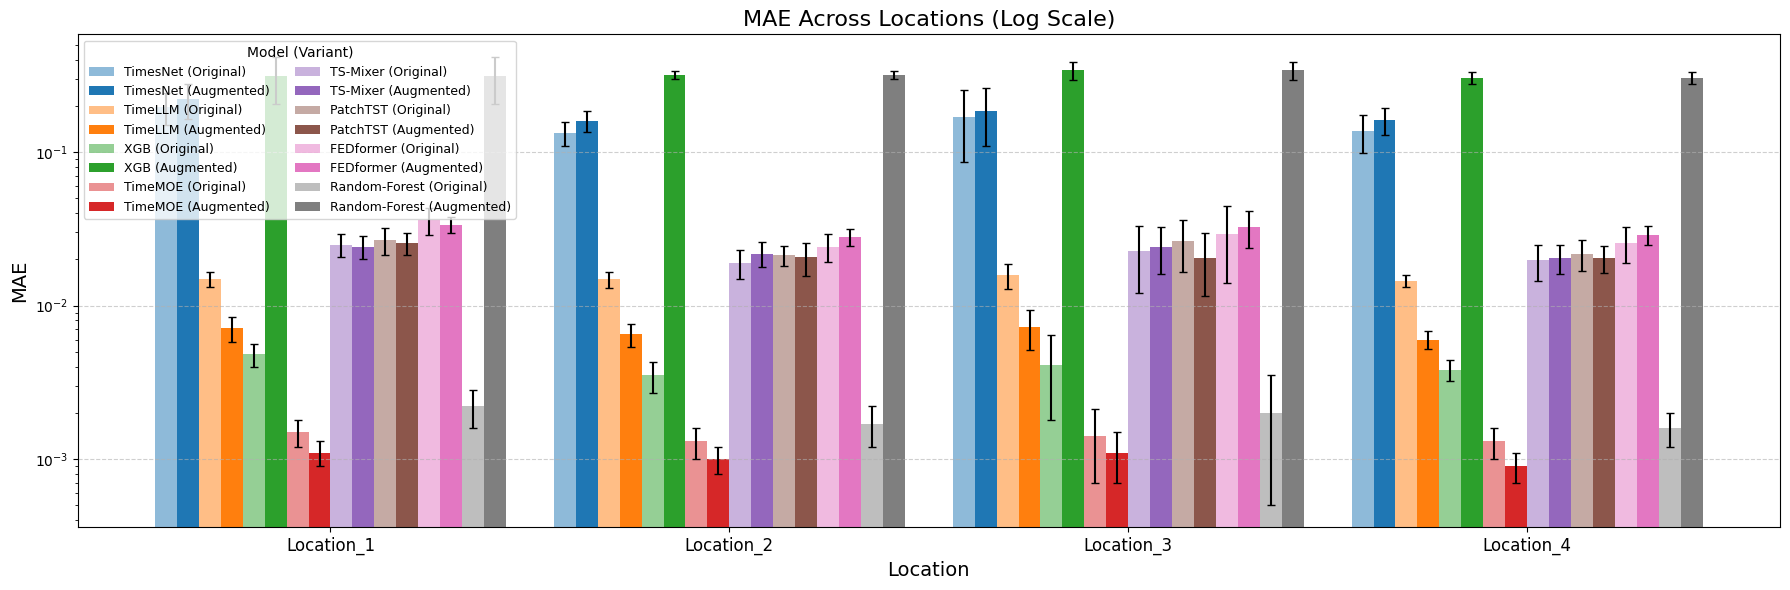

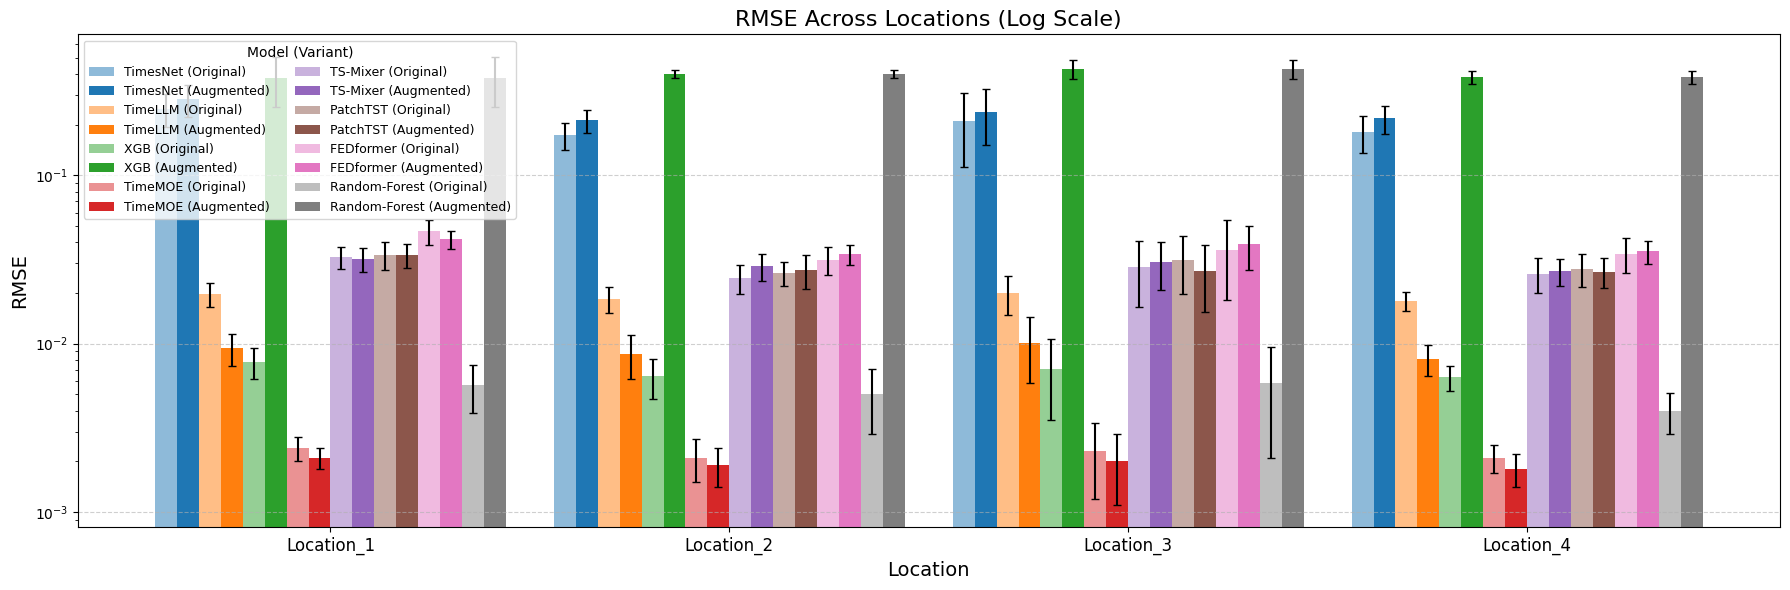

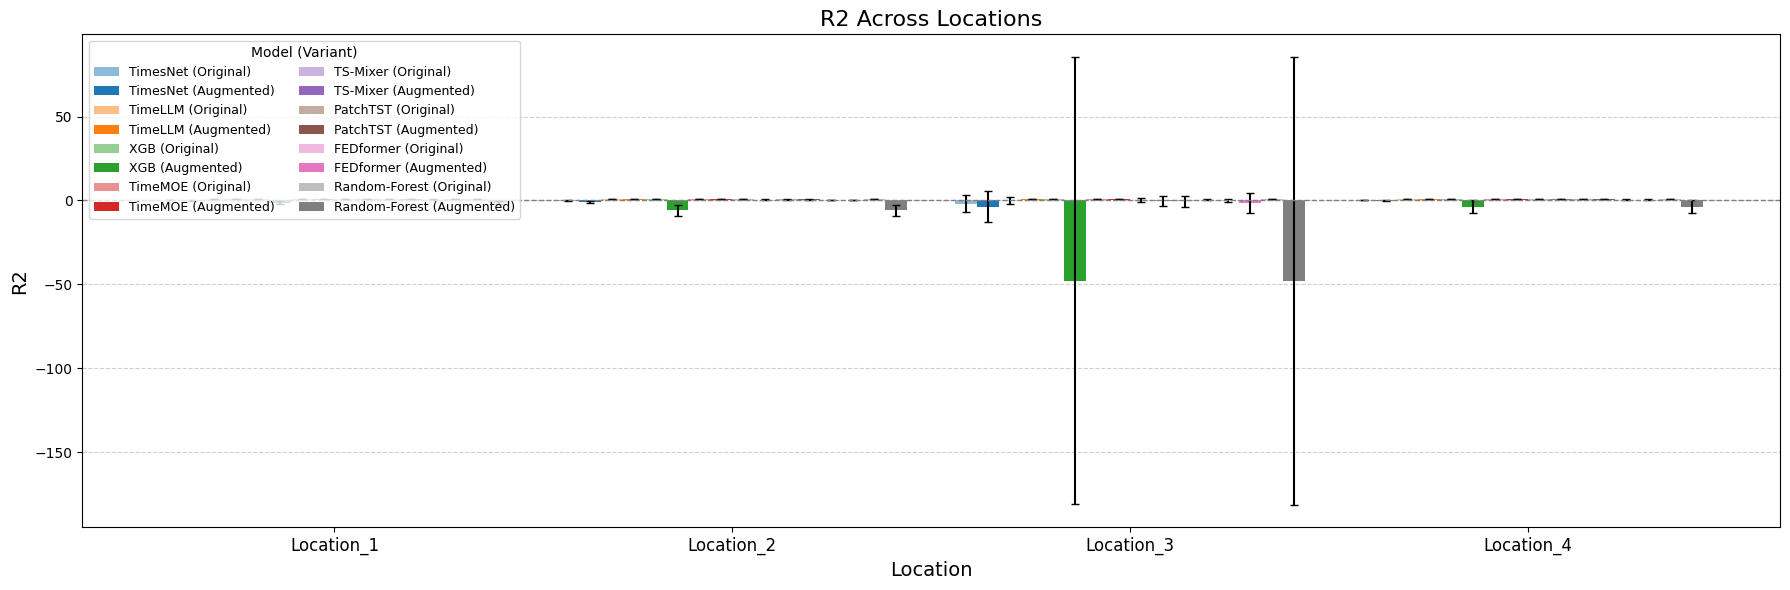

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
locations = ['Location_1', 'Location_2', 'Location_3', 'Location_4']
metrics = ['MAE', 'RMSE', 'R2']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['Original', 'Augmented']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Assign consistent colors for Original and Augmented
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (Original)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (Augmented)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# Plot per metric
for metric in metrics:
    fig, ax = plt.subplots(figsize=(18, 6))
    x = np.arange(len(locations))  # Base x positions for location groups
    bar_width = 0.055
    total_width = len(all_models) * bar_width
    offset_center = (total_width - bar_width) / 2

    for idx, model_full in enumerate(all_models):
        bm, variant = model_full.split(" (")
        variant = variant.strip(")")
        df_filtered = structured_results_df_cleaned[
            (structured_results_df_cleaned['Model'] == bm) &
            (structured_results_df_cleaned['Metric'] == metric)
        ]

        if df_filtered.empty:
            continue

        # Collect means and stds per location
        means, stds = [], []
        for loc in locations:
            col_name = f"{loc} (Org)" if variant == "Original" else f"{loc} (Aug)"
            if col_name in df_filtered.columns:
                val = df_filtered[col_name].values[0]
                if isinstance(val, list) and len(val) == 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(np.nan)
            else:
                means.append(np.nan)
                stds.append(np.nan)

        # Bar positions shifted for each model
        bar_positions = x - offset_center + idx * bar_width
        ax.bar(bar_positions, means, yerr=stds, width=bar_width,
               color=color_map[model_full], label=model_full, capsize=3)

    # Axis Labels and Style
    title = f"{metric} Across Locations"
    if metric != "R2":
        title += " (Log Scale)"
        ax.set_yscale("log")

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Location", fontsize=14)
    ax.set_ylabel(metric, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(locations, fontsize=12)
    ax.grid(True, axis="y", linestyle="--", alpha=0.6)

    if metric == "R2":
        ax.axhline(y=0, color="gray", linestyle="--", linewidth=1)

    ax.set_facecolor("white")
    fig.patch.set_facecolor("white")
    ax.legend(title="Model (Variant)", loc="upper left", ncol=2, fontsize=9)

    plt.tight_layout()
    plt.show()


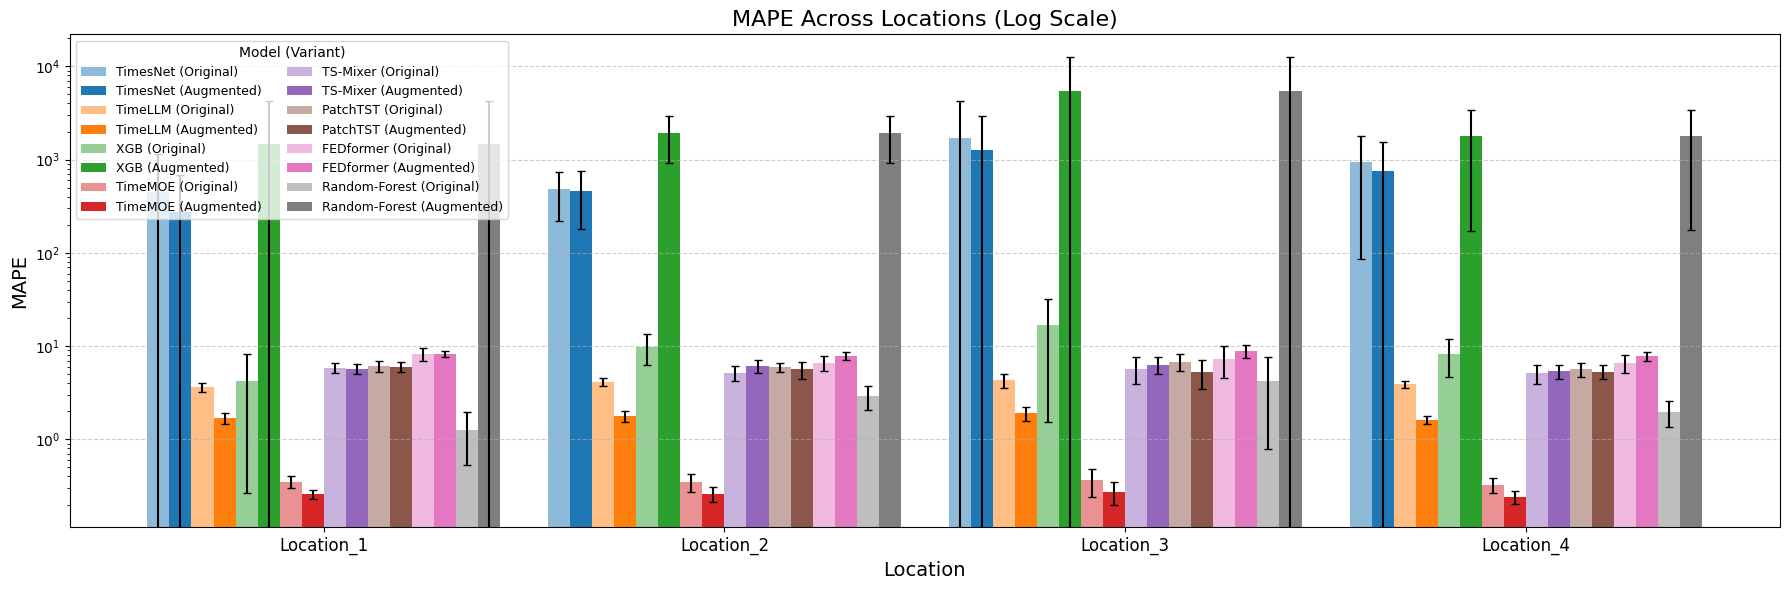

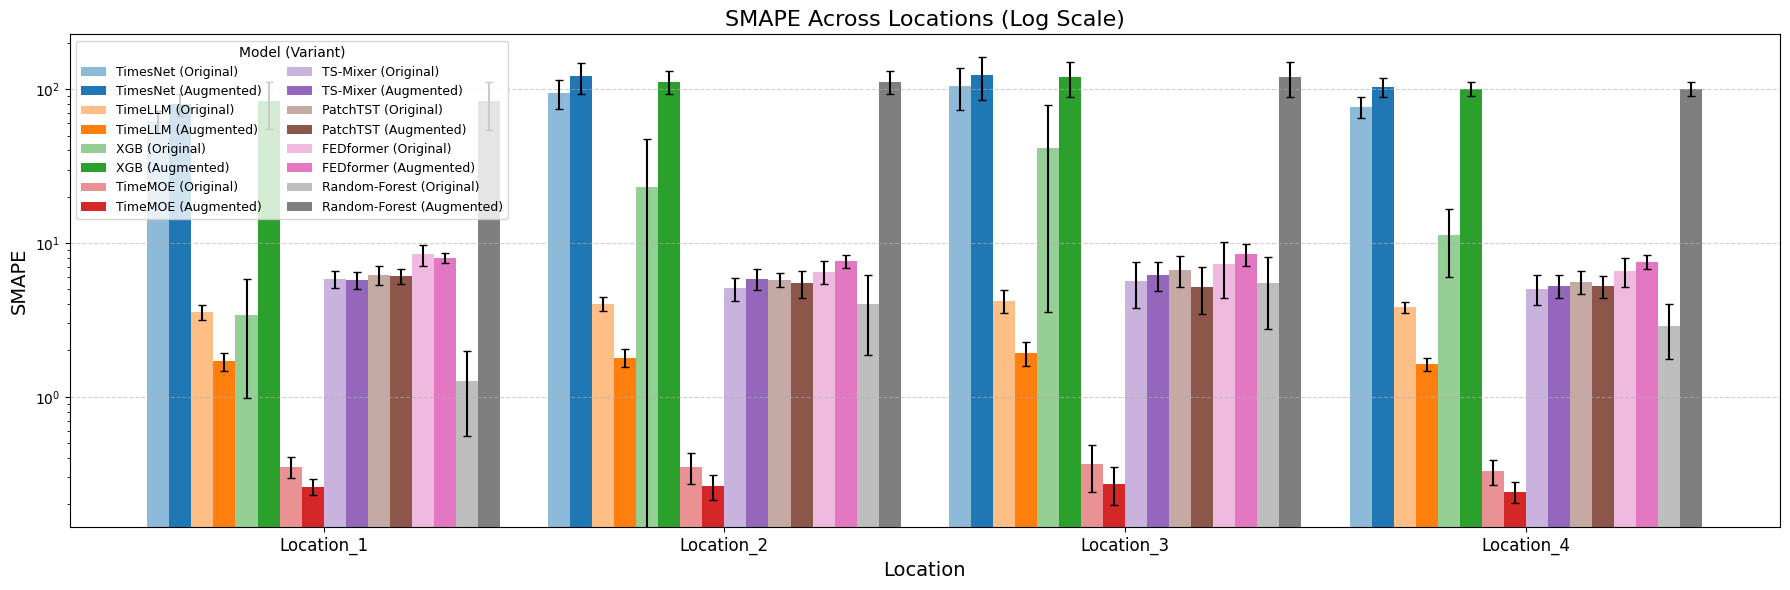

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
locations = ['Location_1', 'Location_2', 'Location_3', 'Location_4']
metrics = ['MAPE', 'SMAPE']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['Original', 'Augmented']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Assign consistent colors for Original and Augmented
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (Original)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (Augmented)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# Plot per metric
for metric in metrics:
    fig, ax = plt.subplots(figsize=(18, 6))
    x = np.arange(len(locations))  # Base x positions for location groups
    bar_width = 0.055
    total_width = len(all_models) * bar_width
    offset_center = (total_width - bar_width) / 2

    for idx, model_full in enumerate(all_models):
        bm, variant = model_full.split(" (")
        variant = variant.strip(")")
        df_filtered = structured_results_df_cleaned[
            (structured_results_df_cleaned['Model'] == bm) &
            (structured_results_df_cleaned['Metric'] == metric)
        ]

        if df_filtered.empty:
            continue

        # Collect means and stds per location
        means, stds = [], []
        for loc in locations:
            col_name = f"{loc} (Org)" if variant == "Original" else f"{loc} (Aug)"
            if col_name in df_filtered.columns:
                val = df_filtered[col_name].values[0]
                if isinstance(val, list) and len(val) == 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(np.nan)
            else:
                means.append(np.nan)
                stds.append(np.nan)

        # Bar positions shifted for each model
        bar_positions = x - offset_center + idx * bar_width
        ax.bar(bar_positions, means, yerr=stds, width=bar_width,
               color=color_map[model_full], label=model_full, capsize=3)

    # Axis Labels and Style
    title = f"{metric} Across Locations"
    if metric != "R2":
        title += " (Log Scale)"
        ax.set_yscale("log")

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Location", fontsize=14)
    ax.set_ylabel(metric, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(locations, fontsize=12)
    ax.grid(True, axis="y", linestyle="--", alpha=0.6)

    if metric == "R2":
        ax.axhline(y=0, color="gray", linestyle="--", linewidth=1)

    ax.set_facecolor("white")
    fig.patch.set_facecolor("white")
    ax.legend(title="Model (Variant)", loc="upper left", ncol=2, fontsize=9)

    plt.tight_layout()
    plt.show()


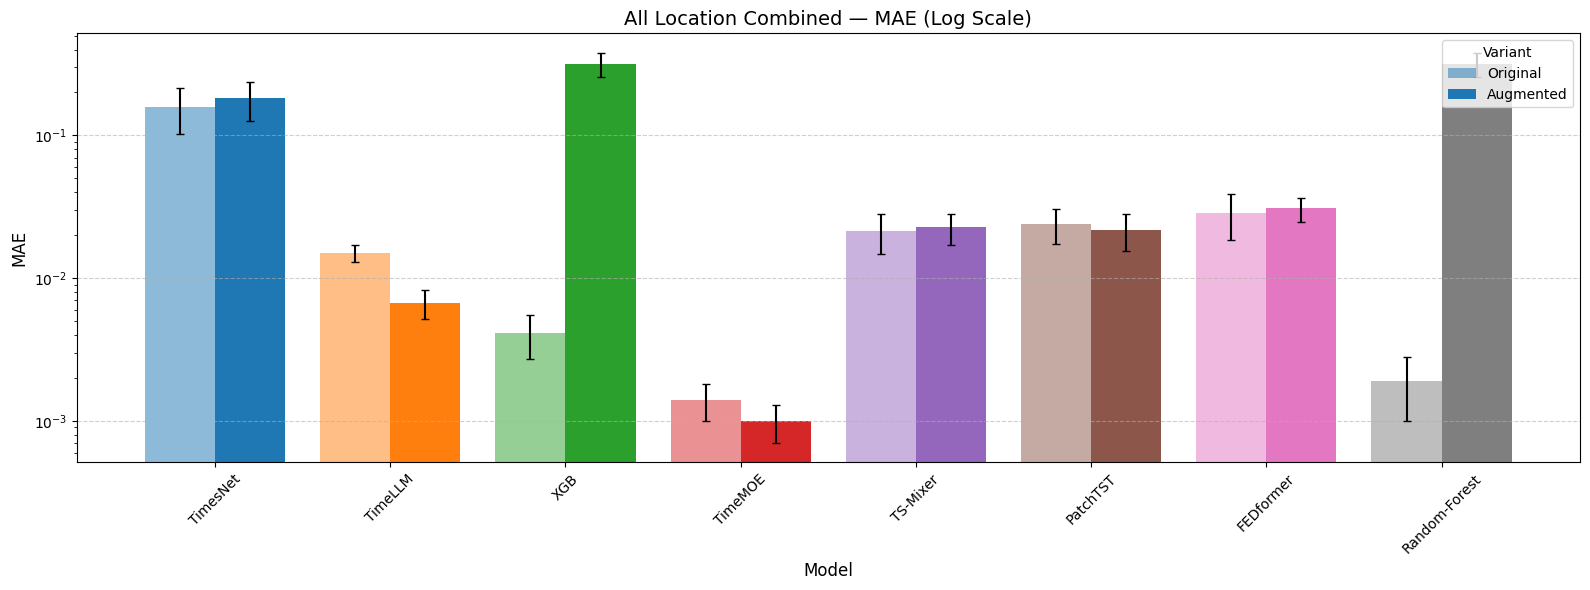

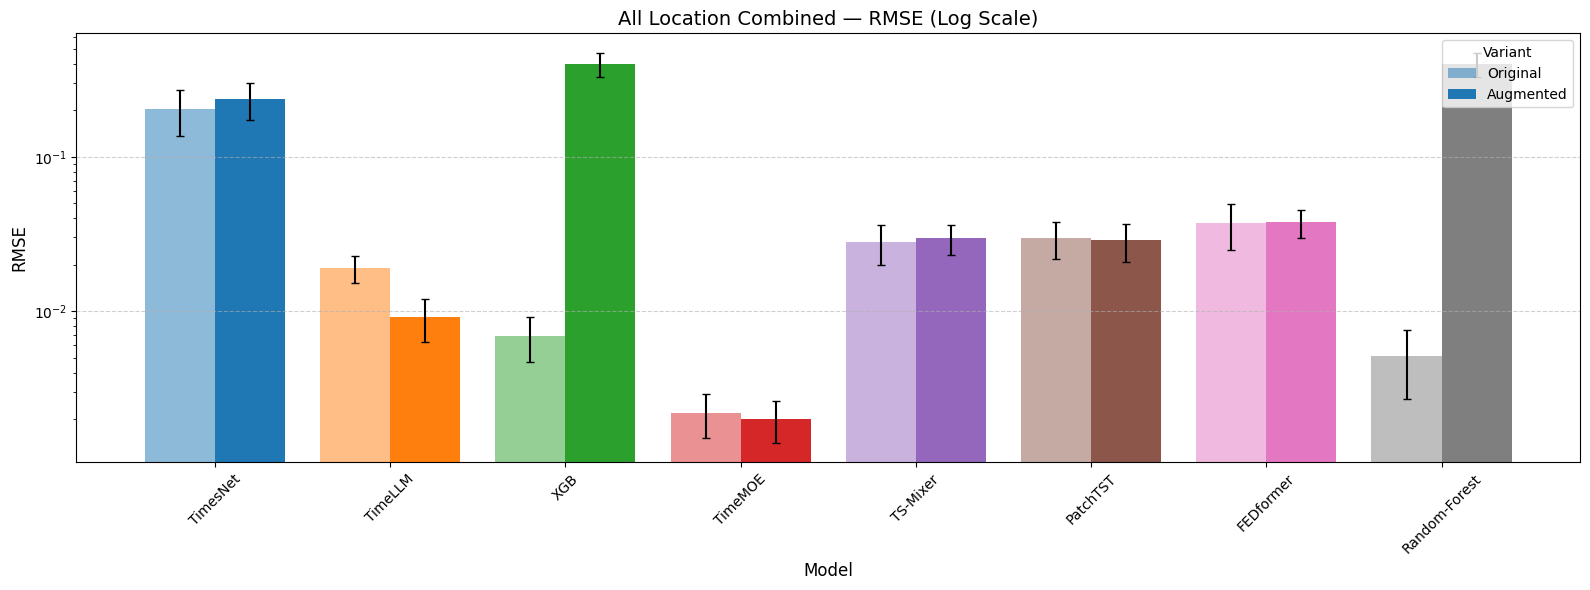

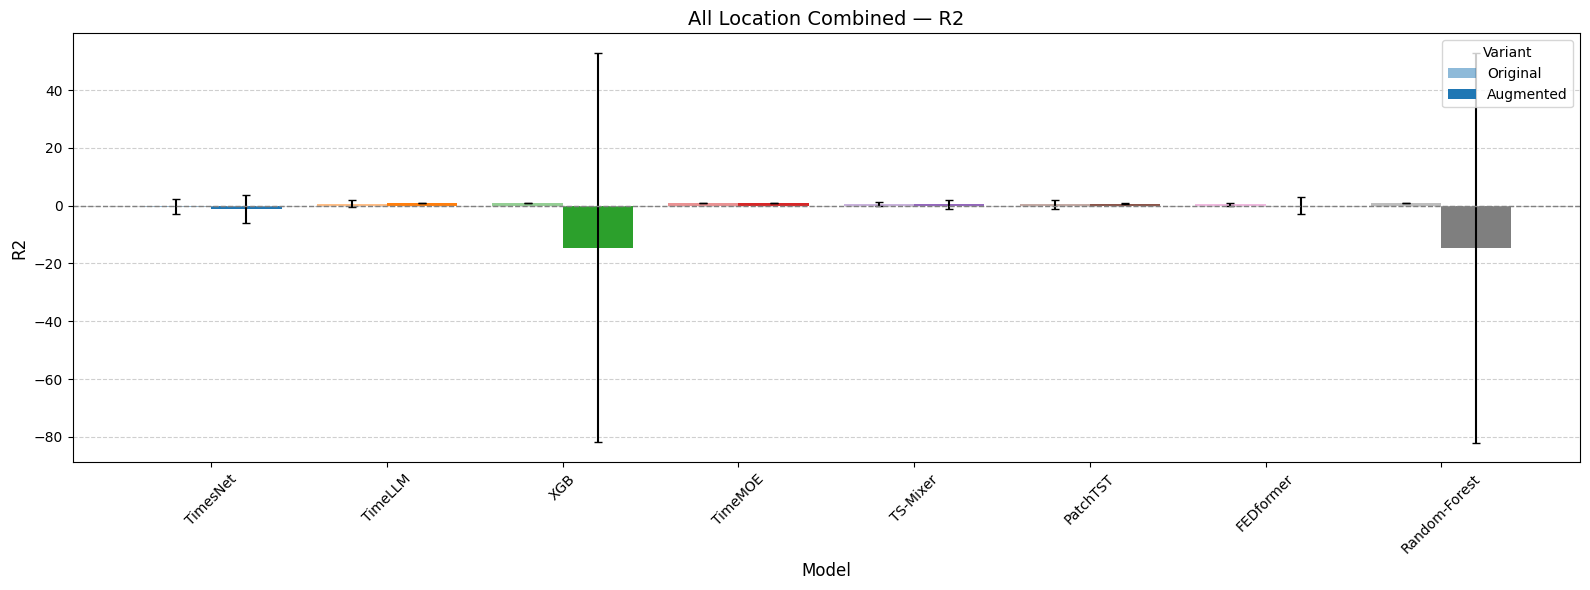

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
metrics = ['MAE', 'RMSE', 'R2']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['Original', 'Augmented']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Colors (light for original, dark for augmented)
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (Original)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (Augmented)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# Metric Loop (One plot per metric)
for metric in metrics:
    fig, ax = plt.subplots(figsize=(16, 6))
    bar_width = 0.4
    x = np.arange(len(base_models))  # Base positions for models

    for v_idx, variant in enumerate(variants):
        means, stds = [], []

        for model in base_models:
            df_filtered = structured_results_df_cleaned[
                (structured_results_df_cleaned['Model'] == model) &
                (structured_results_df_cleaned['Metric'] == metric)
            ]
            if df_filtered.empty:
                means.append(np.nan)
                stds.append(np.nan)
                continue

            col_name = 'All Location Combined (Org)' if variant == 'Original' else 'All Location Combined (Aug)'
            if col_name in df_filtered.columns:
                val = df_filtered[col_name].values[0]
                if isinstance(val, list) and len(val) == 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(np.nan)
            else:
                means.append(np.nan)
                stds.append(np.nan)

        # Bar positions shifted for Original and Augmented
        bar_pos = x + (v_idx - 0.5) * bar_width
        label_variant = f"{variant}"
        ax.bar(bar_pos, means, yerr=stds, width=bar_width,
               color=[color_map[f"{model} ({variant})"] for model in base_models],
               label=label_variant, capsize=3)

    # Final Touches
    title = f'All Location Combined — {metric}'
    if metric != 'R2':
        title += ' (Log Scale)'

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(base_models, rotation=45)

    if metric != 'R2':
        ax.set_yscale('log')  # Only for MAE and RMSE

    # Optional: Highlight zero baseline for R2
    if metric == 'R2':
        ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.legend(title="Variant", loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
metrics = ['MAE', 'RMSE', 'R2']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['Original', 'Augmented']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Colors (light for original, dark for augmented)
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (Original)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (Augmented)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# Metric Loop (One plot per metric)
for metric in metrics:
    fig, ax = plt.subplots(figsize=(16, 6))
    bar_width = 0.4
    x = np.arange(len(base_models))  # Base positions for models

    for v_idx, variant in enumerate(variants):
        means, stds = [], []

        for model in base_models:
            df_filtered = structured_results_df_cleaned[
                (structured_results_df_cleaned['Model'] == model) &
                (structured_results_df_cleaned['Metric'] == metric)
            ]
            if df_filtered.empty:
                means.append(np.nan)
                stds.append(np.nan)
                continue

            col_name = 'All Location Combined (Org)' if variant == 'Original' else 'All Location Combined (Aug)'
            if col_name in df_filtered.columns:
                val = df_filtered[col_name].values[0]
                if isinstance(val, list) and len(val) == 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(np.nan)
            else:
                means.append(np.nan)
                stds.append(np.nan)

        # Bar positions shifted for Original and Augmented
        bar_pos = x + (v_idx - 0.5) * bar_width
        label_variant = f"{variant}"
        ax.bar(bar_pos, means, yerr=stds, width=bar_width,
               color=[color_map[f"{model} ({variant})"] for model in base_models],
               label=label_variant, capsize=3)

    # Final Touches
    title = f'All Location Combined — {metric}'
    if metric != 'R2':
        title += ' (Log Scale)'

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(base_models, rotation=45)

    if metric != 'R2':
        ax.set_yscale('log')  # Only for MAE and RMSE

    # Optional: Highlight zero baseline for R2
    if metric == 'R2':
        ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.legend(title="Variant", loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()


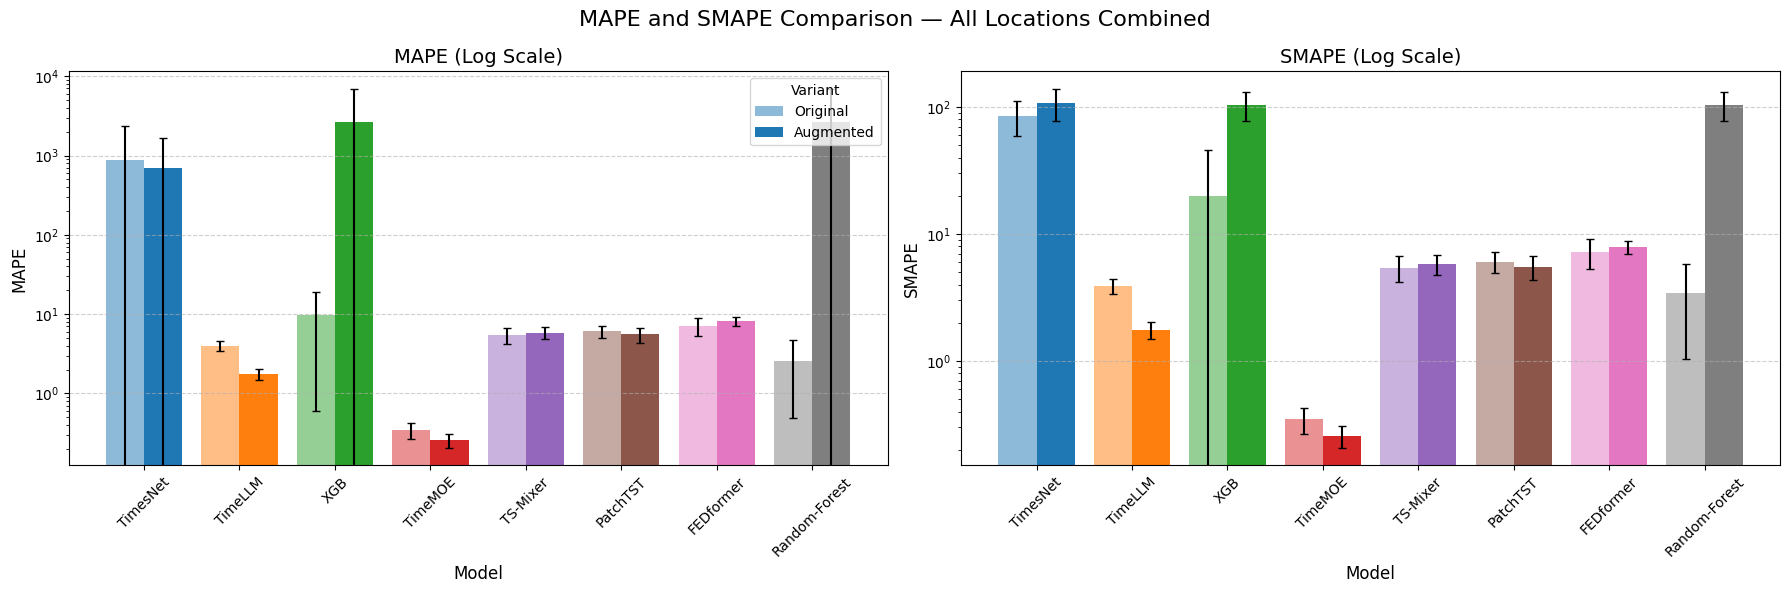

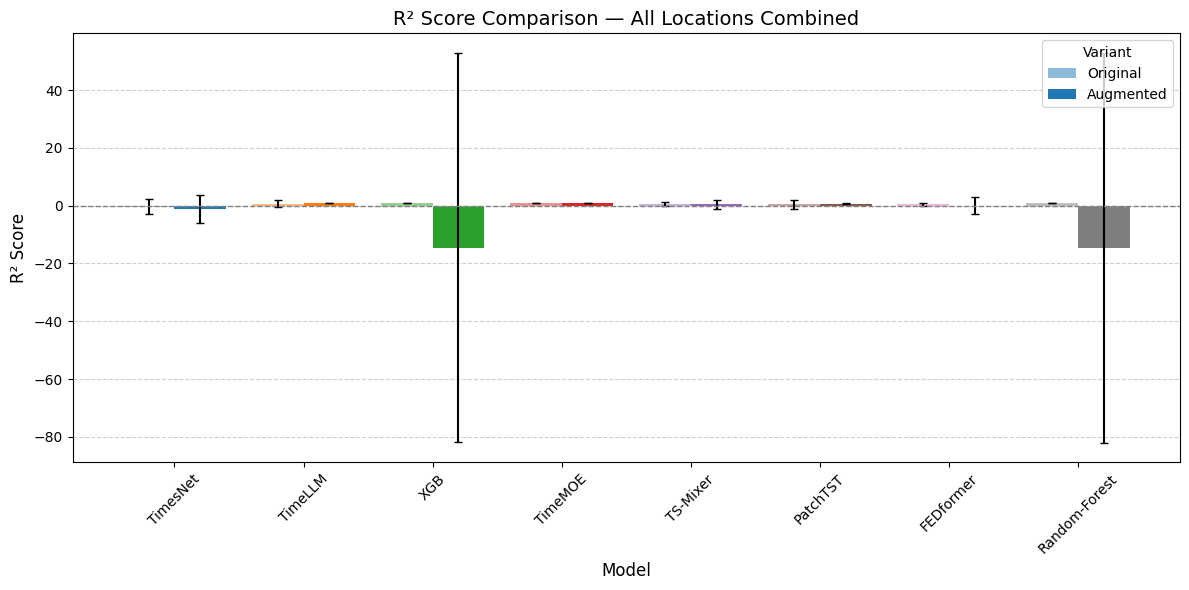

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define constants
error_metrics = ['MAPE', 'SMAPE']
all_metrics = ['MAPE', 'SMAPE']
base_models = list(structured_results_df_cleaned['Model'].unique())
variants = ['Original', 'Augmented']
all_models = [f"{bm} ({v})" for bm in base_models for v in variants]

# Color setup
base_colors = list(mcolors.TABLEAU_COLORS.values())[:len(base_models)]
color_map = {}
for i, bm in enumerate(base_models):
    color_map[f"{bm} (Original)"] = mcolors.to_rgba(base_colors[i], alpha=0.5)
    color_map[f"{bm} (Augmented)"] = mcolors.to_rgba(base_colors[i], alpha=1.0)

# ========== Plot for MAE and RMSE Combined ==========
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 2 subplots for MAE and RMSE
bar_width = 0.4
x = np.arange(len(base_models))  # x-axis positions for models

for ax_idx, metric in enumerate(error_metrics):
    ax = axs[ax_idx]

    for v_idx, variant in enumerate(variants):
        means, stds = [], []

        for model in base_models:
            df_filtered = structured_results_df_cleaned[
                (structured_results_df_cleaned['Model'] == model) &
                (structured_results_df_cleaned['Metric'] == metric)
            ]
            if df_filtered.empty:
                means.append(np.nan)
                stds.append(np.nan)
                continue

            col_name = 'All Location Combined (Org)' if variant == 'Original' else 'All Location Combined (Aug)'
            val = df_filtered[col_name].values[0] if col_name in df_filtered else [np.nan, np.nan]
            if isinstance(val, list) and len(val) == 2:
                means.append(val[0])
                stds.append(val[1])
            else:
                means.append(np.nan)
                stds.append(np.nan)

        bar_pos = x + (v_idx - 0.5) * bar_width
        ax.bar(bar_pos, means, yerr=stds, width=bar_width,
               color=[color_map[f"{model} ({variant})"] for model in base_models],
               label=variant, capsize=3)

    ax.set_title(f'{metric} (Log Scale)', fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(base_models, rotation=45)
    ax.set_yscale('log')
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)
    ax.set_facecolor('white')

axs[0].legend(title="Variant", loc='upper right', fontsize=10)
fig.suptitle(f'{error_metrics[0]} and {error_metrics[1]} Comparison — All Locations Combined', fontsize=16)
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# ========== Plot for R2 Separately ==========
fig, ax = plt.subplots(figsize=(12, 6))

for v_idx, variant in enumerate(variants):
    means, stds = [], []

    for model in base_models:
        df_filtered = structured_results_df_cleaned[
            (structured_results_df_cleaned['Model'] == model) &
            (structured_results_df_cleaned['Metric'] == 'R2')
        ]
        if df_filtered.empty:
            means.append(np.nan)
            stds.append(np.nan)
            continue

        col_name = 'All Location Combined (Org)' if variant == 'Original' else 'All Location Combined (Aug)'
        val = df_filtered[col_name].values[0] if col_name in df_filtered else [np.nan, np.nan]
        if isinstance(val, list) and len(val) == 2:
            means.append(val[0])
            stds.append(val[1])
        else:
            means.append(np.nan)
            stds.append(np.nan)

    bar_pos = x + (v_idx - 0.5) * bar_width
    ax.bar(bar_pos, means, yerr=stds, width=bar_width,
           color=[color_map[f"{model} ({variant})"] for model in base_models],
           label=variant, capsize=3)

ax.set_title('R² Score Comparison — All Locations Combined', fontsize=14)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('R² Score', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(base_models, rotation=45)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.legend(title="Variant", loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()


In [109]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sorted_line_metric(df, metric='MAPE', variant='Original'):
    """
    Plots a line plot for the given metric across models, sorted in ascending order.
    
    Parameters:
    - df: structured_results_df_cleaned
    - metric: 'MAE', 'MAPE', etc.
    - variant: 'Original' or 'Augmented'
    """

    # Choose column based on variant
    col = 'All Location Combined (Org)' if variant == 'Original' else 'All Location Combined (Aug)'
    
    # Filter data
    filtered = df[(df['Metric'] == metric)].copy()
    
    # Extract values
    model_values = []
    for model in base_models:
        row = filtered[filtered['Model'] == model]
        if row.empty or col not in row:
            continue
        value = row[col].values[0]
        if isinstance(value, list) and len(value) == 2:
            mean, std = value
        else:
            mean, std = np.nan, np.nan
        model_values.append((model, mean, std))

    # Sort models by mean value
    model_values_sorted = sorted(model_values, key=lambda x: x[1])

    models = [m[0] for m in model_values_sorted]
    means = [m[1] for m in model_values_sorted]
    stds = [m[2] for m in model_values_sorted]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.errorbar(models, means, yerr=stds, fmt='-o', capsize=5, label=variant, color='blue' if variant == 'Original' else 'orange')

    plt.title(f'{metric} Comparison Across Models ({variant})', fontsize=14)
    plt.xlabel('Models (Sorted)', fontsize=12)
    plt.ylabel(f'{metric}', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()


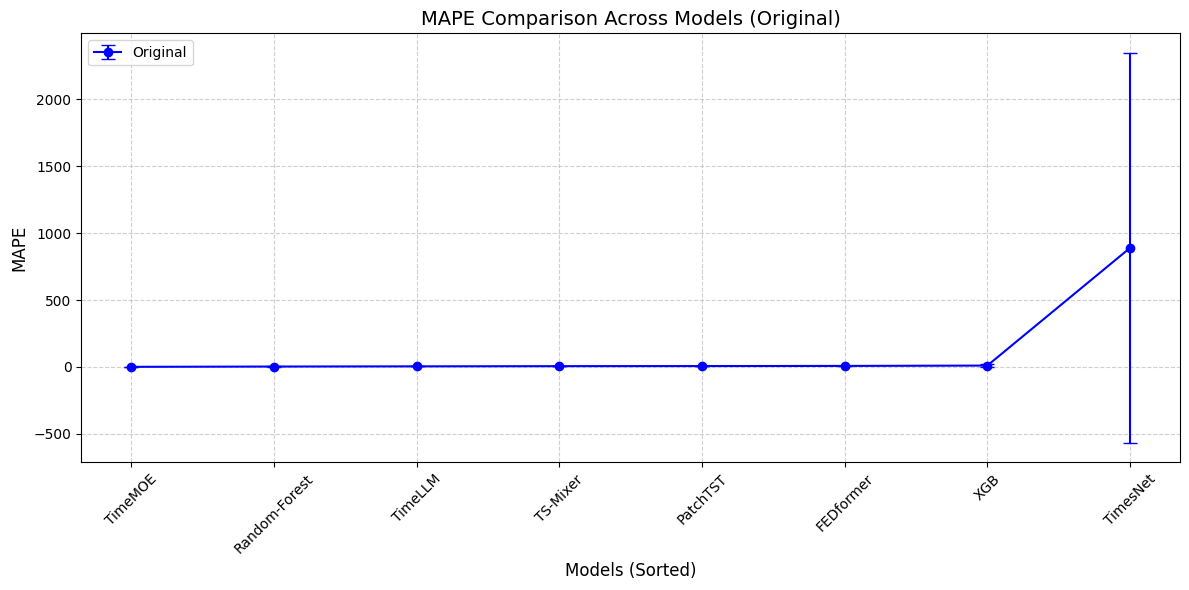

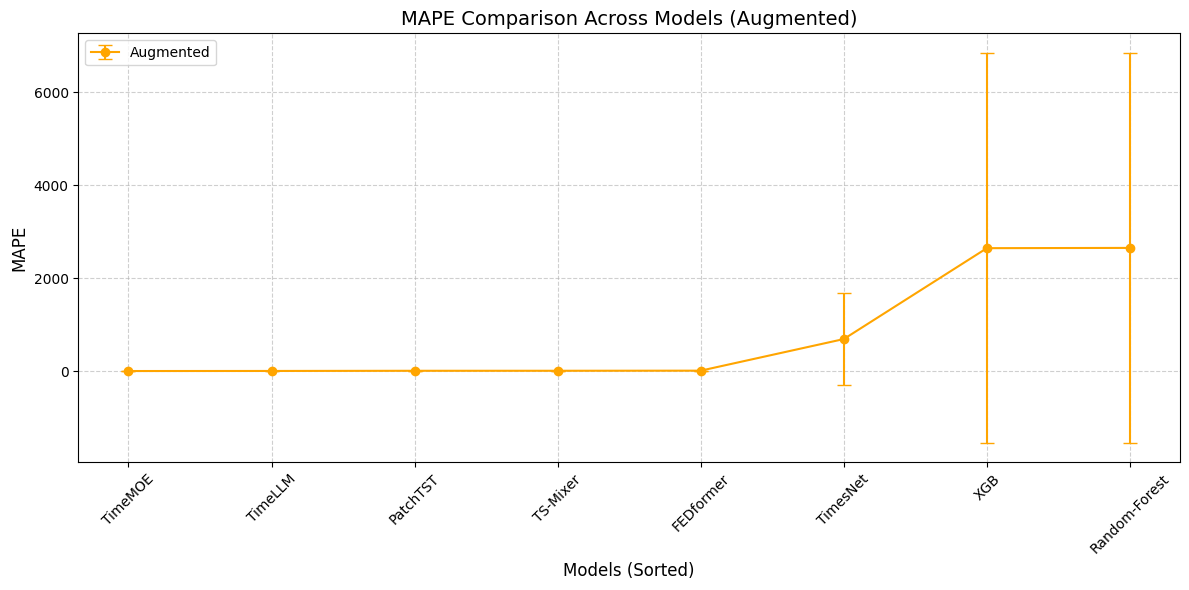

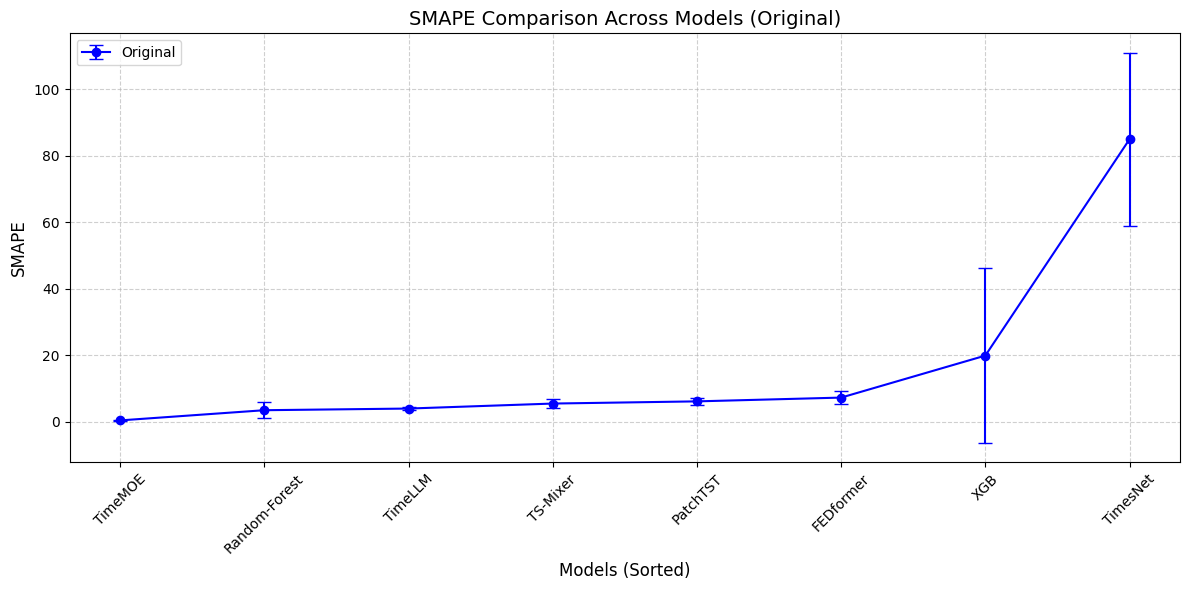

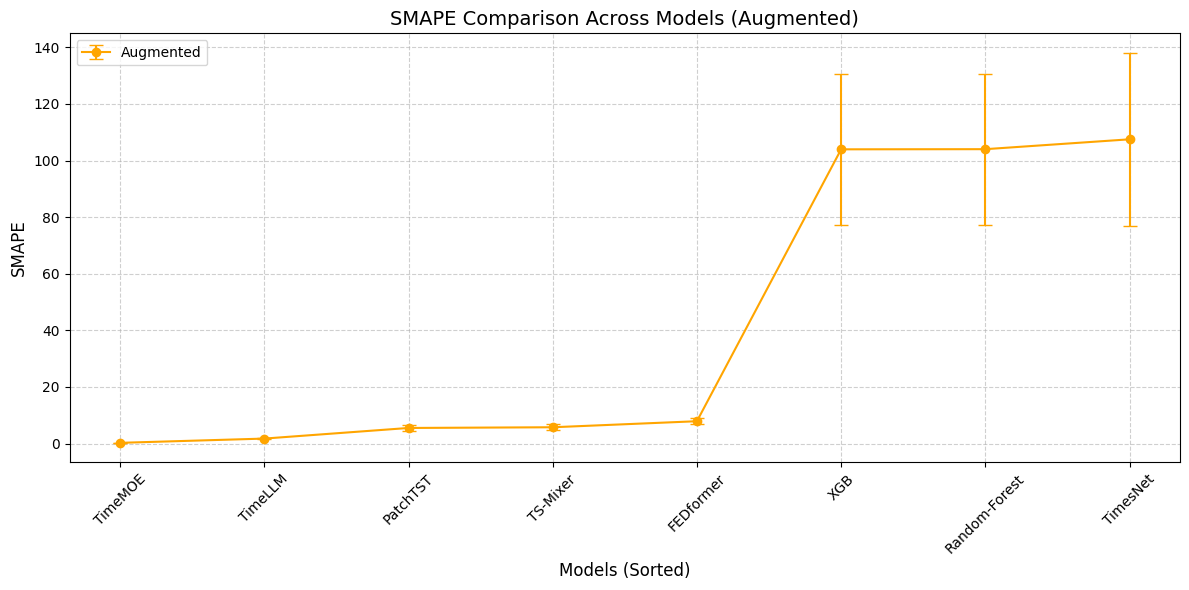

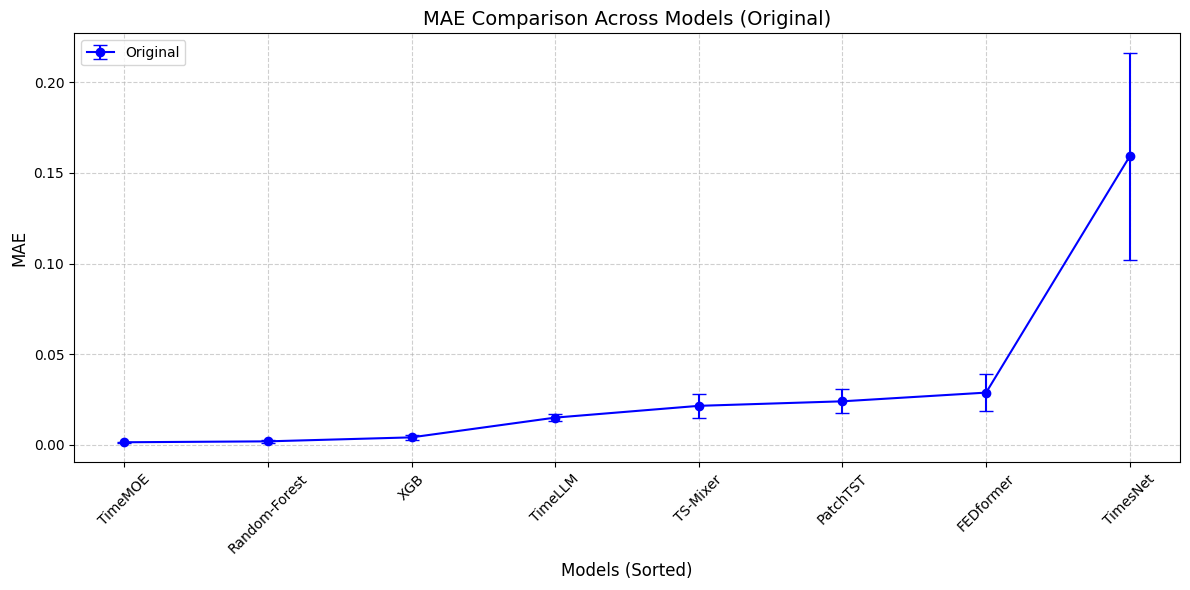

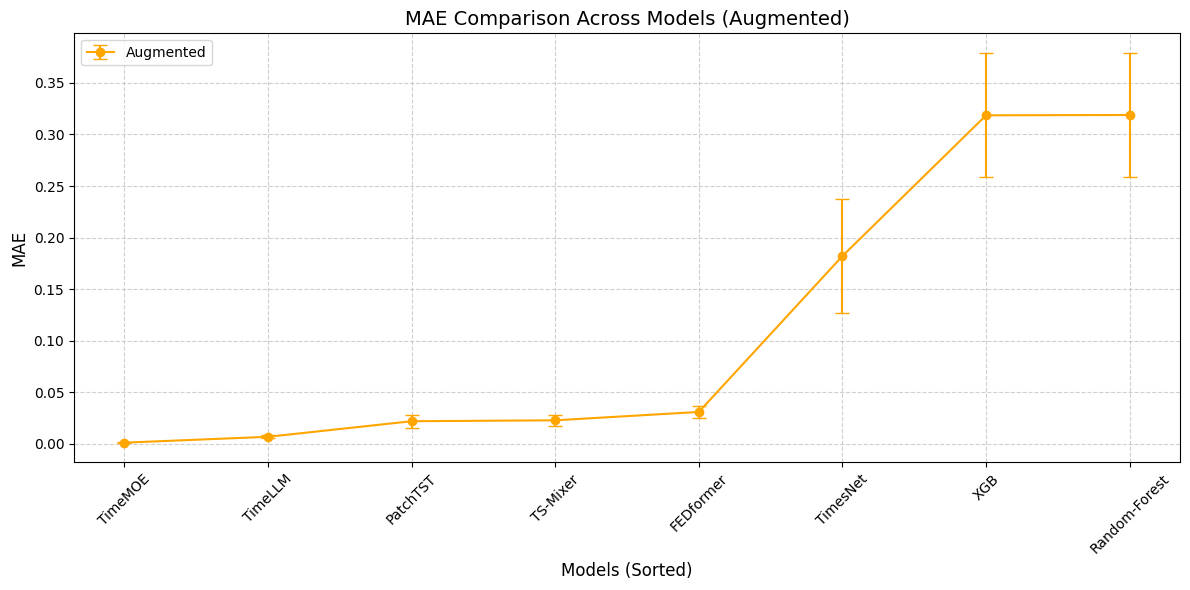

In [111]:
plot_sorted_line_metric(structured_results_df_cleaned, metric='MAPE', variant='Original')
plot_sorted_line_metric(structured_results_df_cleaned, metric='MAPE', variant='Augmented')
plot_sorted_line_metric(structured_results_df_cleaned, metric='SMAPE', variant='Original')
plot_sorted_line_metric(structured_results_df_cleaned, metric='SMAPE', variant='Augmented')
plot_sorted_line_metric(structured_results_df_cleaned, metric='MAE', variant='Original')
plot_sorted_line_metric(structured_results_df_cleaned, metric='MAE', variant='Augmented')

In [119]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_metrics_combined_per_variant(df, base_models):
    """
    Plot all metrics in a single plot per variant (Original & Augmented) with error bars.

    Parameters:
    - df: structured_results_df_cleaned
    - base_models: List of models
    """

    metrics = ['MAE', 'RMSE', 'MAPE', 'SMAPE', 'R2']
    variants = ['Original', 'Augmented']
    col_map = {'Original': 'All Location Combined (Org)', 'Augmented': 'All Location Combined (Aug)'}
    color_map = {
        'MAE': 'tab:blue',
        'RMSE': 'tab:orange',
        'MAPE': 'tab:green',
        'SMAPE': 'tab:red',
        'R2': 'tab:purple'
    }

    # Sort models based on Original MAE for consistent x-axis
    mae_col = col_map['Original']
    mae_values = []
    for model in base_models:
        row = df[(df['Model'] == model) & (df['Metric'] == 'MAE')]
        if not row.empty and isinstance(row[mae_col].values[0], list):
            mean = row[mae_col].values[0][0]
            mae_values.append((model, mean))
        else:
            mae_values.append((model, np.nan))

    sorted_models = [m[0] for m in sorted(mae_values, key=lambda x: x[1])]
    
    for variant in variants:
        col = col_map[variant]
        plt.figure(figsize=(14, 6))
        for metric in metrics:
            means = []
            stds = []
            for model in sorted_models:
                row = df[(df['Model'] == model) & (df['Metric'] == metric)]
                if not row.empty and isinstance(row[col].values[0], list):
                    mean, std = row[col].values[0]
                else:
                    mean, std = np.nan, np.nan
                means.append(mean)
                stds.append(std)
            
            plt.errorbar(sorted_models, means, yerr=stds, label=metric, fmt='-o', capsize=4, color=color_map[metric])

        plt.title(f"Combined Metric Comparison ({variant})", fontsize=15)
        plt.xlabel("Models", fontsize=12)
        plt.ylabel("Metric Value", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend(title="Metric", fontsize=10)
        plt.tight_layout()
        plt.show()


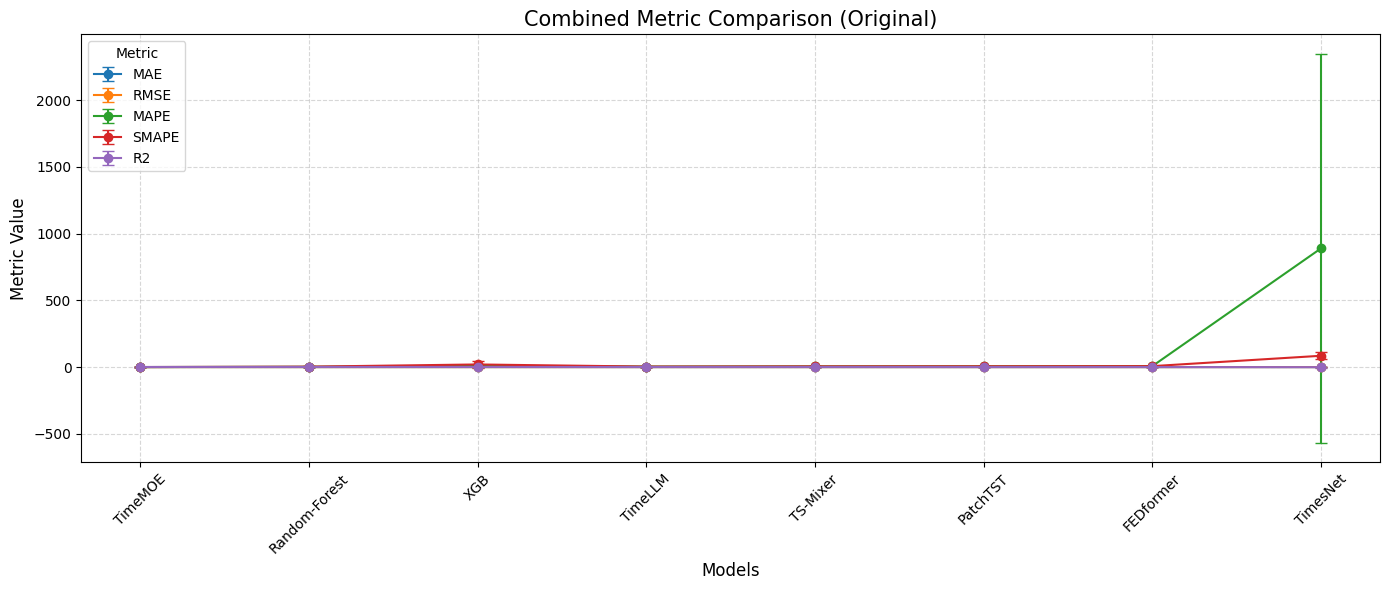

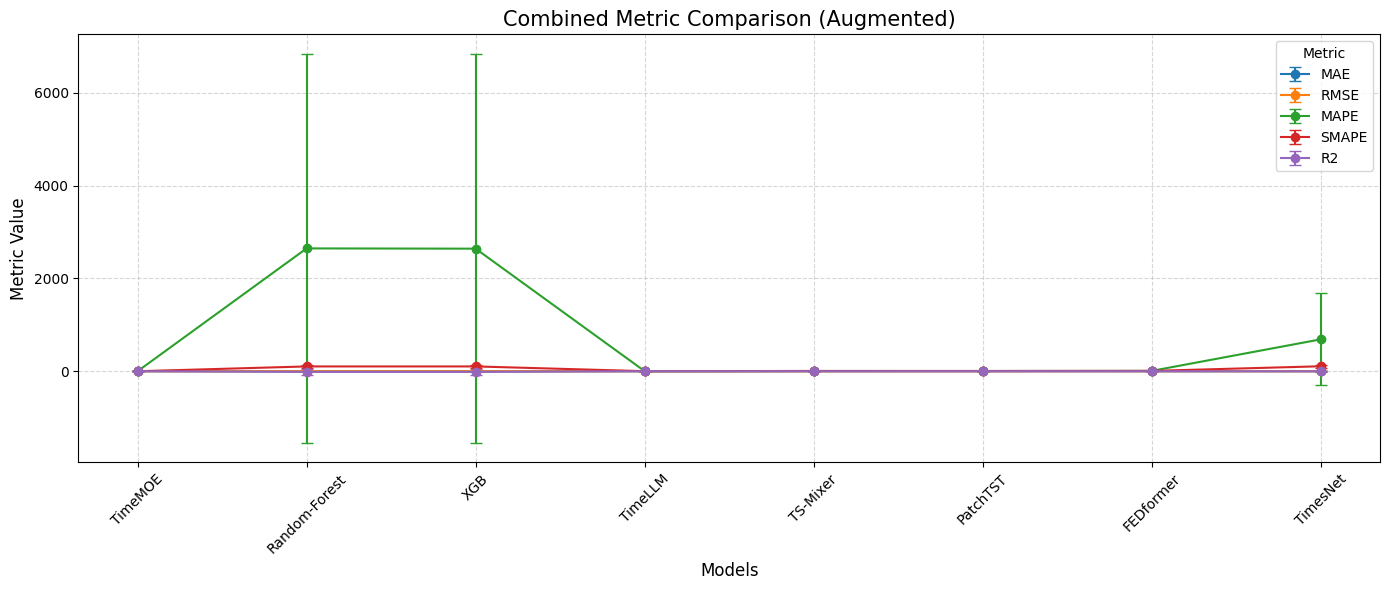

In [120]:
plot_all_metrics_combined_per_variant(structured_results_df_cleaned, base_models)


In [128]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_metrics_symlog_sorted(df, metrics, base_models, variants=['Original', 'Augmented'], sort_metric='MAE'):
    """
    Plots all metrics across models in one plot using symlog scale, sorted by a chosen strong metric (e.g., MAE).
    
    Parameters:
    - df: DataFrame with 'Metric', 'Model', and metric value columns.
    - metrics: List of metric names like ['MAE', 'RMSE', 'MAPE', 'SMAPE', 'R2'].
    - base_models: List of model names.
    - variants: ['Original', 'Augmented']
    - sort_metric: Metric used to sort models (e.g., 'MAE')
    """
    col_map = {
        'Original': 'All Location Combined (Org)',
        'Augmented': 'All Location Combined (Aug)'
    }

    # --- Step 1: Sort models based on sort_metric (Original only) ---
    sort_df = df[(df['Metric'] == sort_metric)].copy()
    model_scores = []

    for model in base_models:
        row = sort_df[(sort_df['Model'] == model)]
        if row.empty:
            continue
        value = row[col_map['Original']].values[0]
        mean = value[0] if isinstance(value, list) else np.nan
        model_scores.append((model, mean))

    # Sort: for error metrics (lower is better), reverse=False
    sorted_models = [m[0] for m in sorted(model_scores, key=lambda x: x[1])]

    # --- Step 2: Plot all metrics with models in same order ---
    fig, ax = plt.subplots(figsize=(14, 7))

    for i, metric in enumerate(metrics):
        offset = i * 0.15  # For separating metric lines slightly

        for j, variant in enumerate(variants):
            filtered = df[df['Metric'] == metric].copy()
            col = col_map[variant]

            means = []
            stds = []

            for model in sorted_models:
                row = filtered[filtered['Model'] == model]
                if row.empty or col not in row:
                    means.append(np.nan)
                    stds.append(0)
                    continue
                value = row[col].values[0]
                if isinstance(value, list) and len(value) == 2:
                    mean, std = value
                else:
                    mean, std = np.nan, np.nan
                means.append(mean)
                stds.append(std)

            x = np.arange(len(sorted_models)) + offset + j * 0.05
            ax.errorbar(x, means, yerr=stds, fmt='-o', capsize=4,
                        label=f'{metric} ({variant})')

    ax.set_xticks(np.arange(len(sorted_models)))
    ax.set_xticklabels(sorted_models, rotation=45)
    ax.set_yscale('symlog', linthresh=0.1)  # Supports negative & near-zero values
    ax.set_title(f"All Metrics Across Models (Sorted by {sort_metric}, symlog scale)", fontsize=15)
    ax.set_xlabel("Models", fontsize=12)
    ax.set_ylabel("Metric Value", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(ncol=2, fontsize=9)
    plt.tight_layout()
    plt.show()


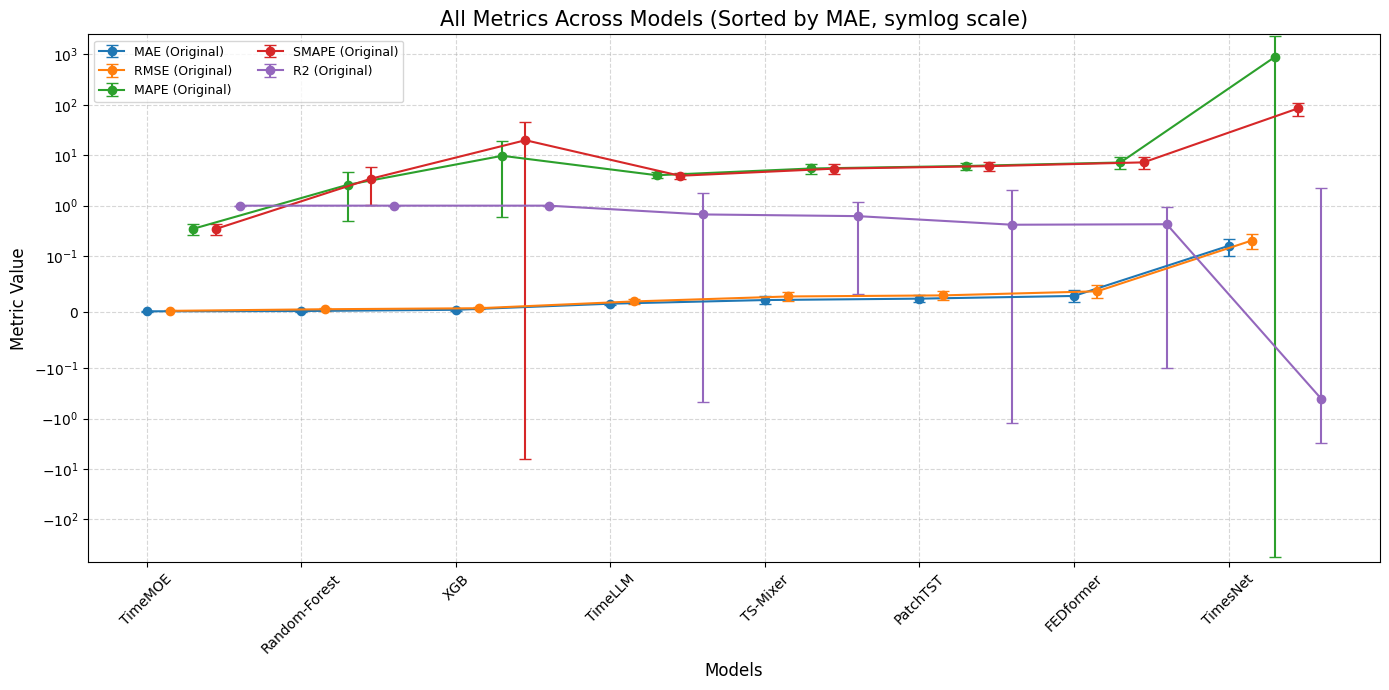

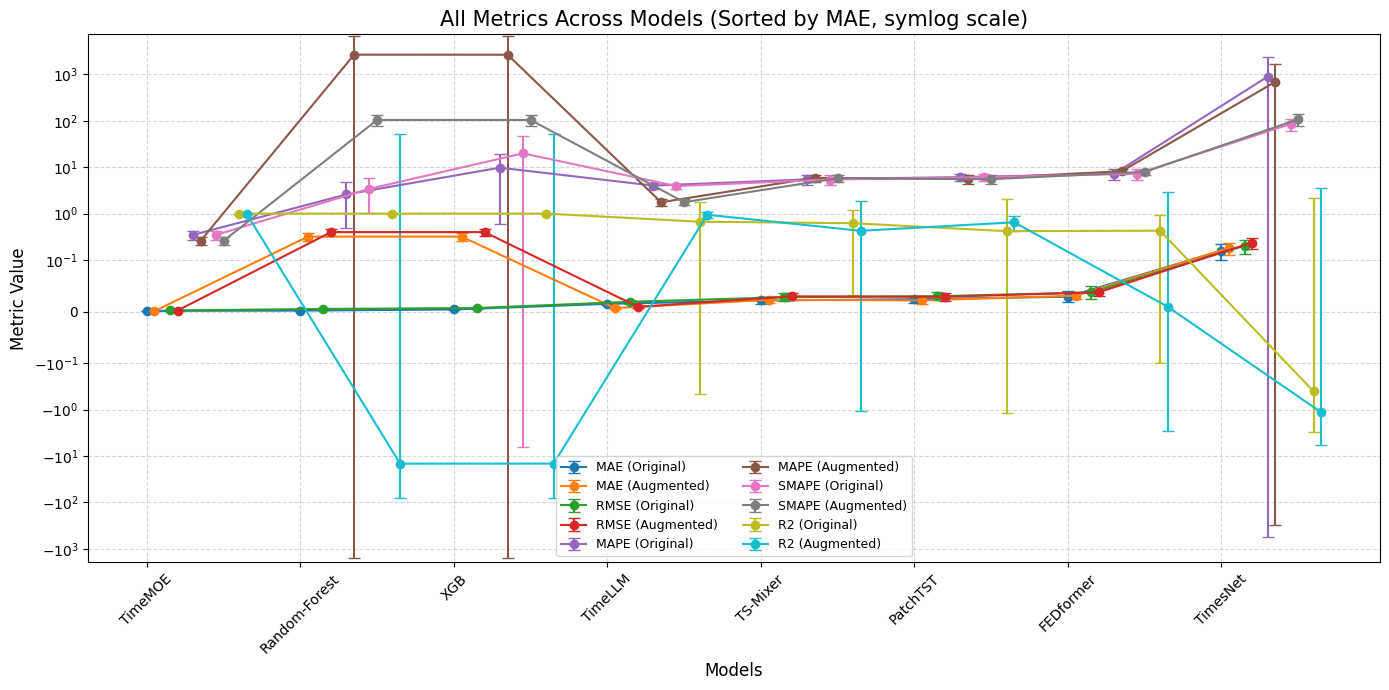

In [131]:
metrics = ['MAE', 'RMSE', 'MAPE', 'SMAPE', 'R2']
plot_all_metrics_symlog_sorted(structured_results_df_cleaned, metrics, base_models, variants=['Original'],sort_metric='MAE')
plot_all_metrics_symlog_sorted(structured_results_df_cleaned, metrics, base_models,sort_metric='MAE')


In [115]:
import matplotlib.pyplot as plt
import numpy as np

def lineplot_sorted_metric(df, metric='MAE'):
    df_filtered = df[df['Metric'] == metric].copy()

    original_means, augmented_means = [], []
    original_stds, augmented_stds = [], []
    model_labels = []

    for model in df_filtered['Model'].unique():
        row = df_filtered[df_filtered['Model'] == model]
        try:
            org_val, org_std = row['All Location Combined (Org)'].values[0]
            aug_val, aug_std = row['All Location Combined (Aug)'].values[0]
        except:
            org_val, org_std = np.nan, np.nan
            aug_val, aug_std = np.nan, np.nan
        original_means.append(org_val)
        original_stds.append(org_std)
        augmented_means.append(aug_val)
        augmented_stds.append(aug_std)
        model_labels.append(model)

    # Sort by original mean
    sorted_idx = np.argsort(original_means)
    sorted_models = [model_labels[i] for i in sorted_idx]
    sorted_org_means = [original_means[i] for i in sorted_idx]
    sorted_org_stds = [original_stds[i] for i in sorted_idx]
    sorted_aug_means = [augmented_means[i] for i in sorted_idx]
    sorted_aug_stds = [augmented_stds[i] for i in sorted_idx]

    x = np.arange(len(sorted_models))

    plt.figure(figsize=(14, 6))
    plt.errorbar(x, sorted_org_means, yerr=sorted_org_stds, label='Original',
                 marker='o', linestyle='-', capsize=4, color='tab:blue')
    plt.errorbar(x, sorted_aug_means, yerr=sorted_aug_stds, label='Augmented',
                 marker='x', linestyle='--', capsize=4, color='tab:orange')

    plt.title(f'{metric} Score Comparison with Std — Sorted by Original', fontsize=16)
    plt.xlabel("Model", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(ticks=x, labels=sorted_models, rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


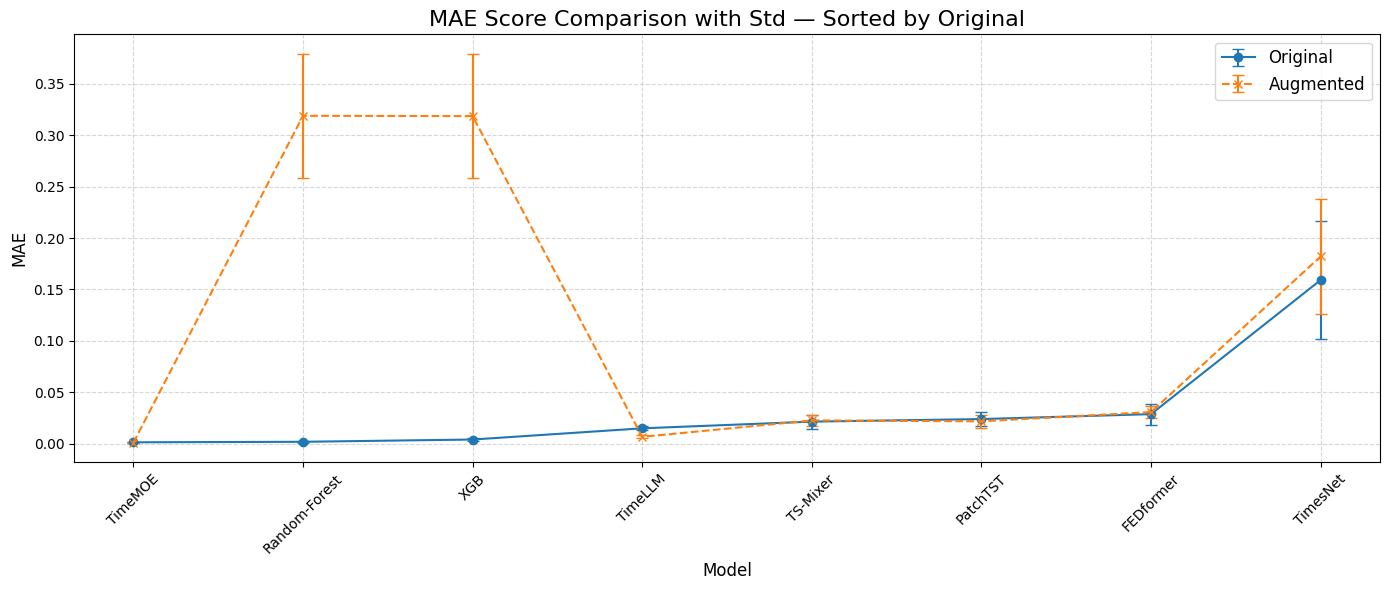

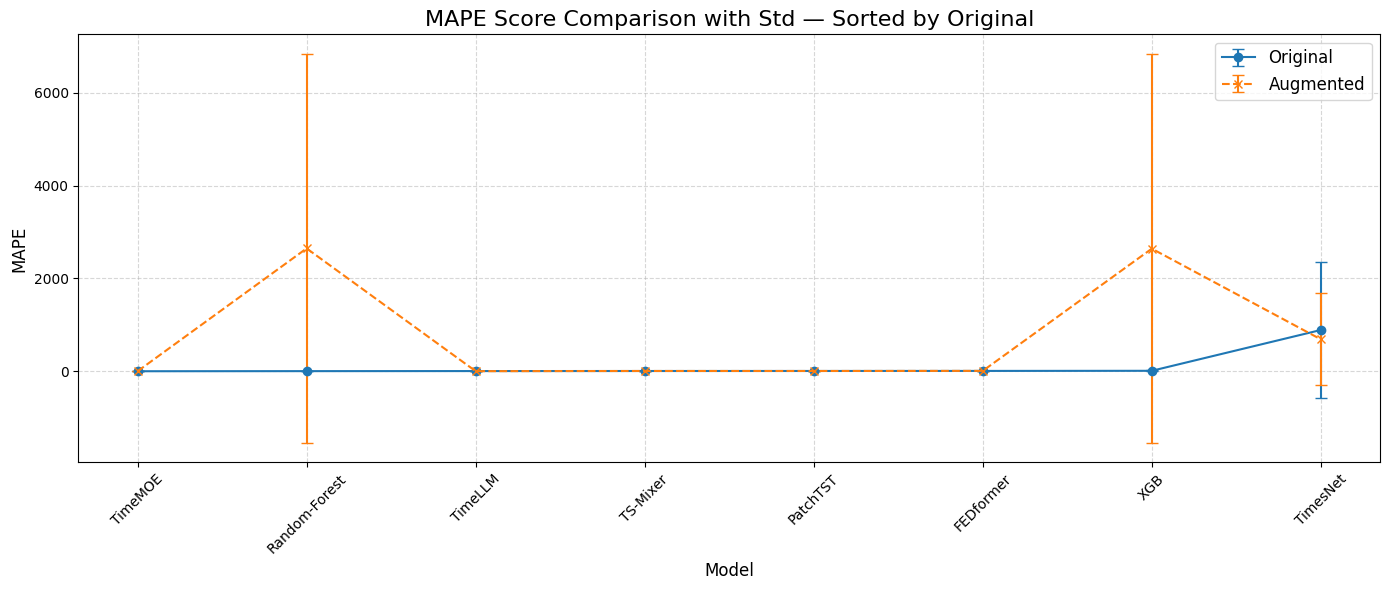

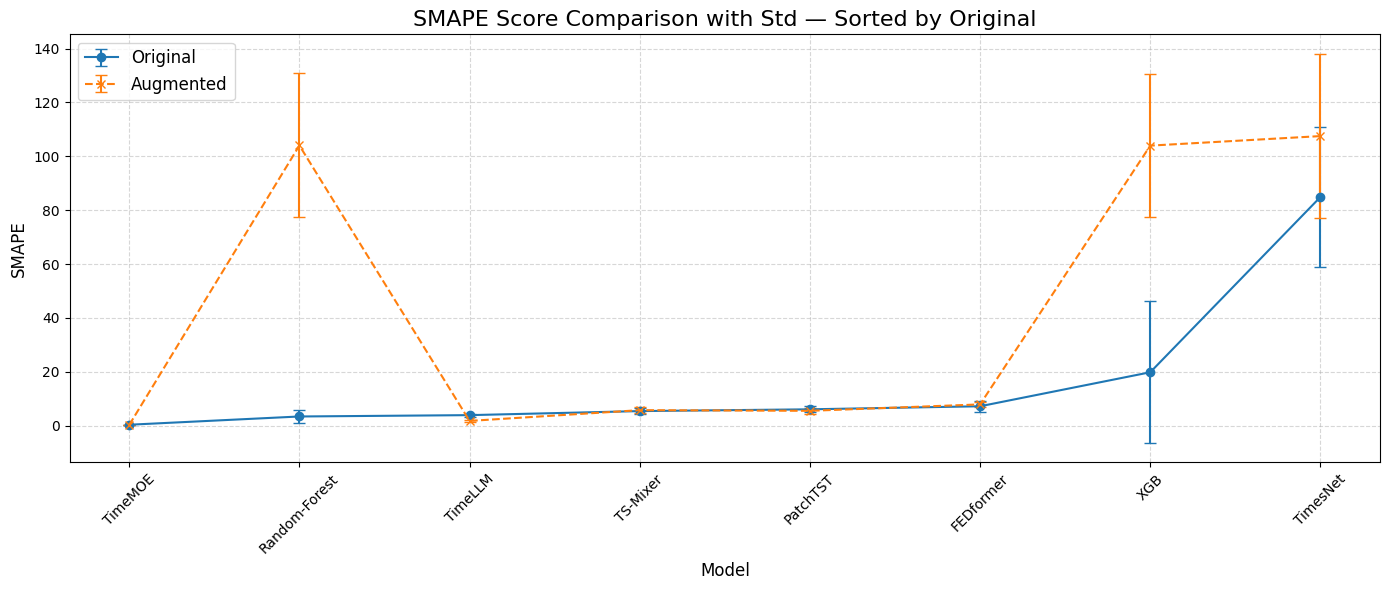

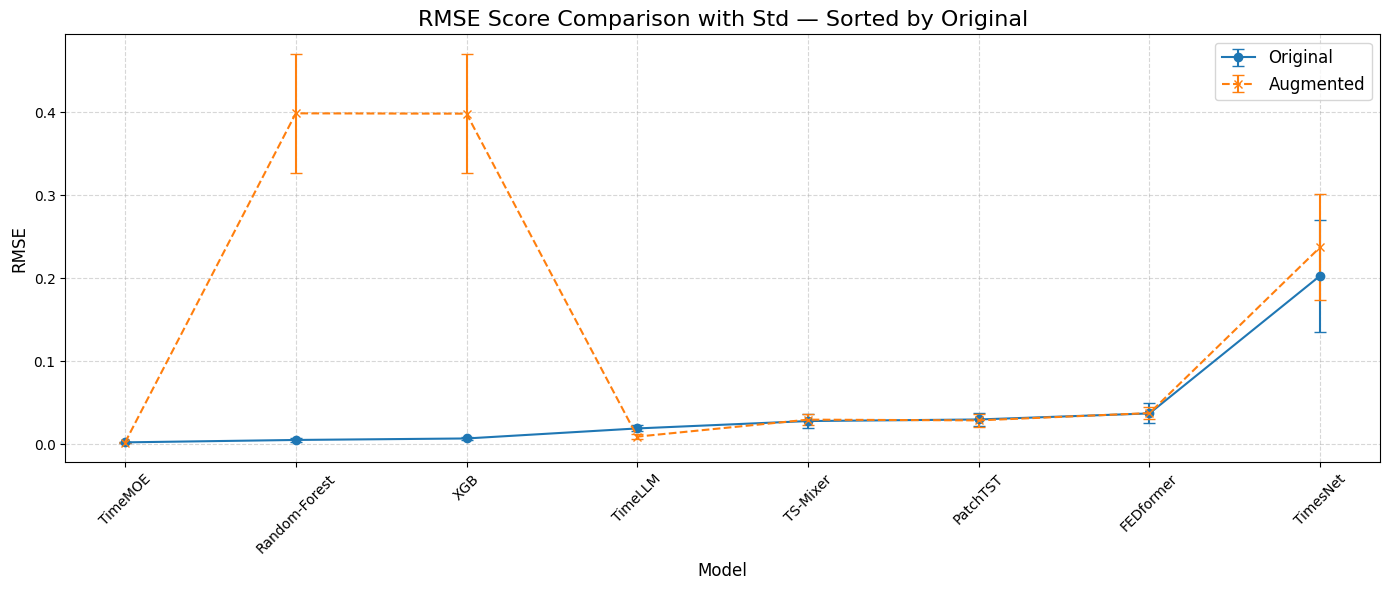

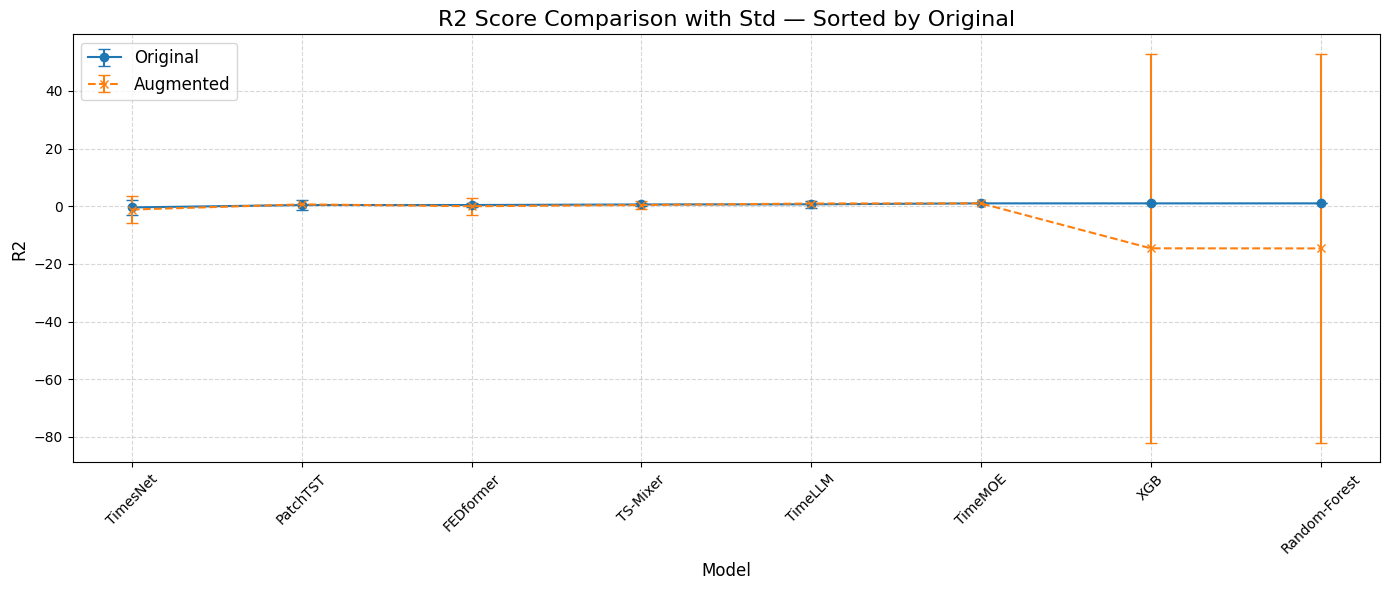

In [116]:
lineplot_sorted_metric(structured_results_df_cleaned, metric='MAE') 
lineplot_sorted_metric(structured_results_df_cleaned, metric='MAPE') 
lineplot_sorted_metric(structured_results_df_cleaned, metric='SMAPE') 
lineplot_sorted_metric(structured_results_df_cleaned, metric='RMSE') 
lineplot_sorted_metric(structured_results_df_cleaned, metric='R2') 



In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spider_metric_per_model(df, metric='MAE', variant='Original', top_n_models=5):
    # Identify location columns, excluding 'All' and selecting only the variant
    suffix = '(Org)' if variant == 'Original' else '(Aug)'
    location_cols = [col for col in df.columns if col.endswith(suffix) and not col.startswith('All')]
    location_names = [col.replace(f' {suffix}', '') for col in location_cols]

    # Filter DataFrame by metric
    df_metric = df[df['Metric'] == metric].copy()

    # Sort models by average value across selected locations
    model_means = []
    for _, row in df_metric.iterrows():
        values = []
        for col in location_cols:
            val = row[col]
            if isinstance(val, list) and len(val) > 0:
                values.append(val[0])  # use mean
        model_means.append(np.nanmean(values))

    df_metric['MeanAcrossLocs'] = model_means
    df_metric = df_metric.sort_values(by='MeanAcrossLocs', ascending=True if metric != 'R2' else False)
    df_top = df_metric.head(top_n_models)

    # Radar chart setup
    labels = location_names
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # close the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for _, row in df_top.iterrows():
        model = row['Model']
        values = [row[f"{loc} {suffix}"][0] if isinstance(row[f"{loc} {suffix}"], list) else np.nan for loc in labels]
        values += values[:1]  # close the circle
        ax.plot(angles, values, label=model)
        ax.fill(angles, values, alpha=0.1)

    ax.set_title(f'{metric} Across Locations ({variant})', size=14)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.grid(True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()


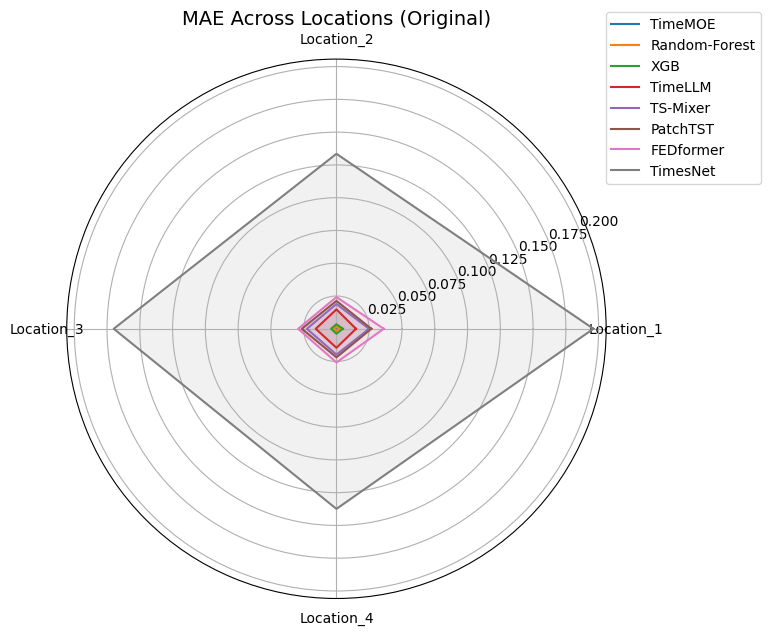

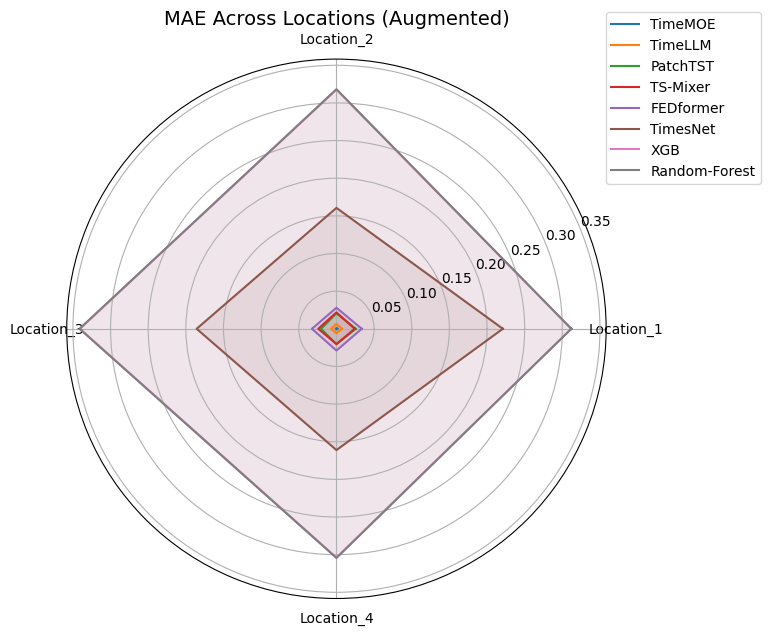

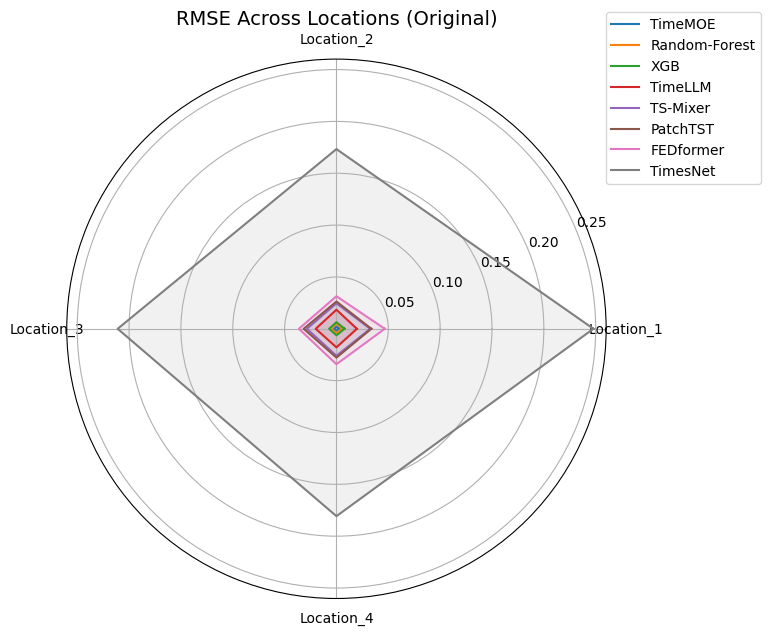

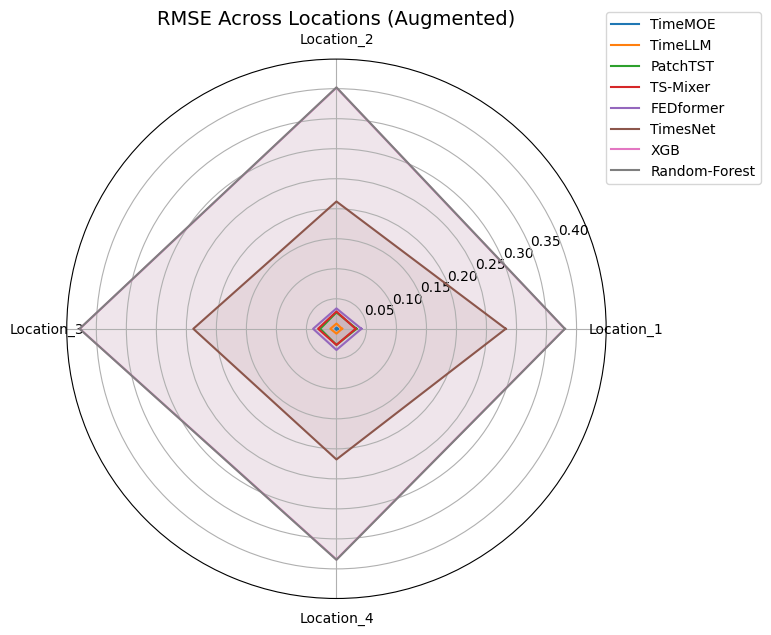

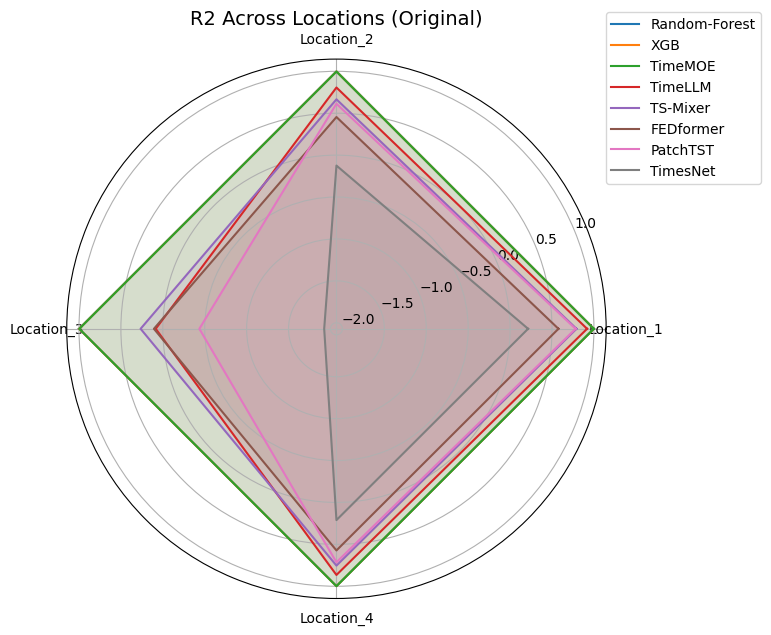

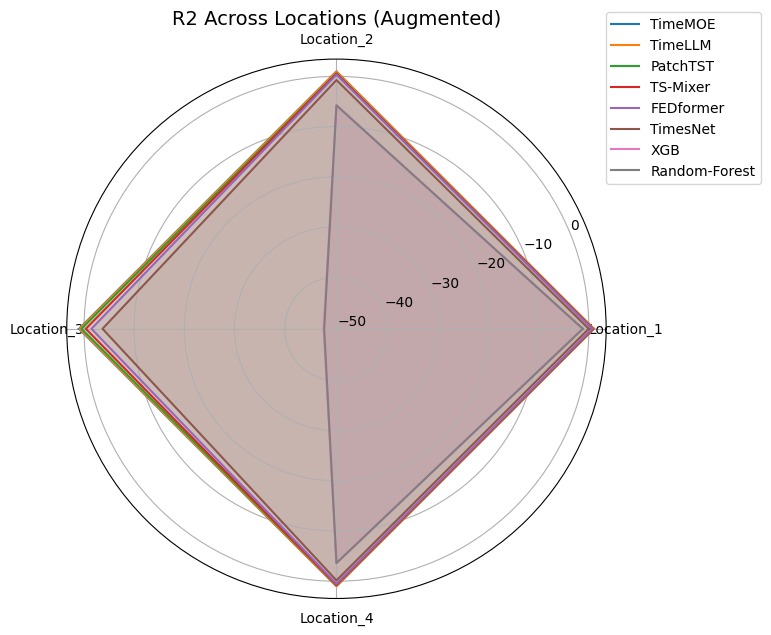

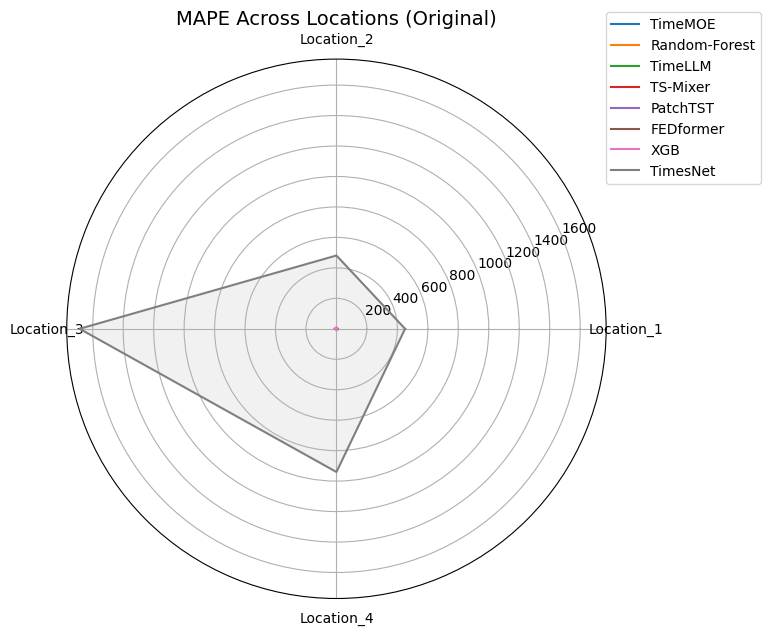

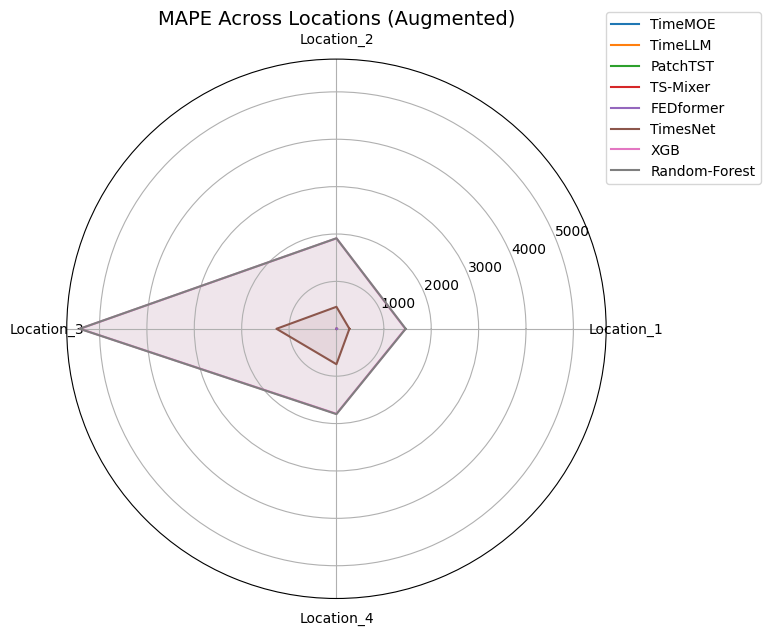

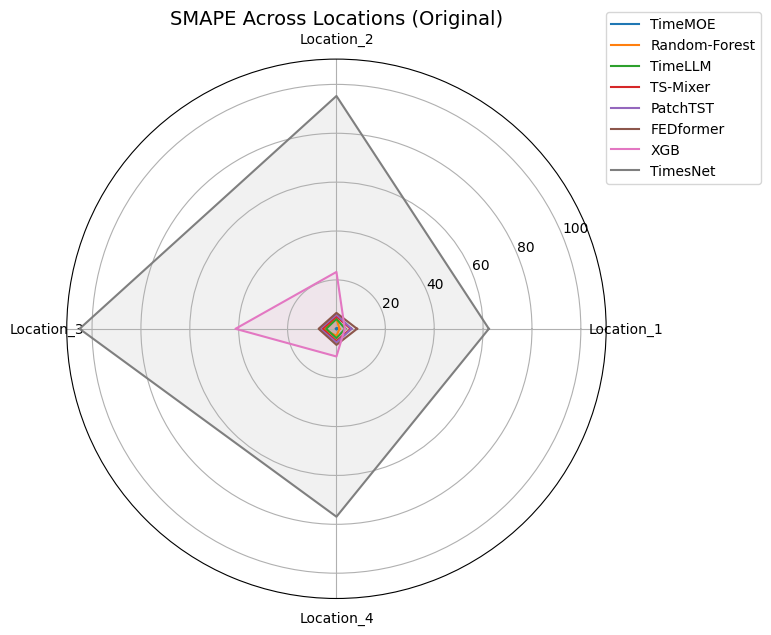

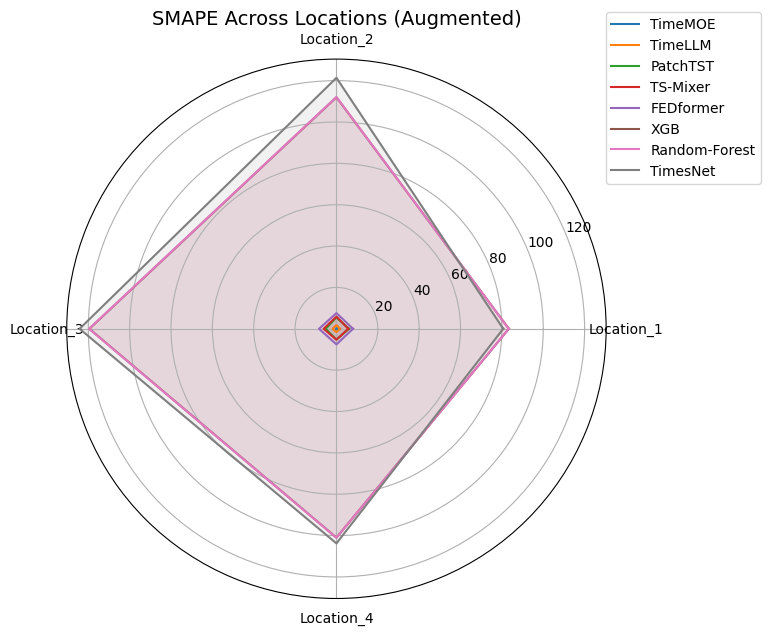

In [89]:
plot_spider_metric_per_model(structured_results_df_cleaned, metric='MAE', variant='Original', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='MAE', variant='Augmented', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='RMSE', variant='Original', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='RMSE', variant='Augmented', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='R2', variant='Original', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='R2', variant='Augmented', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='MAPE', variant='Original', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='MAPE', variant='Augmented', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='SMAPE', variant='Original', top_n_models=8)
plot_spider_metric_per_model(structured_results_df_cleaned, metric='SMAPE', variant='Augmented', top_n_models=8)


In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_spider_all_models_with_std(df, metric='MAE'):
    suffixes = {'Original': '(Org)', 'Augmented': '(Aug)'}
    
    # Identify location names
    all_location_cols = [col for col in df.columns if any(col.endswith(suffix) for suffix in suffixes.values())]
    location_names = sorted(set(
        col.replace(f' {suffix}', '')
        for col in all_location_cols
        for suffix in suffixes.values()
        if col.endswith(suffix) and not col.startswith("All")
    ))

    # Filter dataframe for selected metric
    df_metric = df[df['Metric'] == metric].copy()

    # Radar setup
    angles = np.linspace(0, 2 * np.pi, len(location_names), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    colors = plt.cm.get_cmap("tab20", len(df_metric))

    for idx, (_, row) in enumerate(df_metric.iterrows()):
        model = row['Model']
        for variant, suffix in suffixes.items():
            means = []
            stds = []

            for loc in location_names:
                col = f"{loc} {suffix}"
                val = row.get(col, [np.nan, 0])
                if isinstance(val, list) and len(val) >= 2:
                    means.append(val[0])
                    stds.append(val[1])
                else:
                    means.append(np.nan)
                    stds.append(0)

            # Wrap around for radar
            means += means[:1]
            stds += stds[:1]

            # Set plot properties
            color = colors(idx)
            linestyle = '-' if variant == 'Original' else '--'
            label = f"{model} ({variant})"

            ax.plot(angles, means, linestyle, label=label, color=color)
            ax.fill_between(angles,
                            np.array(means) - np.array(stds),
                            np.array(means) + np.array(stds),
                            alpha=0.1, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(location_names, fontsize=11)
    ax.set_title(f'{metric} Comparison (Original vs Augmented) ±1 std', size=14)
    ax.grid(True)
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.02), fontsize=9)
    plt.tight_layout()
    plt.show()


/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11864/2254562838.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


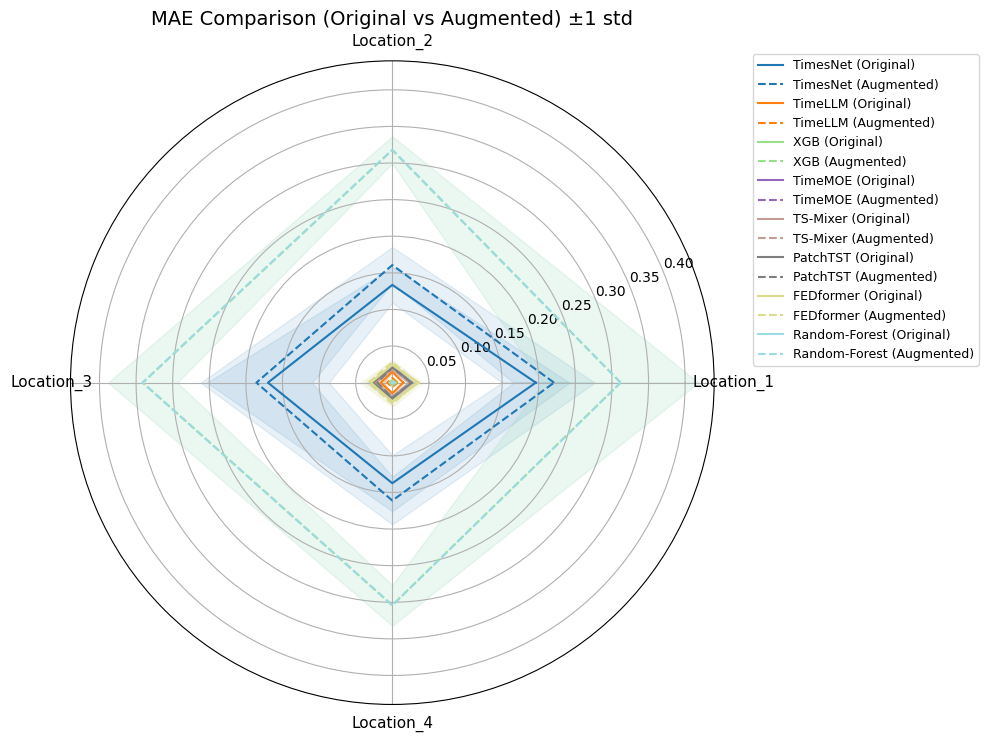

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11864/2254562838.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


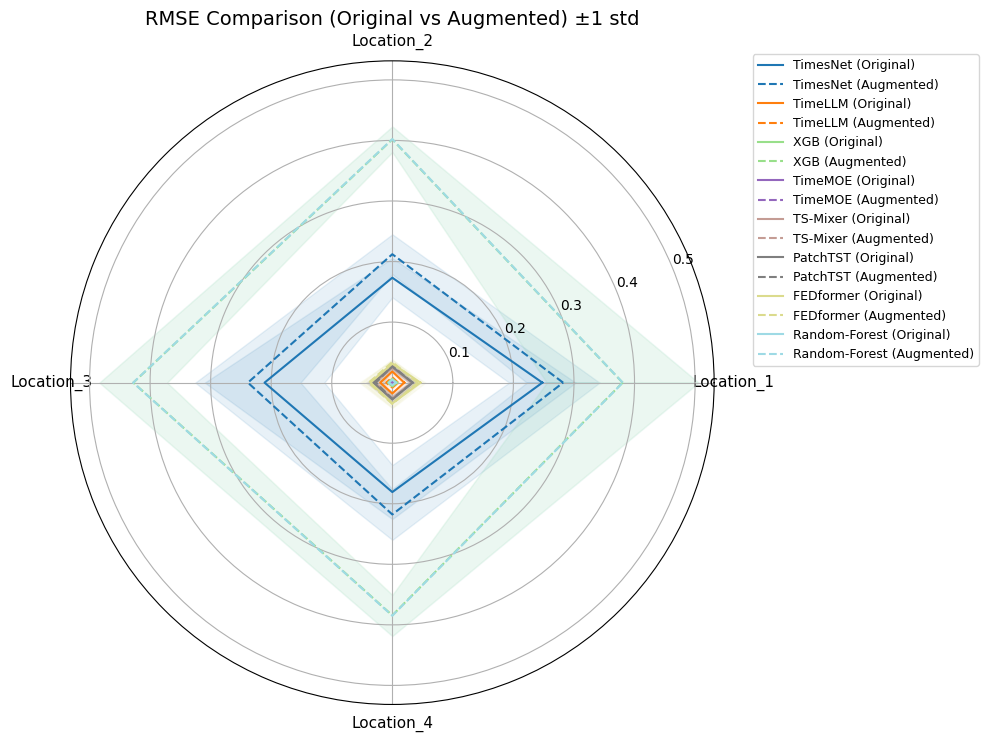

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11864/2254562838.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


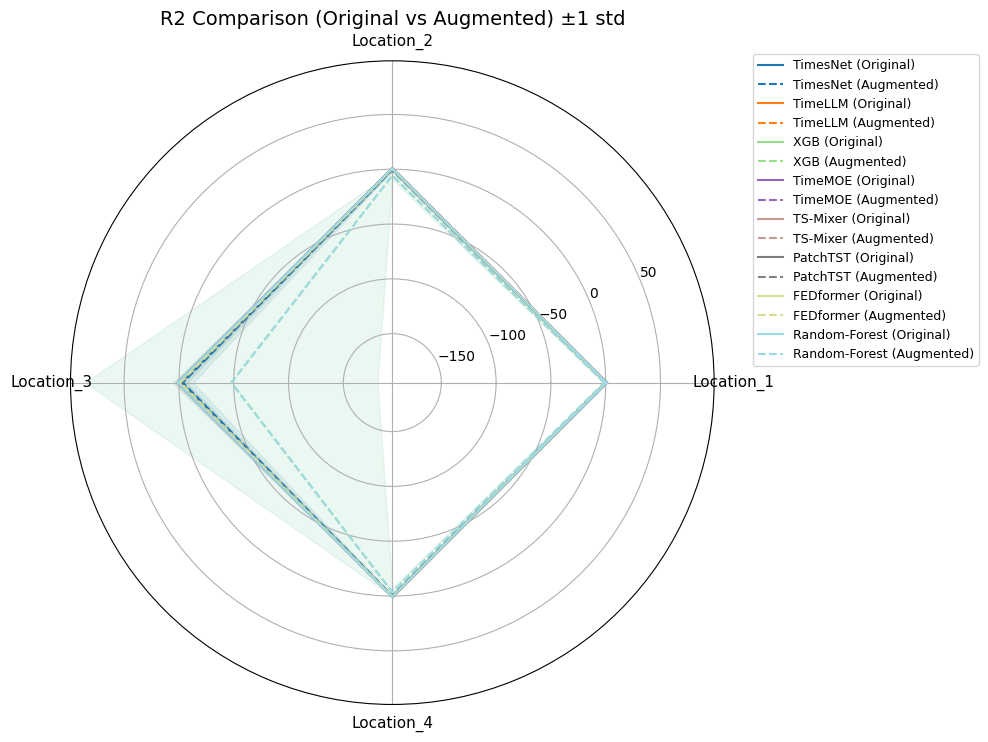

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11864/2254562838.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


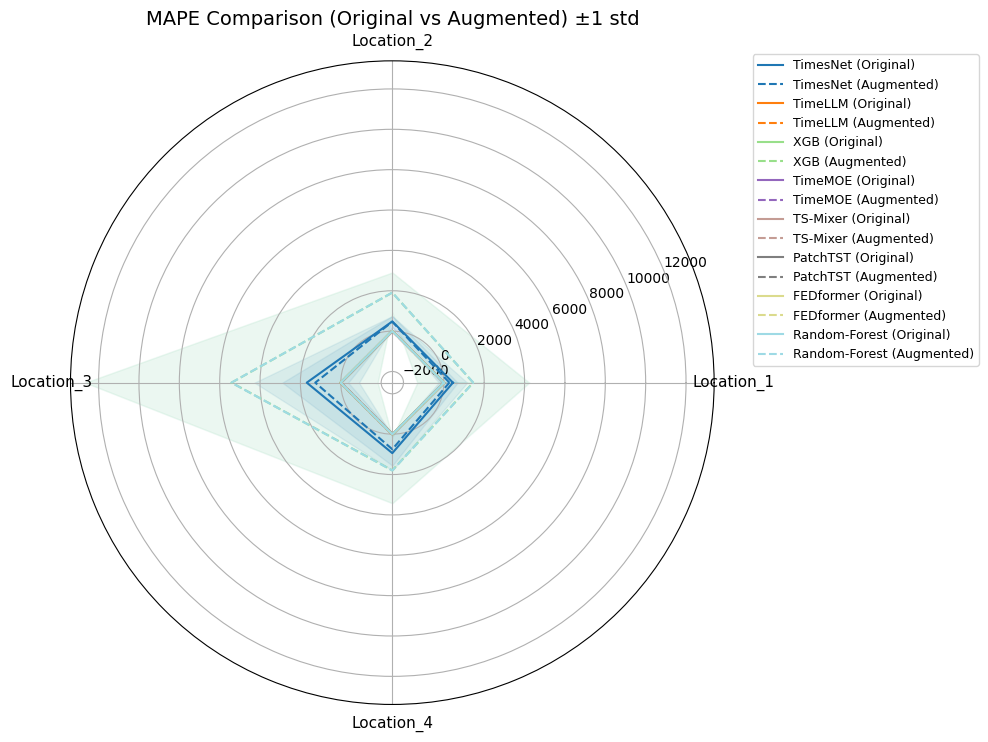

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11864/2254562838.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(df_metric))


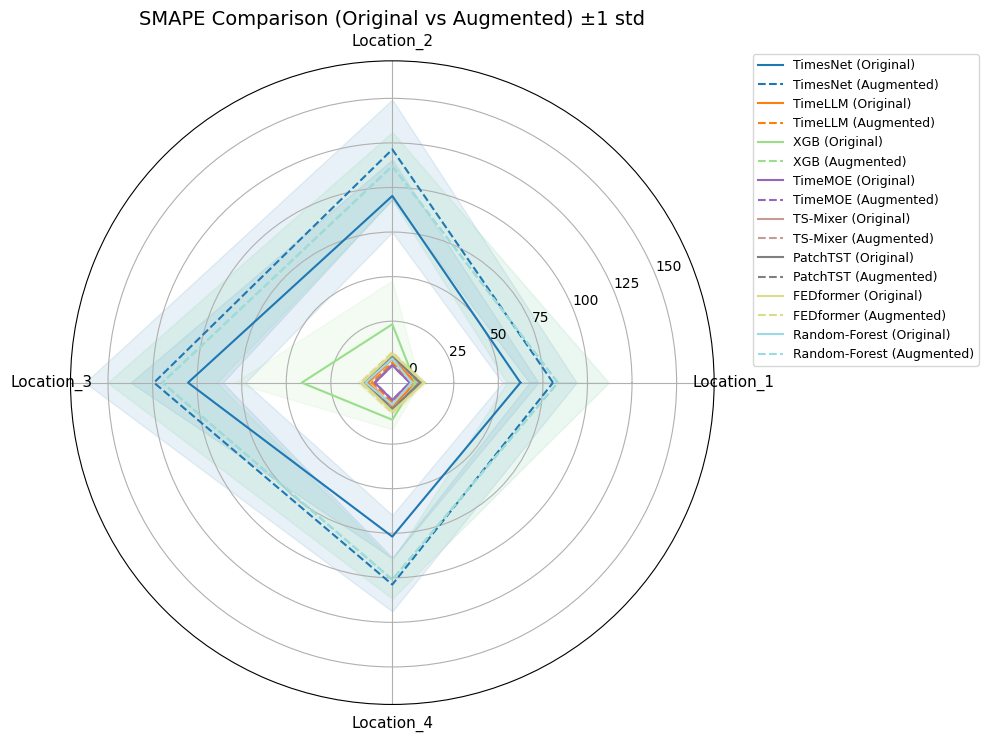

In [90]:
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='MAE')
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='RMSE')
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='R2')
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='MAPE')
plot_spider_all_models_with_std(structured_results_df_cleaned, metric='SMAPE')



In [91]:
def plot_violin_by_model(df, metric='MAE', log_y=False, sort_models=True):
    df_metric = df[df['Metric'] == metric]
    records = []

    for _, row in df_metric.iterrows():
        model = row['Model']
        for col in df.columns:
            if col.endswith(' (Org)') or col.endswith(' (Aug)'):
                variant = 'Original' if col.endswith(' (Org)') else 'Augmented'
                location = col.replace(' (Org)', '').replace(' (Aug)', '')
                value = row[col]
                if isinstance(value, list) and value:
                    records.append({
                        'Model': model,
                        'Variant': variant,
                        'Location': location,
                        'Metric': metric,
                        'Value': value[0]
                    })

    plot_df = pd.DataFrame(records)

    # Optional: sort models by median Original MAE
    if sort_models:
        model_order = (
            plot_df[plot_df['Variant'] == 'Original']
            .groupby('Model')['Value'].median()
            .sort_values()
            .index.tolist()
        )
    else:
        model_order = plot_df['Model'].unique()

    plt.figure(figsize=(16, 7))
    sns.violinplot(data=plot_df, x='Model', y='Value', hue='Variant',
                   order=model_order, split=True, inner='quartile', cut=0)

    # Overlay dots for clarity
    sns.stripplot(data=plot_df, x='Model', y='Value', hue='Variant',
                  order=model_order, dodge=True, jitter=0.15, alpha=0.5, linewidth=0.5, marker='o')

    # Clean up double legend from hue in both plots
    handles, labels = plt.gca().get_legend_handles_labels()
    n = len(set(plot_df['Variant']))
    plt.legend(handles[:n], labels[:n], title="Variant")

    plt.title(f'{metric} Distribution Across Models (Original vs Augmented)', fontsize=14)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)

    if log_y:
        plt.yscale('log')
        plt.ylabel(f'{metric} (Log Scale)')

    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


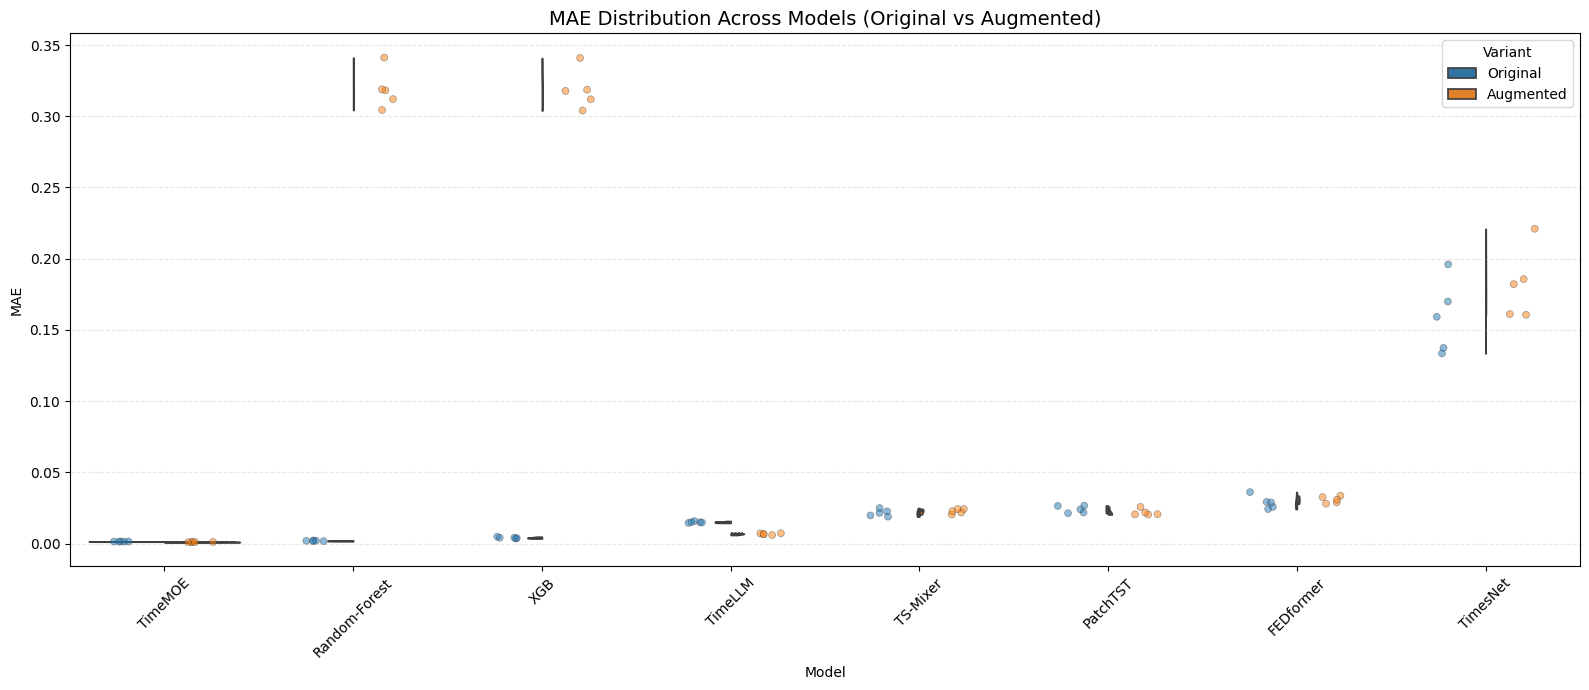

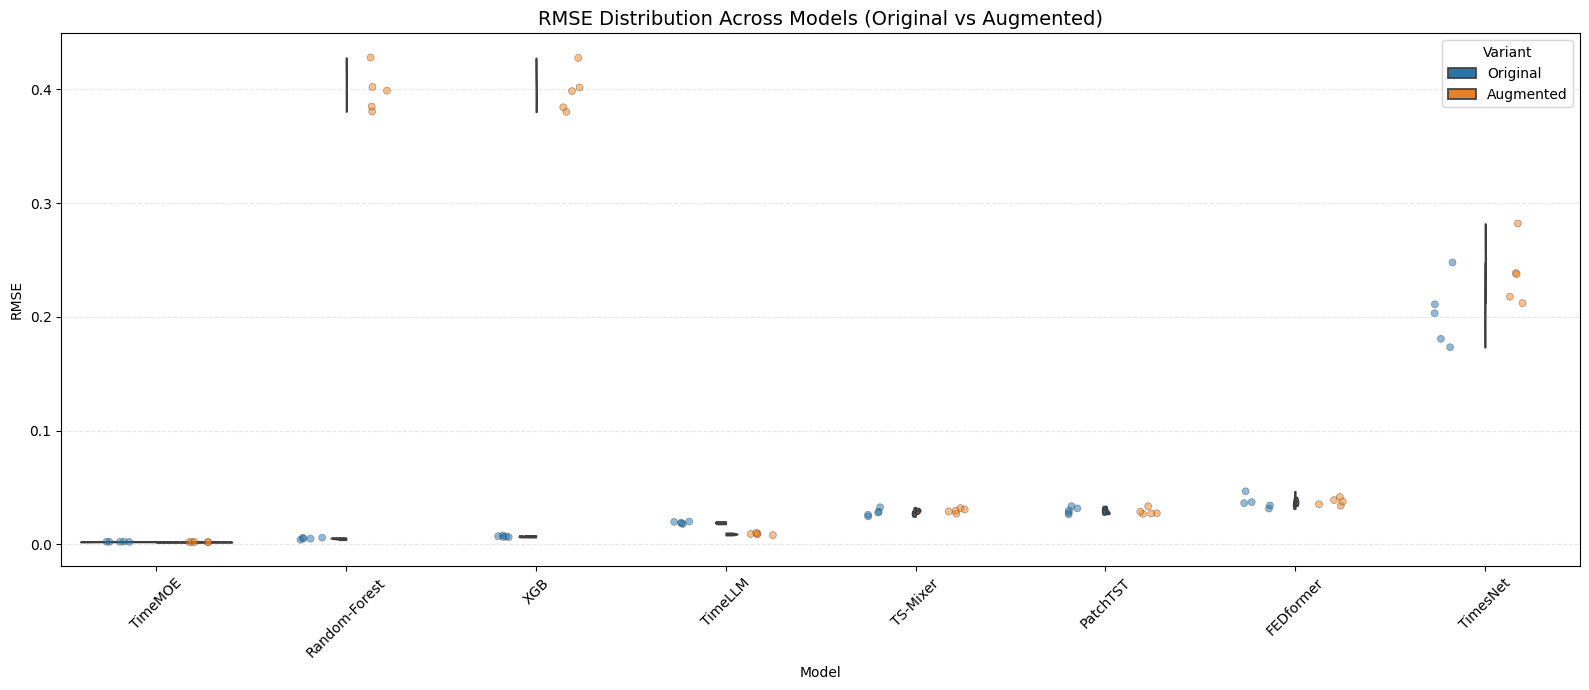

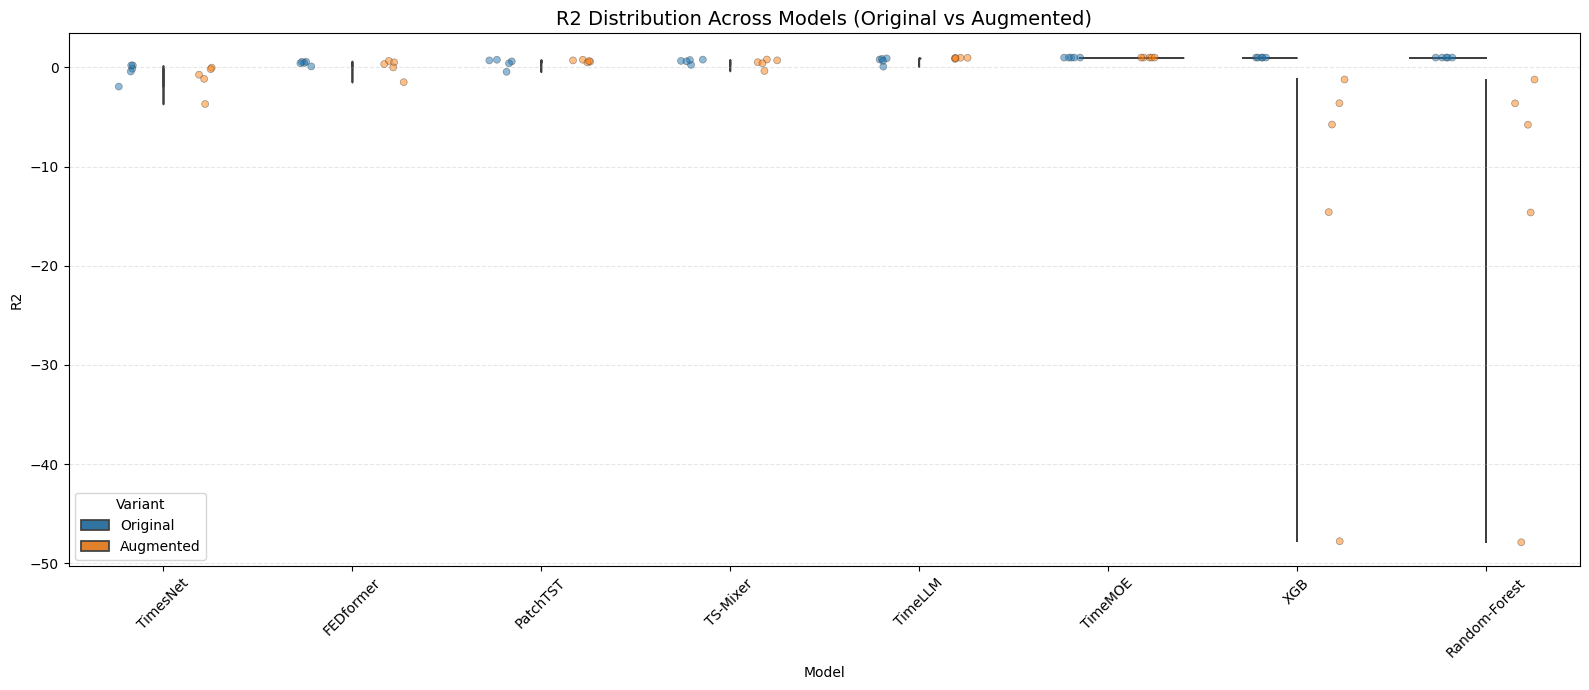

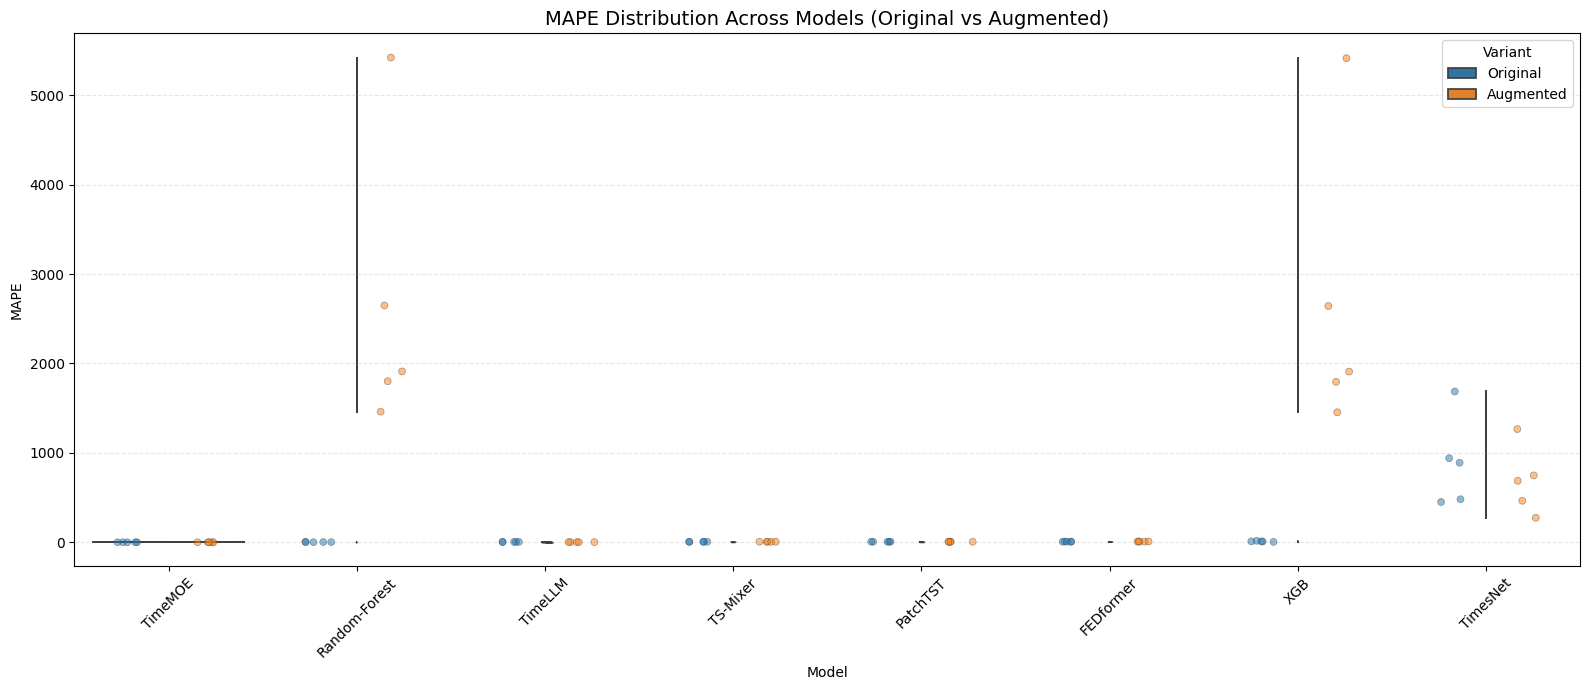

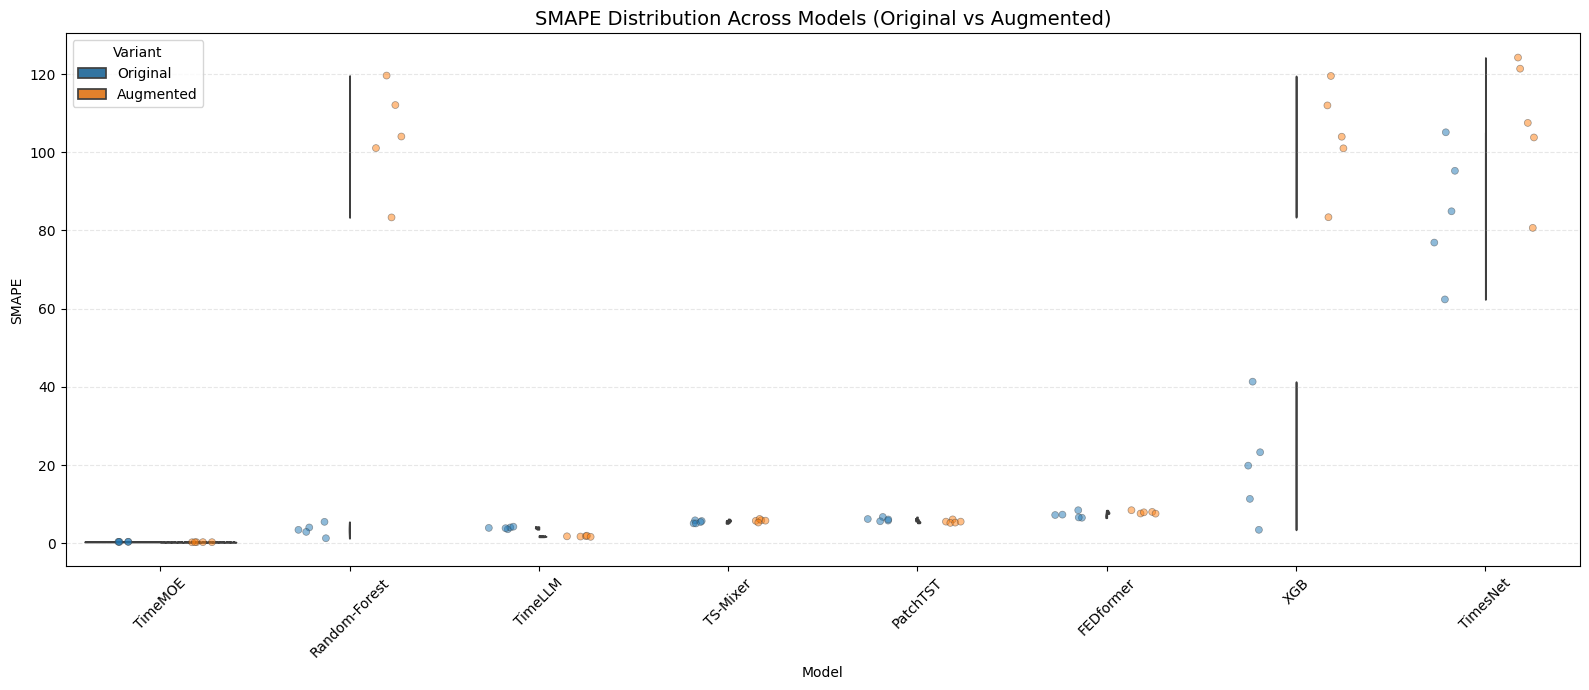

In [92]:
plot_violin_by_model(structured_results_df_cleaned, metric='MAE')
plot_violin_by_model(structured_results_df_cleaned, metric='RMSE')
plot_violin_by_model(structured_results_df_cleaned, metric='R2')
plot_violin_by_model(structured_results_df_cleaned, metric='MAPE')
plot_violin_by_model(structured_results_df_cleaned, metric='SMAPE')


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_model_metric_heatmap(df, metrics=['MAE', 'RMSE', 'R2'], cmap='coolwarm'):
    heatmap_data = []

    for metric in metrics:
        df_metric = df[df['Metric'] == metric]

        for _, row in df_metric.iterrows():
            model = row['Model']
            for col in df.columns:
                if col.endswith(' (Org)') or col.endswith(' (Aug)'):
                    variant = 'Original' if col.endswith(' (Org)') else 'Augmented'
                    location = col.replace(' (Org)', '').replace(' (Aug)', '')
                    value = row[col]

                    if isinstance(value, list) and value:
                        heatmap_data.append({
                            'Model': model,
                            'Metric': metric,
                            'Variant': variant,
                            'Value': value[0]
                        })

    df_heatmap = pd.DataFrame(heatmap_data)

    # Pivot to have each column as "Metric (Variant)", values as mean
    heatmap_pivot = (
        df_heatmap.groupby(['Model', 'Metric', 'Variant'])['Value']
        .mean()
        .reset_index()
        .assign(MetricVariant=lambda x: x['Metric'] + ' (' + x['Variant'] + ')')
        .pivot(index='Model', columns='MetricVariant', values='Value')
    )

    # Optional: sort rows by average MAE Original
    if 'MAE (Original)' in heatmap_pivot.columns:
        heatmap_pivot = heatmap_pivot.sort_values(by='MAE (Original)', ascending=True)

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        heatmap_pivot,
        annot=True,
        fmt=".2f",
        cmap=cmap,
        linewidths=0.5,
        cbar_kws={"label": "Metric Value"}
    )

    plt.title("Model Performance Heatmap (Original vs Augmented)", fontsize=14)
    plt.xlabel("Metric (Variant)")
    plt.ylabel("Model")
    plt.tight_layout()
    plt.show()

    return heatmap_pivot


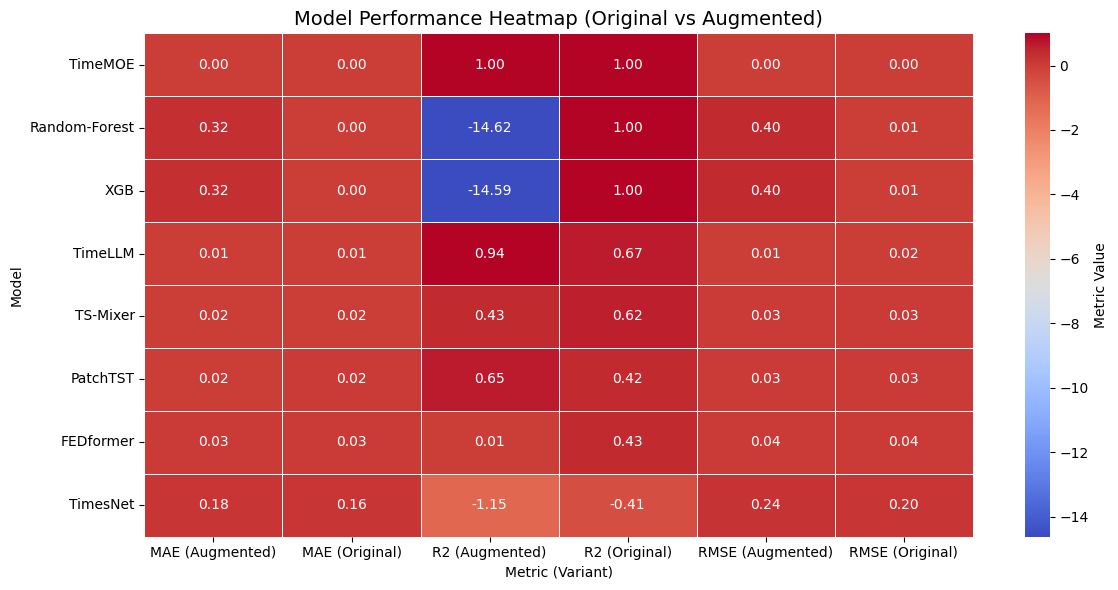

In [98]:
heatmap_df = plot_model_metric_heatmap(structured_results_df_cleaned)


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_metric_wise_heatmaps(df, metrics=['MAE', 'RMSE', 'R2'], cmap='coolwarm'):
    for metric in metrics:
        metric_data = []

        df_metric = df[df['Metric'] == metric]

        for _, row in df_metric.iterrows():
            model = row['Model']
            for col in df.columns:
                if col.endswith(' (Org)') or col.endswith(' (Aug)'):
                    variant = 'Original' if col.endswith(' (Org)') else 'Augmented'
                    location = col.replace(' (Org)', '').replace(' (Aug)', '')
                    value = row[col]

                    if isinstance(value, list) and value:
                        metric_data.append({
                            'Model': model,
                            'Variant': variant,
                            'Value': value[0]
                        })

        df_metric_pivot = (
            pd.DataFrame(metric_data)
            .groupby(['Model', 'Variant'])['Value']
            .mean()
            .reset_index()
            .pivot(index='Model', columns='Variant', values='Value')
        )

        df_metric_pivot = df_metric_pivot.sort_values(by='Original', ascending=True)

        # Plot
        plt.figure(figsize=(8, max(6, 0.5 * len(df_metric_pivot))))
        sns.heatmap(
            df_metric_pivot,
            annot=True,
            fmt=".3f",
            cmap=cmap,
            linewidths=0.5,
            cbar_kws={"label": f"{metric} Value"}
        )

        plt.title(f"{metric} - Original vs Augmented", fontsize=14)
        plt.xlabel("Variant")
        plt.ylabel("Model")
        plt.tight_layout()
        plt.show()


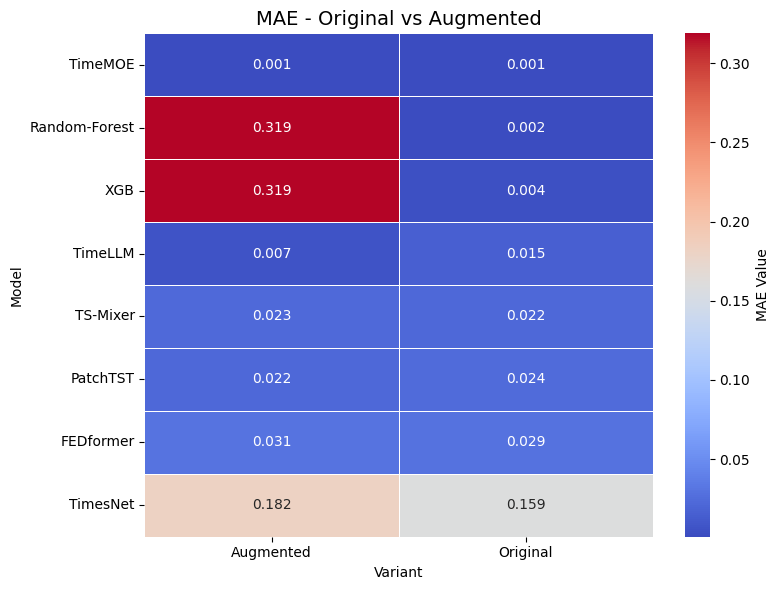

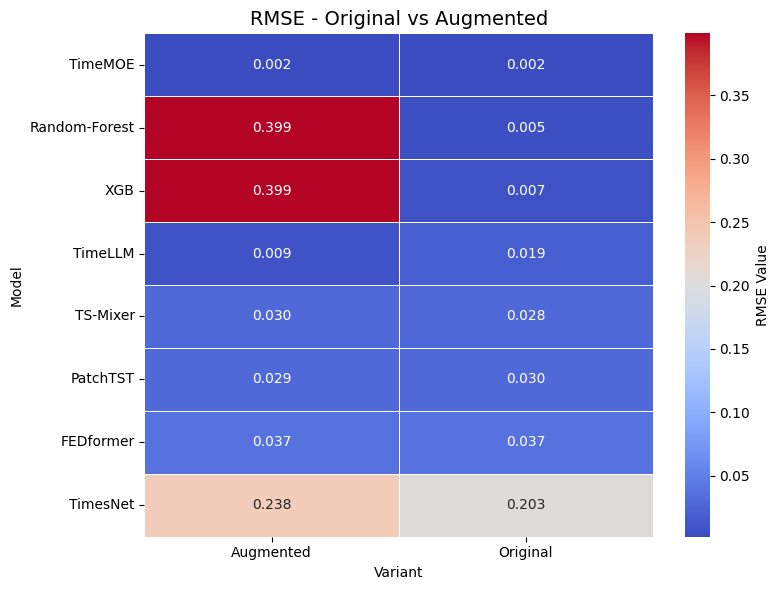

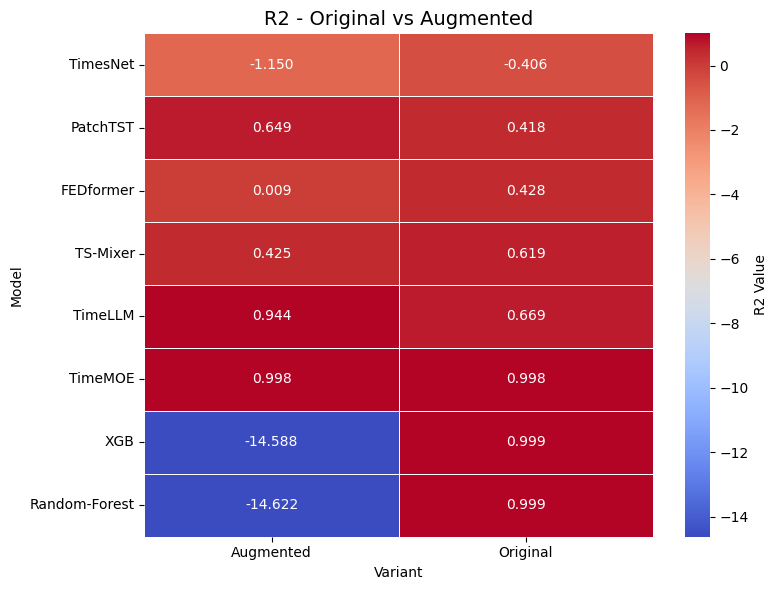

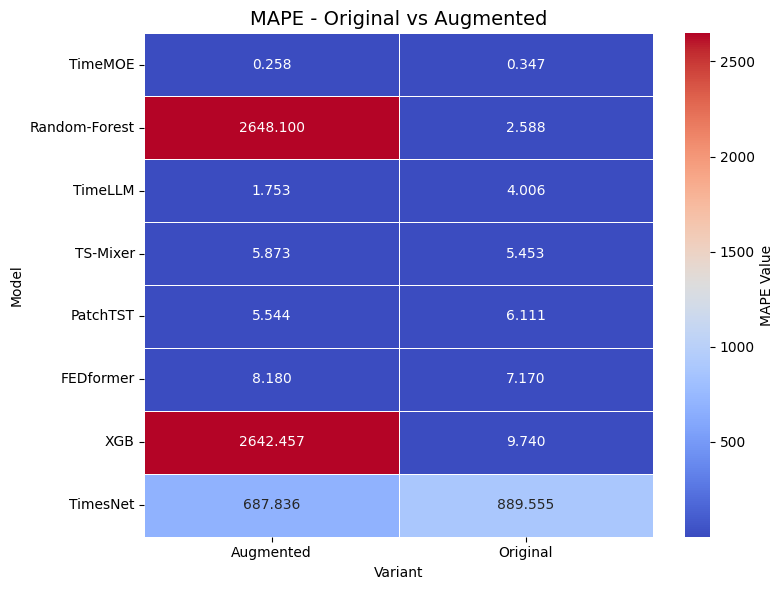

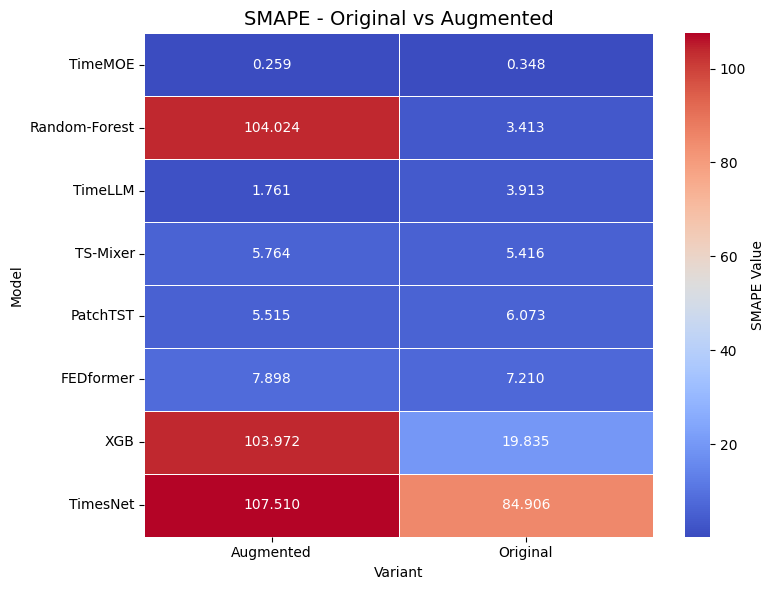

In [100]:
plot_metric_wise_heatmaps(structured_results_df_cleaned, metrics=['MAE', 'RMSE', 'R2','MAPE','SMAPE'])


<Figure size 1200x600 with 0 Axes>

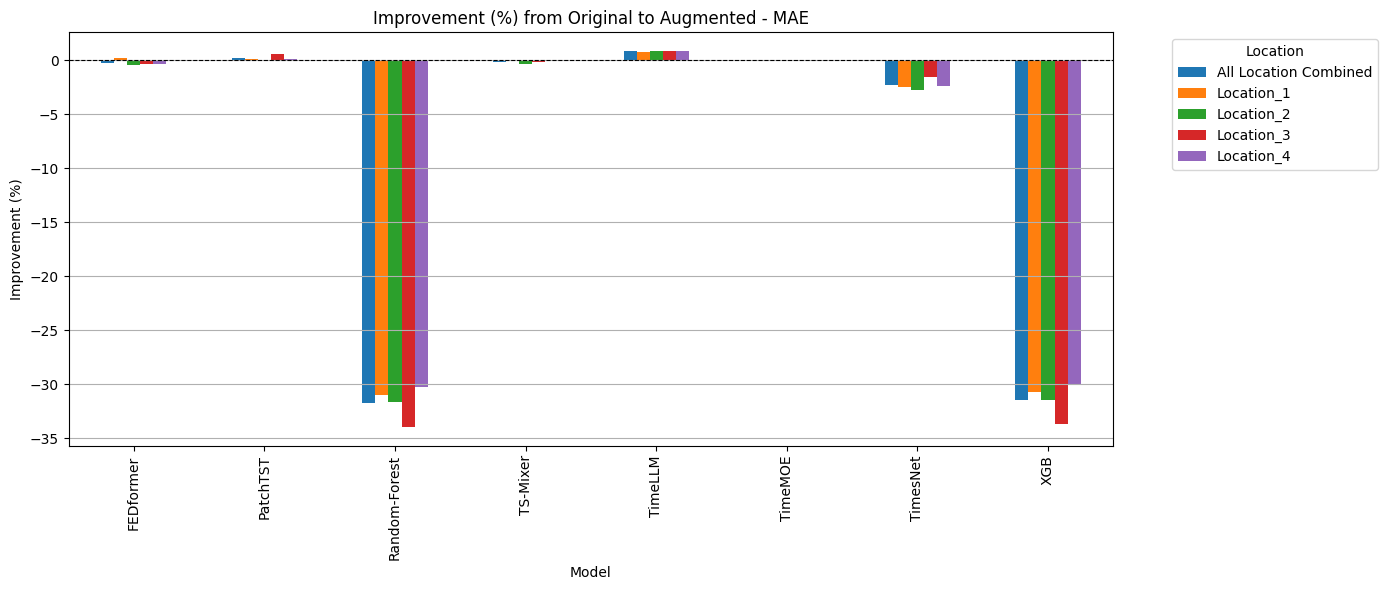

<Figure size 1200x600 with 0 Axes>

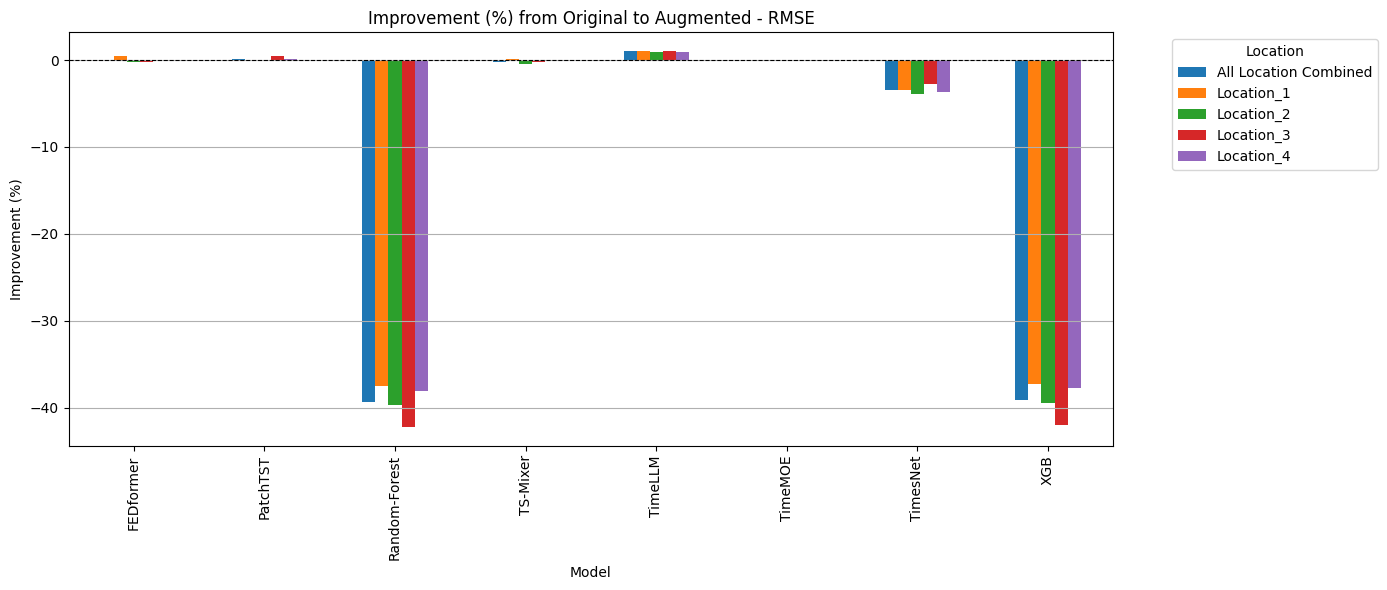

<Figure size 1200x600 with 0 Axes>

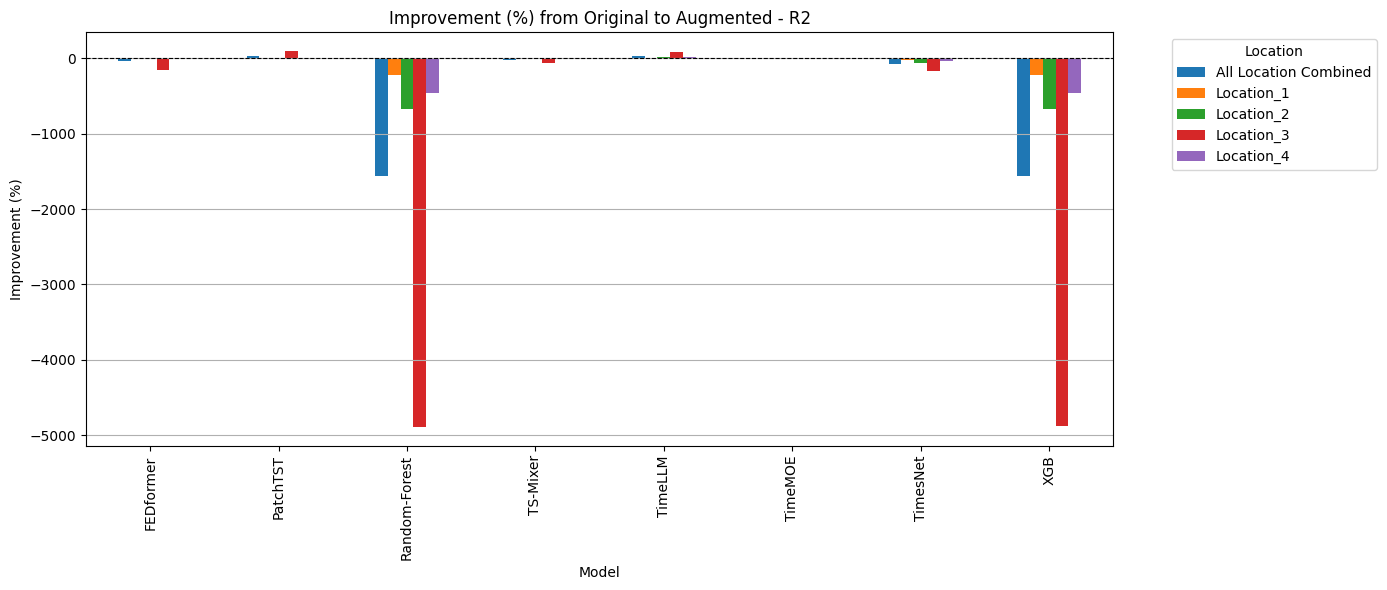

<Figure size 1200x600 with 0 Axes>

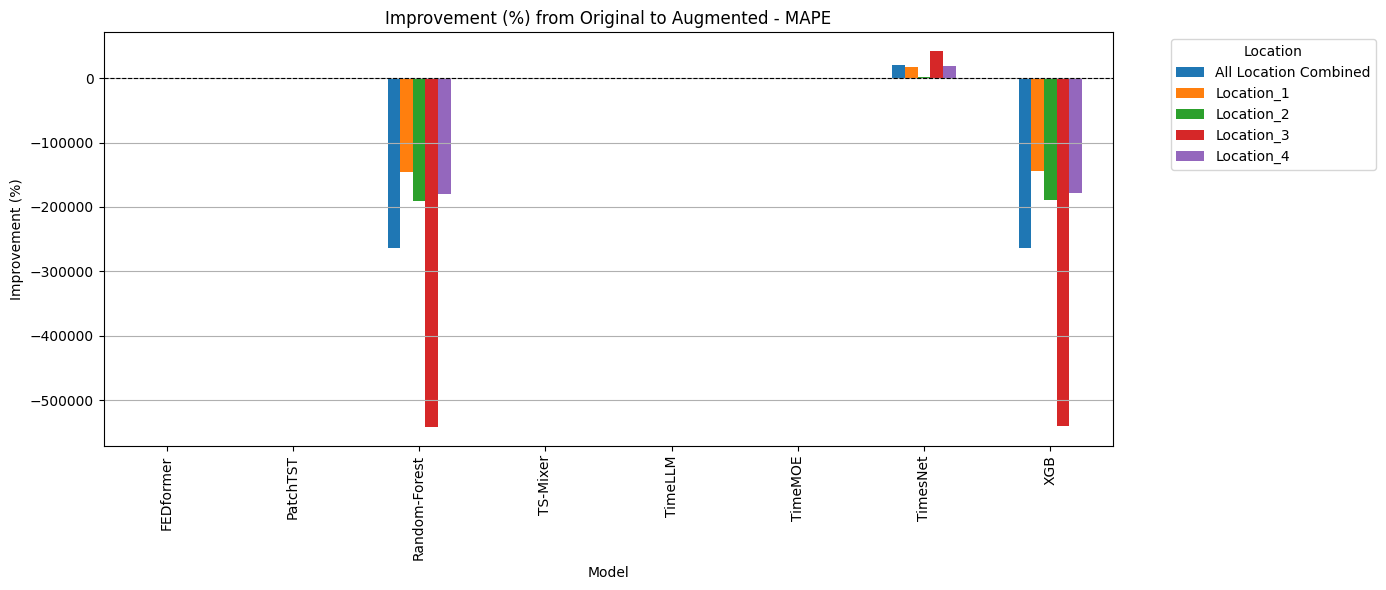

<Figure size 1200x600 with 0 Axes>

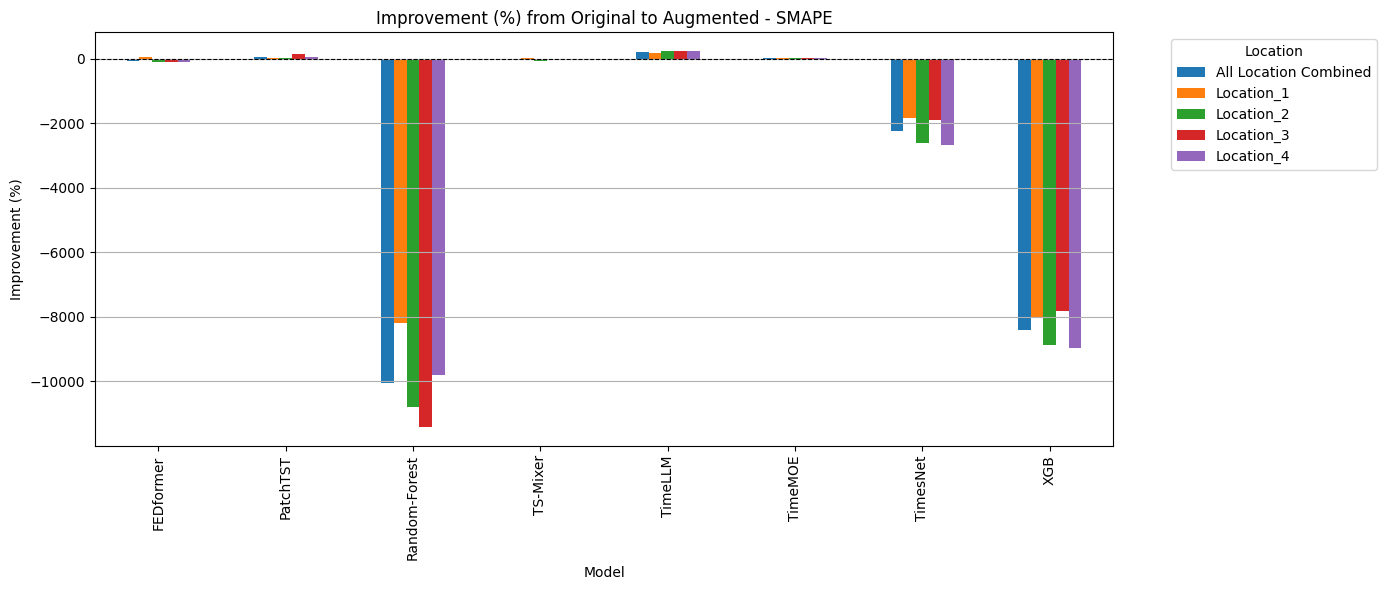

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is already loaded into: df
# Format: columns include 'Model', 'Metric', 'Location_X (Org)', 'Location_X (Aug)', etc.

def compute_improvement_df(df):
    improvement_rows = []
    
    # Loop through each row (Model-Metric)
    for _, row in df.iterrows():
        model = row['Model']
        metric = row['Metric']
        
        for col in df.columns:
            if '(Org)' in col:
                loc = col.replace(' (Org)', '')
                org_mean, org_std = row[col]
                aug_mean, aug_std = row[f"{loc} (Aug)"]

                if metric == 'R2':  # Higher is better
                    improvement = (aug_mean - org_mean) * 100
                else:  # Lower is better
                    improvement = (org_mean - aug_mean) * 100

                improvement_rows.append({
                    'Model': model,
                    'Metric': metric,
                    'Location': loc,
                    'Improvement (%)': improvement,
                    'Org STD': org_std,
                    'Aug STD': aug_std
                })
    return pd.DataFrame(improvement_rows)

# --- Plotting ---
def plot_improvement_barplot(improvement_df, metric):
    plt.figure(figsize=(12, 6))
    
    # Filter for this metric
    df_metric = improvement_df[improvement_df['Metric'] == metric]
    
    # Pivot: Model x Location → Improvement
    pivot = df_metric.pivot(index='Model', columns='Location', values='Improvement (%)')
    pivot = pivot.sort_index()
    
    pivot.plot(kind='bar', figsize=(14, 6))
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title(f'Improvement (%) from Original to Augmented - {metric}')
    plt.ylabel('Improvement (%)')
    plt.xlabel('Model')
    plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.show()

# --- Usage ---
improvement_df = compute_improvement_df(structured_results_df_cleaned)
plot_improvement_barplot(improvement_df, metric='MAE')  
plot_improvement_barplot(improvement_df, metric='RMSE') 
plot_improvement_barplot(improvement_df, metric='R2')  
plot_improvement_barplot(improvement_df, metric='MAPE')
plot_improvement_barplot(improvement_df, metric='SMAPE')  



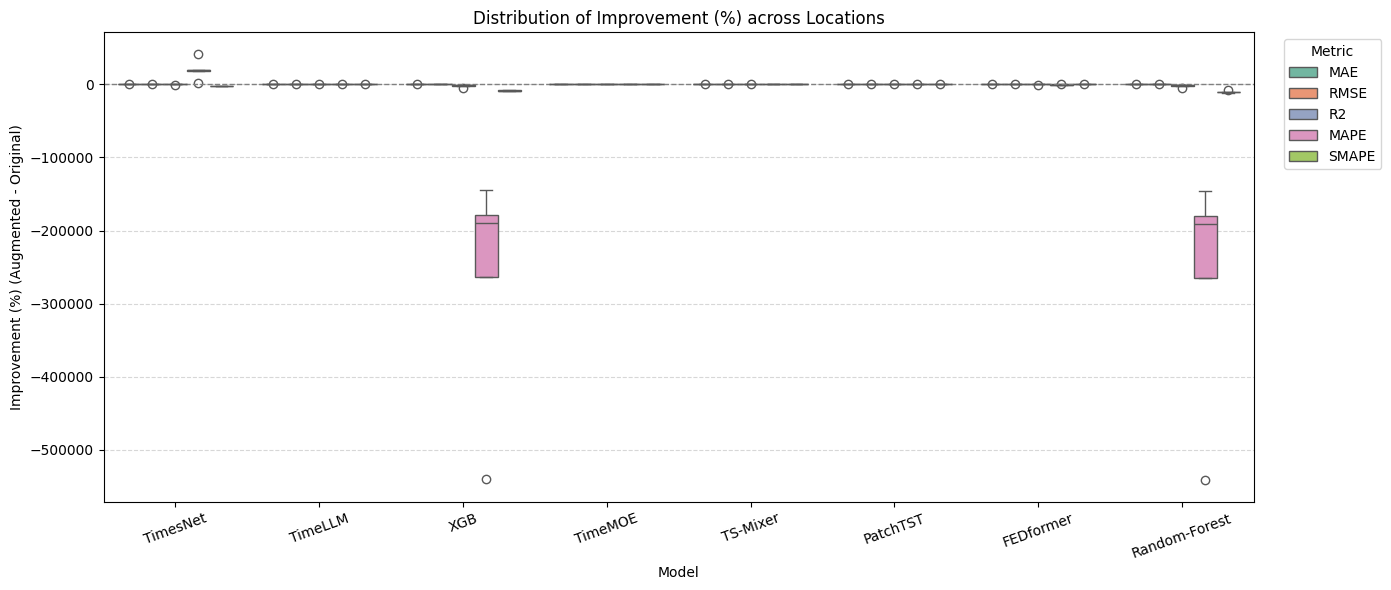

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot_improvements(improvement_df):
    plt.figure(figsize=(14, 6))
    sns.boxplot(
        data=improvement_df,
        x='Model',
        y='Improvement (%)',
        hue='Metric',
        palette='Set2',
        showfliers=True  # Set False if you want to ignore outliers
    )
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.title("Distribution of Improvement (%) across Locations")
    plt.ylabel("Improvement (%) (Augmented - Original)")
    plt.xticks(rotation=20)
    plt.legend(title="Metric", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Call it:
plot_boxplot_improvements(improvement_df)


In [45]:
monthly_summary_dict = {}
folder_path = 'Evaluation_org_vs_aug/Results'
for model in os.listdir(folder_path):
    path  =  os.path.join(folder_path,model,'monthly_summary.csv')
    monthly_summary_dict[model]  = pd.read_csv(path)


In [46]:
monthly_df =  pd.DataFrame(columns=monthly_summary_dict[next(iter(monthly_summary_dict.keys()))].columns)
for model in monthly_summary_dict.keys():
    df = monthly_summary_dict[model]
    df['Model'] = model
    monthly_df = pd.concat([monthly_df,df],ignore_index=True)

/var/folders/2v/86sq867s35xc02tyt5c0rwh00000gp/T/ipykernel_11864/1871565408.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  monthly_df = pd.concat([monthly_df,df],ignore_index=True)


In [47]:
monthly_df

month  mae_org_mean  mae_org_std  rmse_org_mean  rmse_org_std  \
0   2021-01      0.168159     0.045827       0.210074      0.055083   
1   2021-02      0.166135     0.066519       0.213274      0.083363   
2   2021-03      0.186113     0.071890       0.231792      0.088419   
3   2021-04      0.153913     0.029808       0.201116      0.038517   
4   2021-05      0.124554     0.017171       0.168596      0.027893   
..      ...           ...          ...            ...           ...   
91  2021-08      0.001400     0.000476       0.003886      0.001228   
92  2021-09      0.001762     0.000232       0.004695      0.001326   
93  2021-10      0.001978     0.000651       0.005270      0.002086   
94  2021-11      0.002950     0.001180       0.007536      0.003096   
95  2021-12      0.003052     0.001411       0.008197      0.004264   

    mape_org_mean  mape_org_std  smape_org_mean  smape_org_std  r2_org_mean  \
0     1293.895933   1075.714552       96.488957      20.610727    -0.136147   
1     1386.988993   1710.439562       87.279425      27.062470    -0.113595   
2     2551.546984   4365.100374       89.856276      34.512353    -0.068969   
3      407.773910    349.837689       82.182110      27.041909    -0.001770   
4      908.816665   1024.902325       83.782602      28.758218    -0.031445   
..            ...           ...             ...            ...          ...   
91       2.918222      0.903176        4.005367       1.320092     0.999279   
92       1.814617      0.879904        2.292850       1.129171     0.999411   
93       2.384899      0.481250        2.705190       0.428664     0.999586   
94       1.910945      1.201139        2.024994       0.883144     0.999096   
95       1.549251      0.479508        1.557882       0.421905     0.998901   

    ...  mae_aug_std  rmse_aug_mean  rmse_aug_std  mape_aug_mean  \
0   ...     0.047206       0.238978      0.055824    1323.959864   
1   ...     0.079603       0.246091      0.088844     888.137601   
2   ...     0.062397       0.275306      0.065354    1838.545529   
3   ...     0.036479       0.266625      0.042978     375.148138   
4   ...     0.017489       0.212192      0.025309     756.833543   
..  ...          ...            ...           ...            ...   
91  ...     0.021024       0.429512      0.016036    3575.870242   
92  ...     0.033924       0.354410      0.043455    1123.298283   
93  ...     0.028314       0.392994      0.032171    2612.362785   
94  ...     0.055926       0.419702      0.063414     410.509878   
95  ...     0.035197       0.429716      0.036047     400.472310   

    mape_aug_std  smape_aug_mean  smape_aug_std  r2_aug_mean  r2_aug_std  \
0    1039.220996      116.638476      29.797080    -0.410291    0.584311   
1    1116.930763      112.119204      35.571197    -0.652001    0.916040   
2    2556.784056      109.341181      42.947275    -0.686182    0.769260   
3     318.953752      114.714731      26.132105    -0.771524    0.483112   
4     753.585144      117.666138      34.826248    -0.717582    1.087026   
..           ...             ...            ...          ...         ...   
91   2393.035182      120.467976      10.200957    -8.910229    6.736301   
92    937.497706       94.157112      10.357155    -2.277064    2.004936   
93   3549.812185       99.429902       8.461312    -1.519970    1.207417   
94    349.635518       87.467749       2.580484    -1.599368    0.394684   
95    381.549889       90.045732       7.599369    -1.978699    0.715050   

            Model  
0        TimesNet  
1        TimesNet  
2        TimesNet  
3        TimesNet  
4        TimesNet  
..            ...  
91  Random-Forest  
92  Random-Forest  
93  Random-Forest  
94  Random-Forest  
95  Random-Forest  

[96 rows x 22 columns]

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_for_model(monthly_df, model_name):
    df = monthly_df[monthly_df['Model'] == model_name]

    # Calculate average of each metric across months
    metrics = ['mae', 'rmse', 'mape', 'smape', 'r2']
    original = []
    augmented = []
    
    for m in metrics:
        org_mean = df[f"{m}_org_mean"].mean()
        aug_mean = df[f"{m}_aug_mean"].mean()
        
        # Invert R² to make lower = better
        if m == 'r2':
            org_mean = 1 - org_mean
            aug_mean = 1 - aug_mean
        
        original.append(org_mean)
        augmented.append(aug_mean)

    # Normalize data (min-max) for fair comparison
    all_vals = np.array(original + augmented)
    min_val, max_val = all_vals.min(), all_vals.max()
    original = [(v - min_val) / (max_val - min_val) for v in original]
    augmented = [(v - min_val) / (max_val - min_val) for v in augmented]

    # Radar plot setup
    categories = [m.upper() for m in metrics]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    original += original[:1]
    augmented += augmented[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, original, label='Original', linewidth=2)
    ax.fill(angles, original, alpha=0.25)

    ax.plot(angles, augmented, label='Augmented', linewidth=2)
    ax.fill(angles, augmented, alpha=0.25)

    ax.set_title(f'Radar Plot for {model_name}', size=14)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.grid(True)
    plt.tight_layout()
    plt.show()


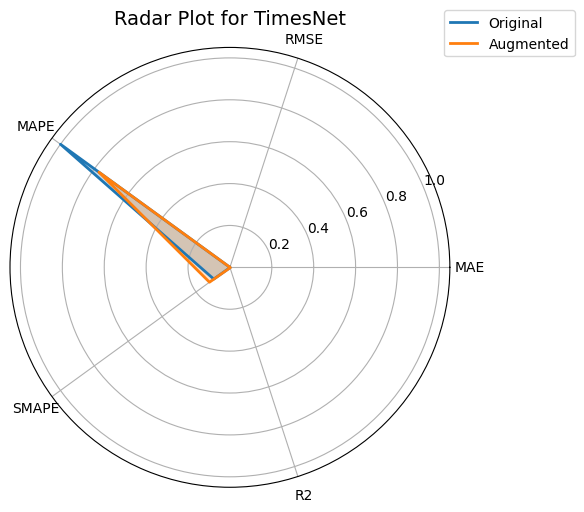

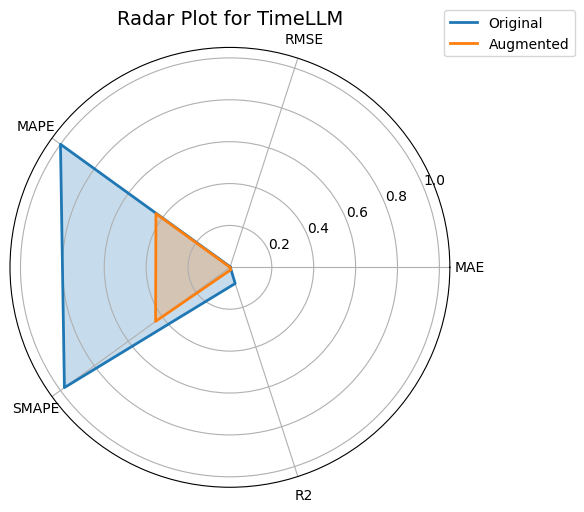

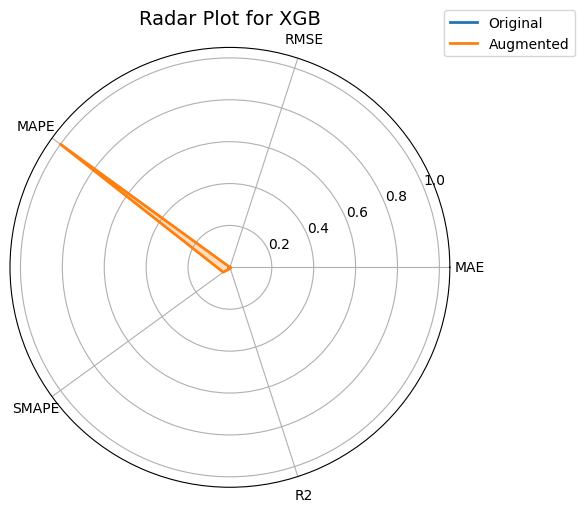

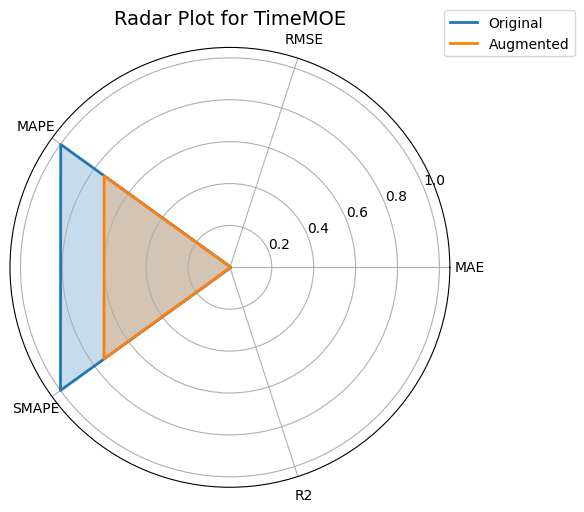

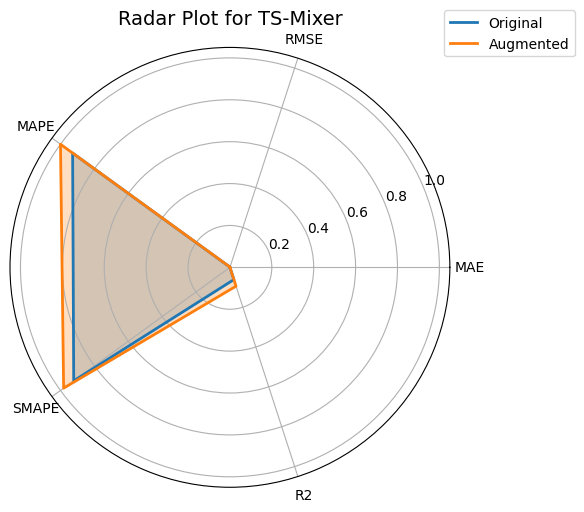

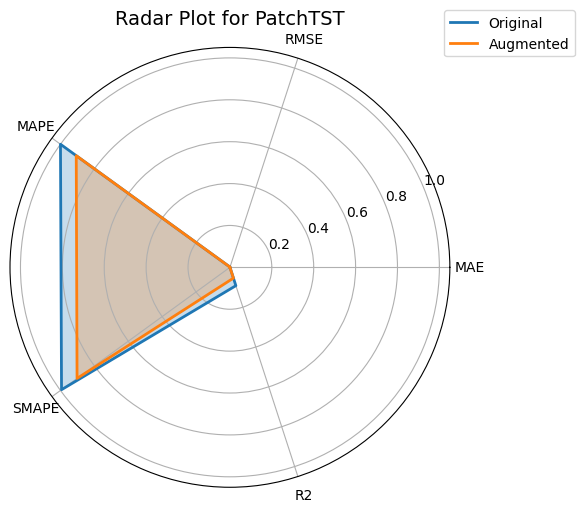

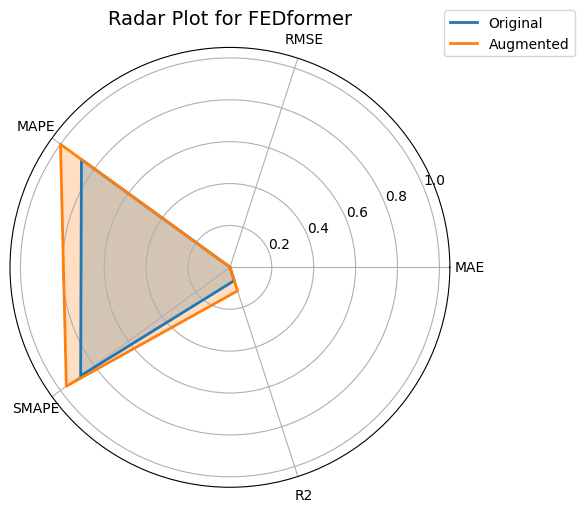

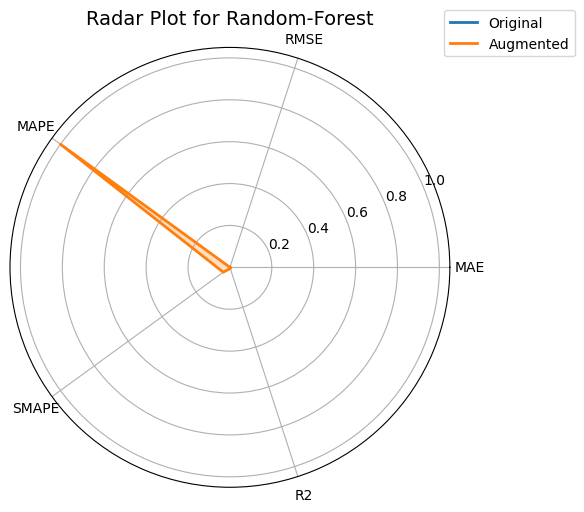

In [49]:
for model in monthly_df['Model'].unique():
    plot_radar_for_model(monthly_df, model)


In [50]:
def plot_boxplot_monthly(metric, monthly_df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    df = monthly_df.copy()
    
    data = pd.DataFrame({
        'Month': pd.to_datetime(df['month']),
        'Original': df[f'{metric}_org_mean'],
        'Augmented': df[f'{metric}_aug_mean'],
        'Model': df['Model']
    })

    melted = data.melt(id_vars=["Month", "Model"], value_vars=["Original", "Augmented"], 
                       var_name="Variant", value_name=metric.upper())

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=melted, x="Model", y=metric.upper(), hue="Variant")
    plt.title(f"{metric.upper()} Distribution by Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


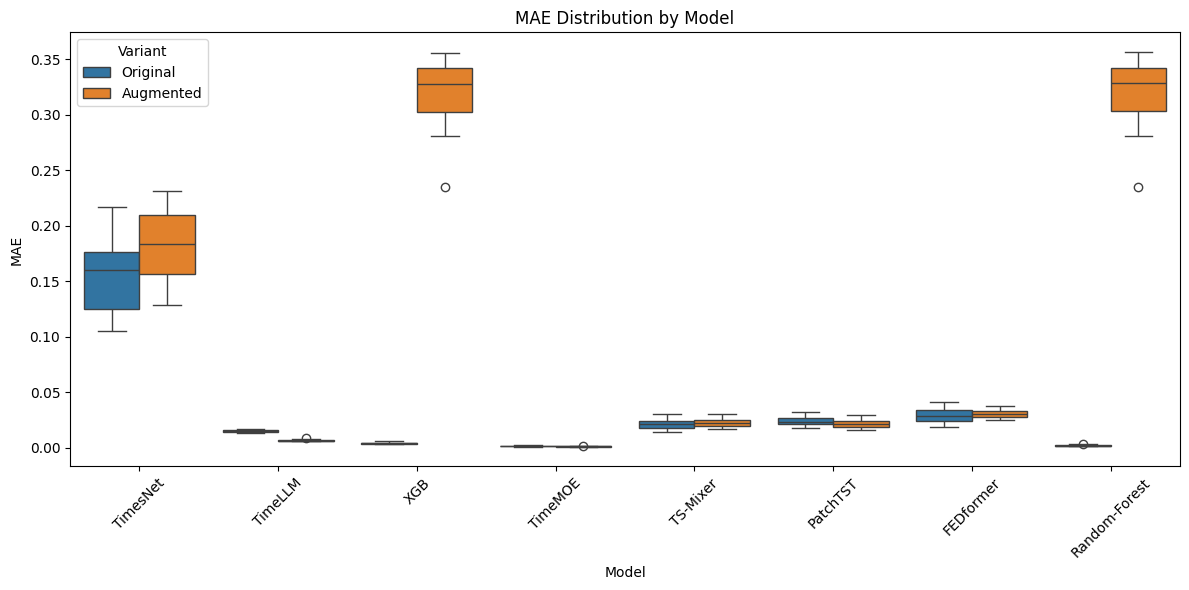

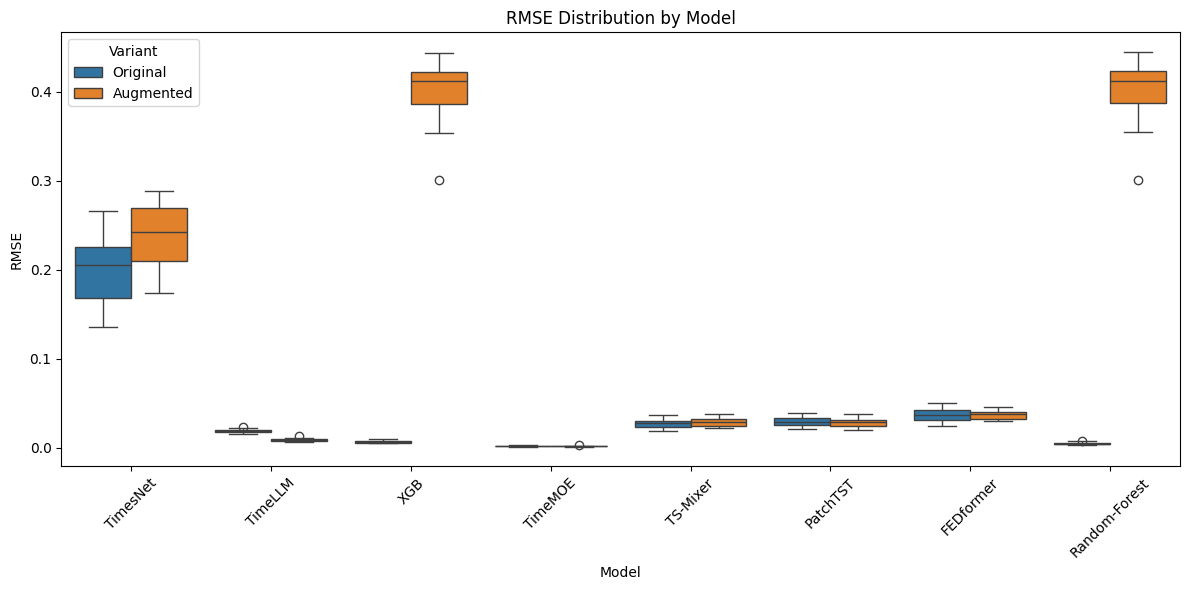

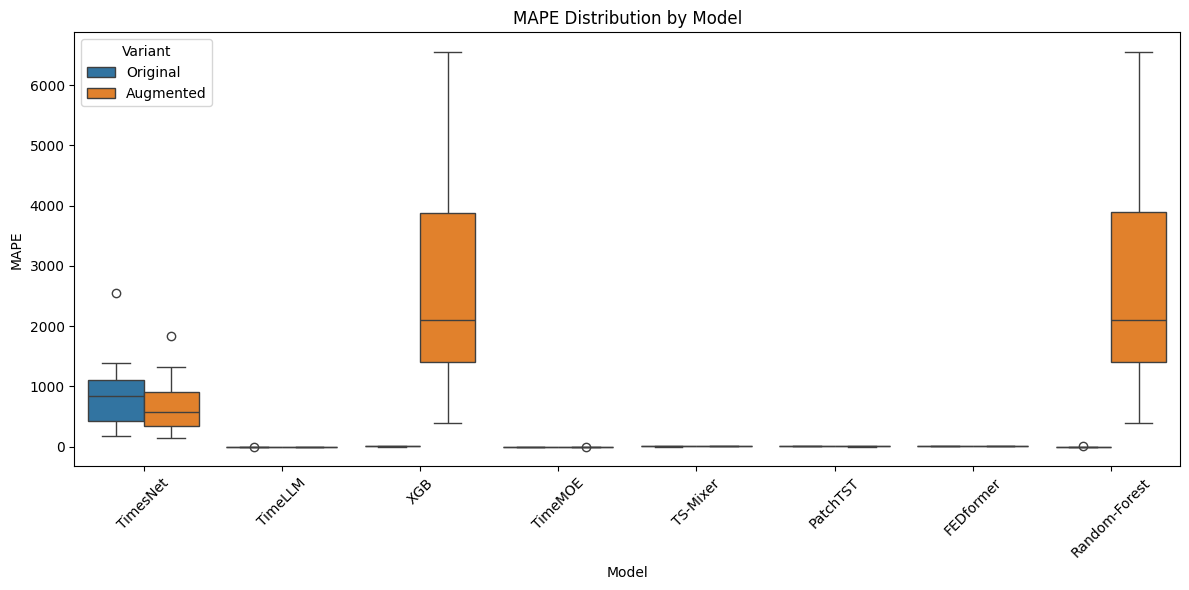

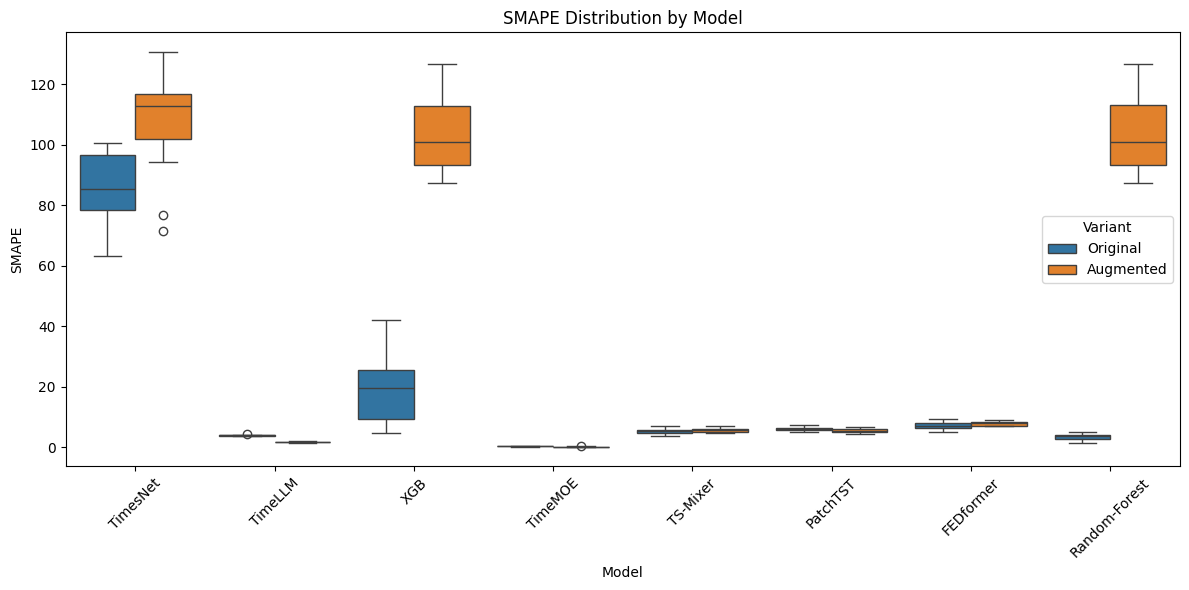

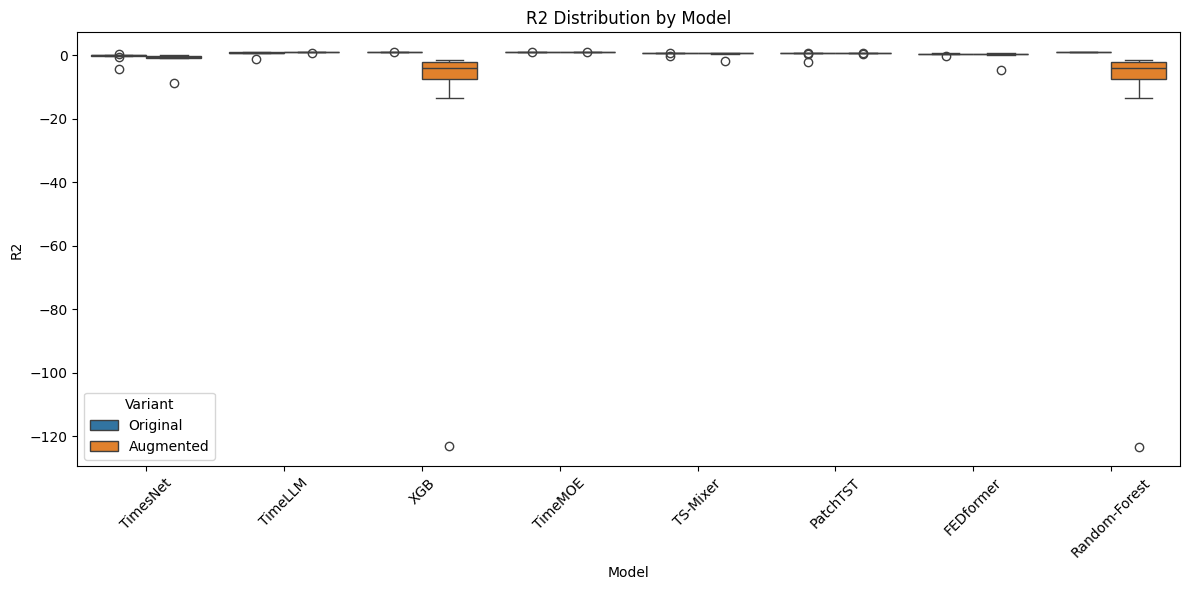

In [51]:
for metric in ['mae', 'rmse', 'mape', 'smape', 'r2']:
    plot_boxplot_monthly(metric, monthly_df)


In [52]:
import matplotlib.pyplot as plt
import numpy as np

def radar_plot_all_models(monthly_df):
    metrics = ['mae', 'rmse', 'mape', 'smape', 'r2']
    categories = [m.upper() if m != 'r2' else '1-R2' for m in metrics]
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    colors = plt.cm.tab10.colors
    model_names = monthly_df['Model'].unique()
    
    for idx, model in enumerate(model_names):
        df = monthly_df[monthly_df['Model'] == model]

        original = []
        augmented = []

        for m in metrics:
            org = df[f"{m}_org_mean"].mean()
            aug = df[f"{m}_aug_mean"].mean()
            if m == 'r2':
                org = 1 - org
                aug = 1 - aug
            original.append(org)
            augmented.append(aug)

        # Normalize across all collected values for fairness
        all_vals = np.array(original + augmented)
        min_val, max_val = all_vals.min(), all_vals.max()
        original = [(v - min_val) / (max_val - min_val) for v in original]
        augmented = [(v - min_val) / (max_val - min_val) for v in augmented]

        # Close the radar loop
        original += original[:1]
        augmented += augmented[:1]

        ax.plot(angles, original, label=f'{model} - Orig', linestyle='-', color=colors[idx % len(colors)])
        ax.fill(angles, original, alpha=0.1, color=colors[idx % len(colors)])

        ax.plot(angles, augmented, label=f'{model} - Aug', linestyle='--', color=colors[idx % len(colors)])
        ax.fill(angles, augmented, alpha=0.1, color=colors[idx % len(colors)])

    # Formatting
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title('Radar Plot: Original vs Augmented (All Models)', size=16, pad=20)
    ax.grid(True)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    plt.tight_layout()
    plt.show()


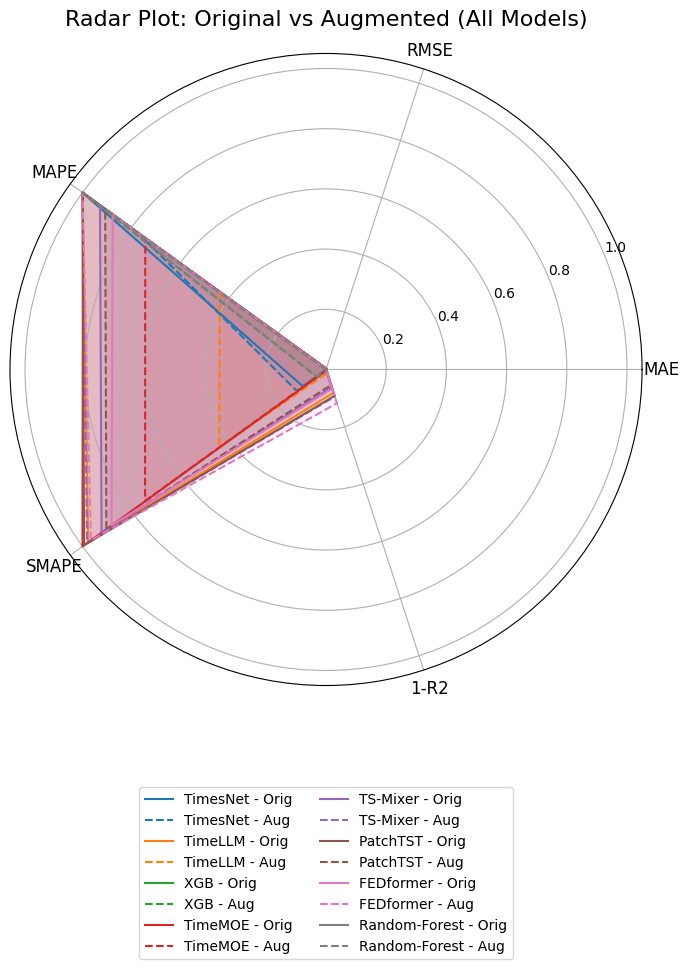

In [53]:
radar_plot_all_models(monthly_df)  


In [54]:
import matplotlib.pyplot as plt
import numpy as np

def lineplot_monthly_metric(monthly_df, metric="mae"):
    models = monthly_df['Model'].unique()
    months = sorted(monthly_df['month'].unique())

    plt.figure(figsize=(14, 7))

    for model in models:
        model_df = monthly_df[monthly_df['Model'] == model].sort_values('month')

        # Plot Original with error bars
        plt.errorbar(
            model_df['month'],
            model_df[f"{metric}_org_mean"],
            yerr=model_df[f"{metric}_org_std"],
            label=f'{model} - Orig',
            linestyle='-',
            marker='o',
            capsize=3
        )

        # Plot Augmented with error bars
        plt.errorbar(
            model_df['month'],
            model_df[f"{metric}_aug_mean"],
            yerr=model_df[f"{metric}_aug_std"],
            label=f'{model} - Aug',
            linestyle='--',
            marker='x',
            capsize=3
        )

    # Optional: Set y-ticks manually depending on metric
    y_min, y_max = plt.ylim()
    if metric in ["mae", "rmse", "mape", "smape"]:
        step = np.round((y_max - y_min) / 8, 2)
        yticks = np.arange(0, y_max + step, step)
        plt.yticks(yticks)
    elif metric == "r2":
        plt.yticks(np.linspace(-1, 1, 11))  # for R² metric which can be negative

    plt.title(f"Monthly {metric.upper()} Comparison: Original vs Augmented", fontsize=16)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel(metric.upper(), fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(ncol=2, fontsize=10)
    plt.tight_layout()
    plt.show()


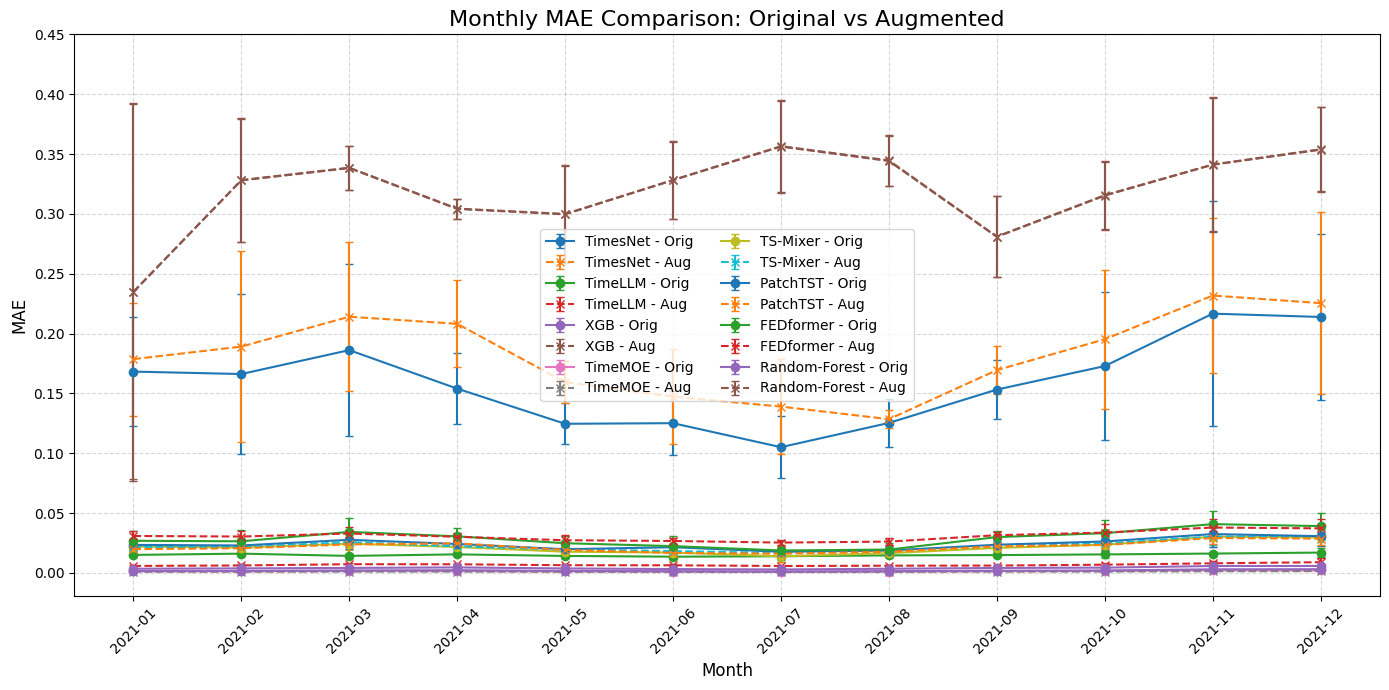

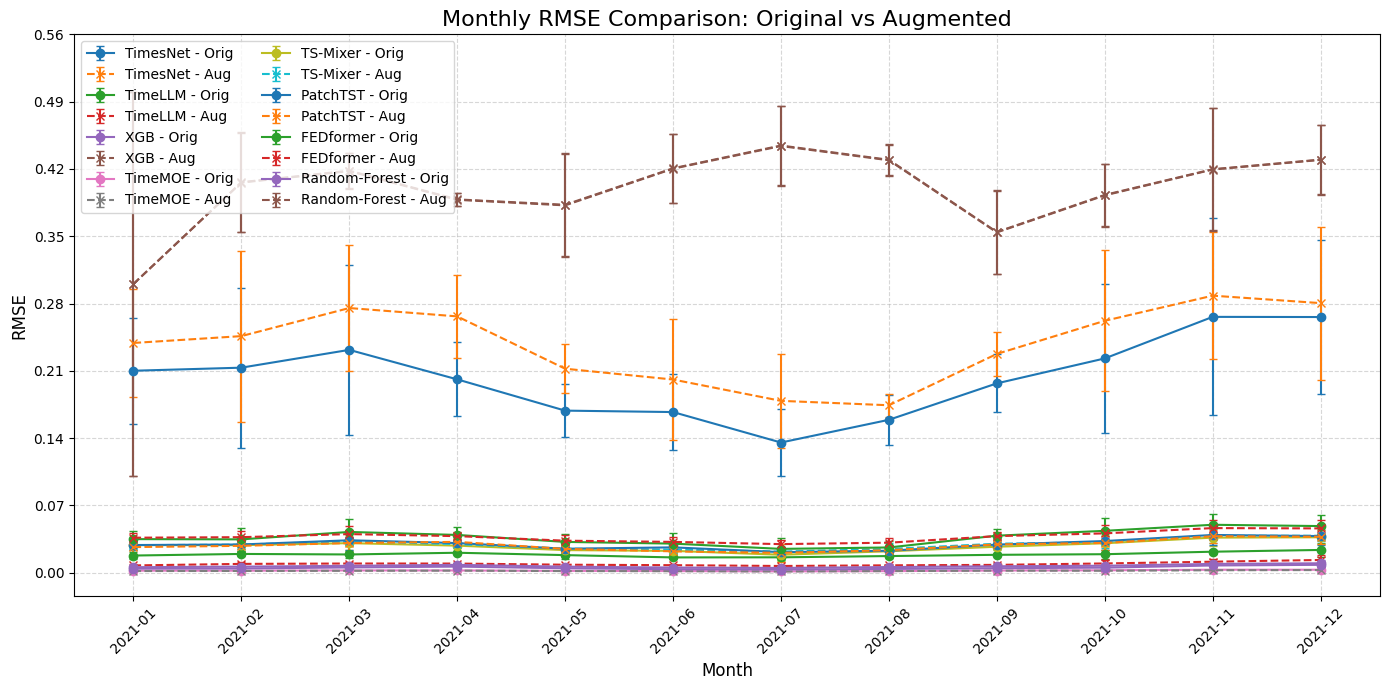

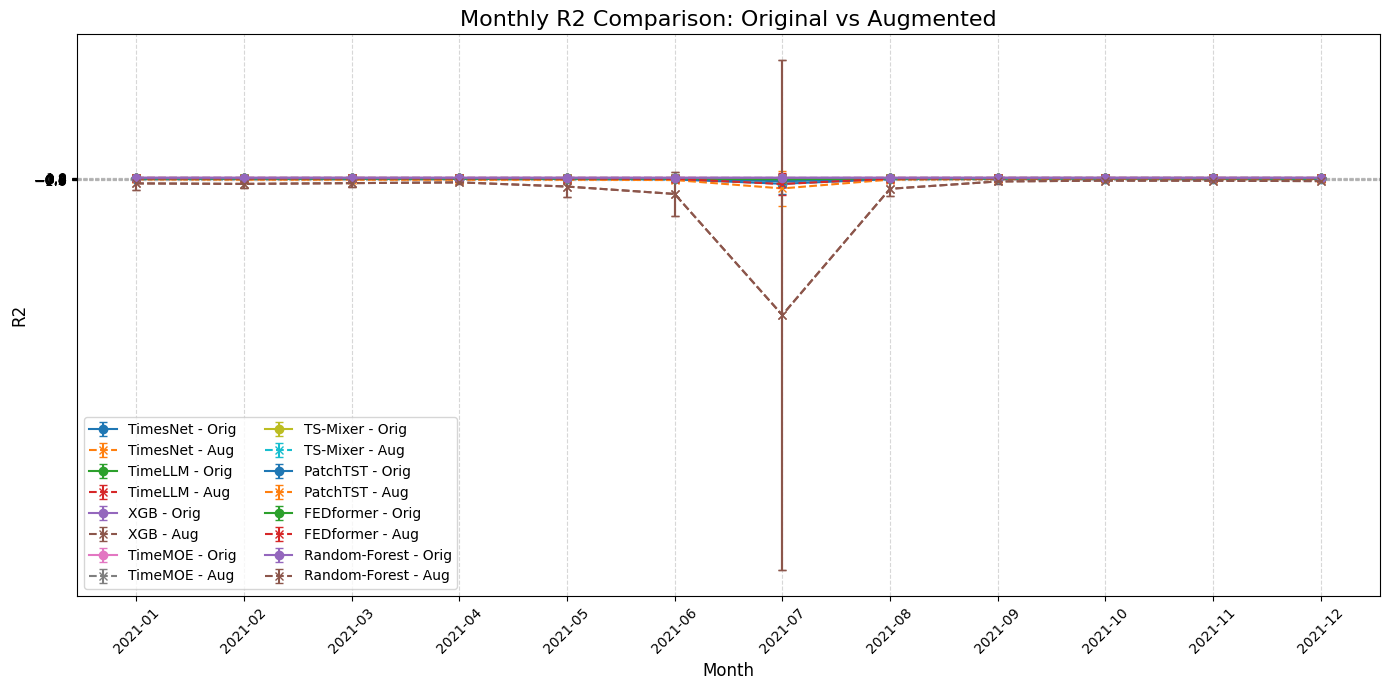

In [55]:
lineplot_monthly_metric(monthly_df, metric="mae")
lineplot_monthly_metric(monthly_df, metric="rmse")
lineplot_monthly_metric(monthly_df, metric="r2")


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def lineplot_monthly_metric_with_std(monthly_df, metric="mae", variant="org", log_base=10):
    """
    Plot monthly metric with std error bars and log scale.
    """
    metric_mean_col = f"{metric.lower()}_{variant}_mean"
    metric_std_col = f"{metric.lower()}_{variant}_std"

    if metric_mean_col not in monthly_df.columns:
        raise ValueError(f"Column '{metric_mean_col}' not found in dataframe.")

    # Ensure 'month' is treated as ordered categorical
    monthly_df['month'] = pd.Categorical(monthly_df['month'], categories=sorted(monthly_df['month'].unique()), ordered=True)

    plt.figure(figsize=(14, 7))

    for model in monthly_df['Model'].unique():
        model_data = monthly_df[monthly_df['Model'] == model]
        x = model_data['month']
        y = model_data[metric_mean_col]
        yerr = model_data[metric_std_col]

        plt.errorbar(x, y, yerr=yerr, label=model, marker='o', capsize=3)

    plt.yscale('log', base=log_base)
    plt.title(f'Monthly {metric.upper()} with Std (log scale) - {variant.upper()}')
    plt.xlabel("Month")
    plt.ylabel(metric.upper())
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


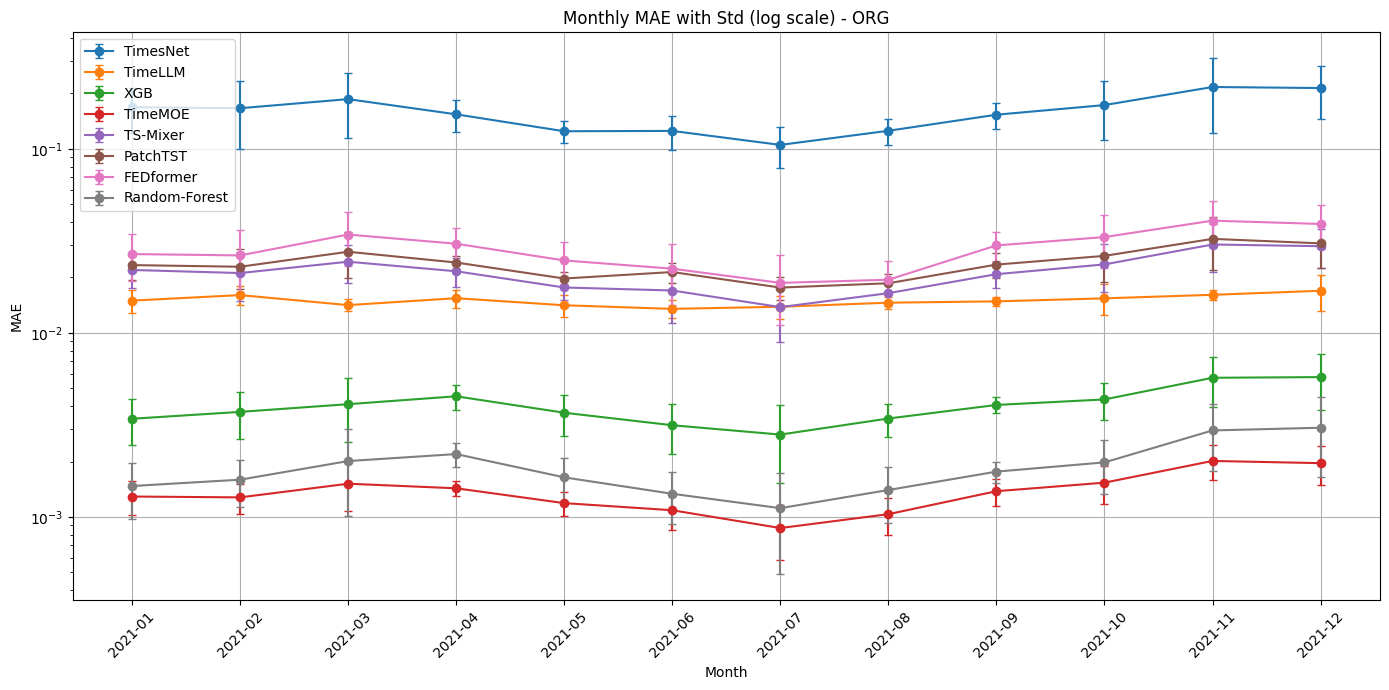

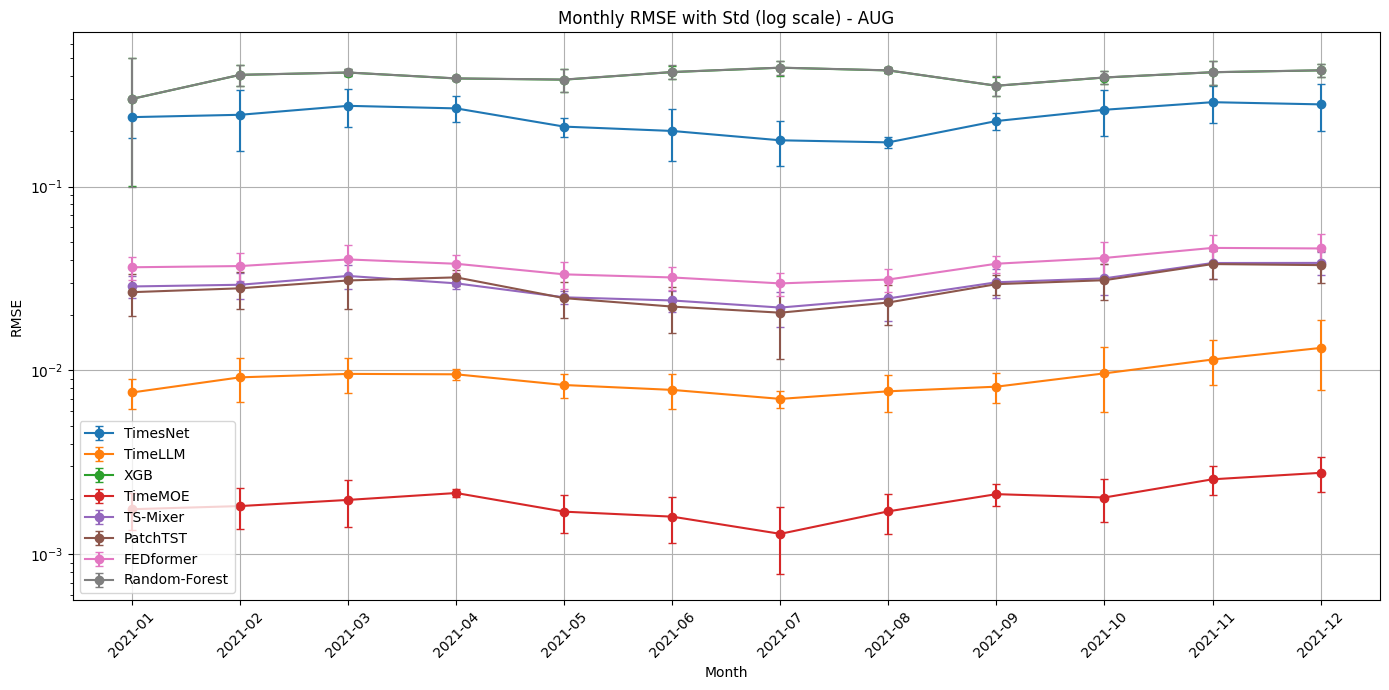

In [57]:
lineplot_monthly_metric_with_std(monthly_df, metric="mae", variant="org", log_base=10)
lineplot_monthly_metric_with_std(monthly_df, metric="rmse", variant="aug", log_base=10)
